## Importing Dataset

In [2]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_SGram.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 12)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [15]:
import gc
gc.collect()

0

In [16]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [17]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [18]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [19]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [20]:
# grid_search.fit(X,y)

In [21]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [22]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [23]:
times_svm

[15.707515001296997,
 13.873553276062012,
 15.405683040618896,
 15.331525087356567,
 15.307106494903564,
 15.367127656936646,
 12.512904405593872,
 7.790314435958862,
 15.325634241104126,
 10.870972394943237]

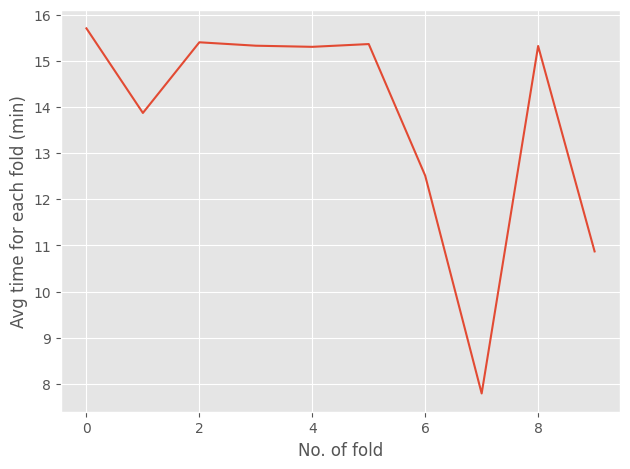

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [25]:
np.array(y_test_all).shape

(10, 302)

In [26]:
np.array(scores_svm).shape

(10, 302)

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [28]:
acc_scores_svm

[0.5231788079470199,
 0.5496688741721855,
 0.5331125827814569,
 0.5496688741721855,
 0.5629139072847682,
 0.543046357615894,
 0.5596026490066225,
 0.4966887417218543,
 0.5264900662251656,
 0.5198675496688742]

In [29]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

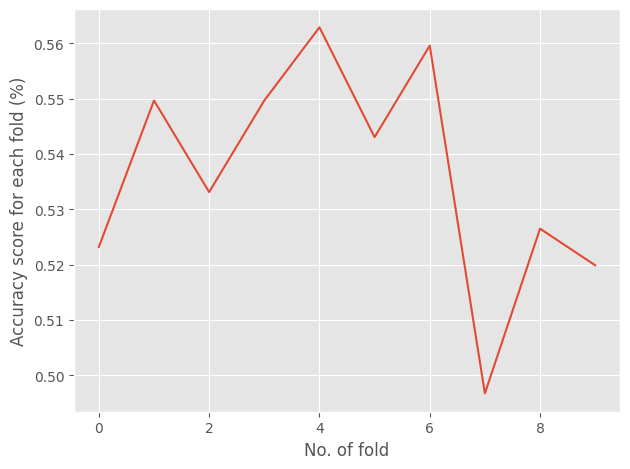

In [30]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [31]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.64%


In [33]:
import gc
gc.collect()

7048

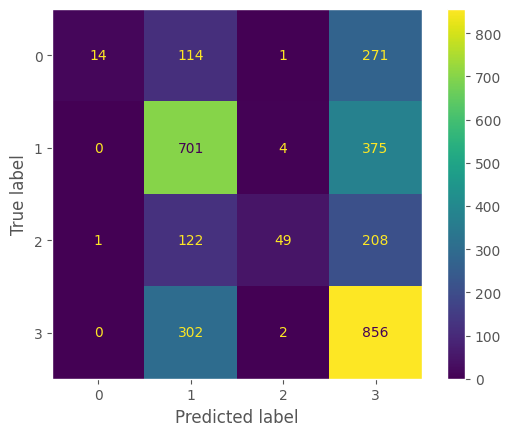

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [35]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.93      0.04      0.07       400
           1       0.57      0.65      0.60      1080
           2       0.88      0.13      0.22       380
           3       0.50      0.74      0.60      1160

    accuracy                           0.54      3020
   macro avg       0.72      0.39      0.37      3020
weighted avg       0.63      0.54      0.48      3020



## Decision Tree

In [36]:
import gc
gc.collect()

5

In [37]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [38]:
times_dtc

[8.934572696685791,
 5.349220037460327,
 8.168822765350342,
 9.057050228118896,
 10.432474613189697,
 8.161417484283447,
 6.743419885635376,
 5.921255588531494,
 8.01174545288086,
 8.433828353881836]

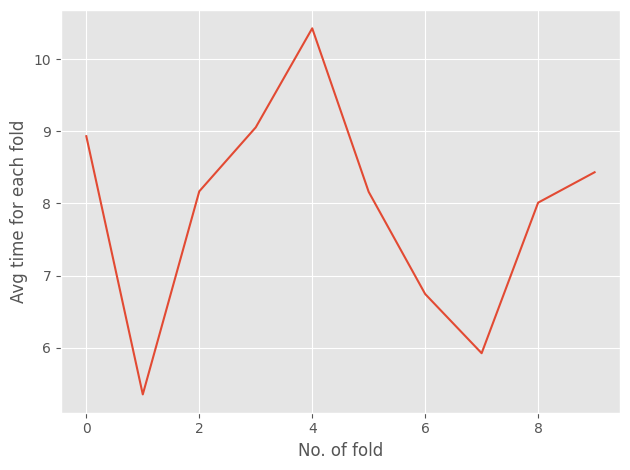

In [39]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [40]:
np.array(y_test_all).shape

(10, 302)

In [41]:
np.array(scores_dtc).shape

(10, 302)

In [42]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [43]:
acc_scores_dtc

[0.38079470198675497,
 0.3609271523178808,
 0.3344370860927152,
 0.3509933774834437,
 0.32781456953642385,
 0.3609271523178808,
 0.3576158940397351,
 0.33774834437086093,
 0.3576158940397351,
 0.3841059602649007]

In [44]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

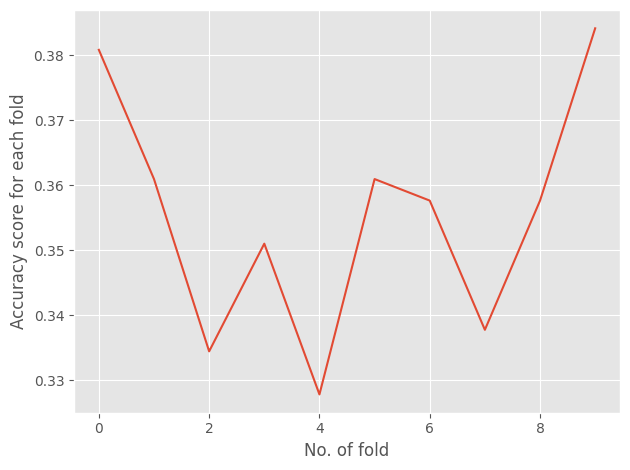

In [45]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [46]:
import gc
gc.collect()

3330

In [47]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.53%


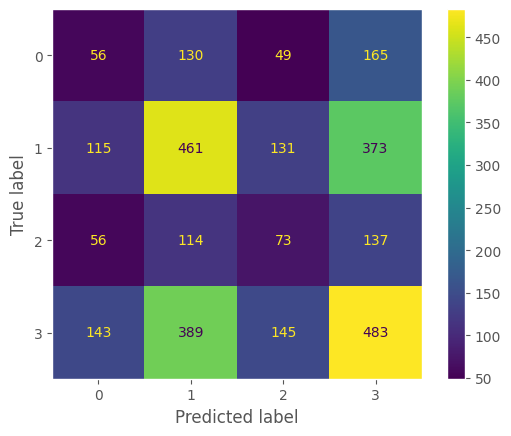

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [50]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.15      0.14      0.15       400
           1       0.42      0.43      0.42      1080
           2       0.18      0.19      0.19       380
           3       0.42      0.42      0.42      1160

    accuracy                           0.36      3020
   macro avg       0.29      0.29      0.29      3020
weighted avg       0.35      0.36      0.35      3020



In [51]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [52]:
# parameters

In [53]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [54]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [55]:
# grid_search_dtc.fit(X_train,y_train)

In [56]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [57]:
import gc
gc.collect()

6425

In [58]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [59]:
times_rdf

[16.489491939544678,
 16.669245958328247,
 16.958729028701782,
 16.894578218460083,
 14.829296350479126,
 10.540782690048218,
 15.96994161605835,
 12.976375579833984,
 16.418656826019287,
 16.739421606063843]

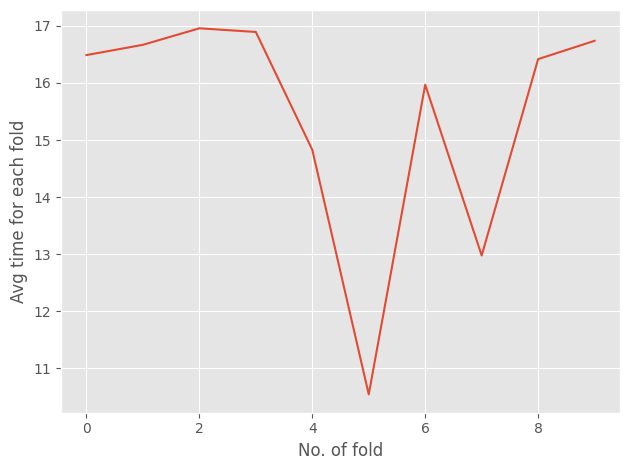

In [60]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [61]:
import gc
gc.collect()

3470

In [62]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [63]:
acc_scores_rdf

[0.5331125827814569,
 0.5099337748344371,
 0.4768211920529801,
 0.5132450331125827,
 0.5033112582781457,
 0.48013245033112584,
 0.4966887417218543,
 0.5066225165562914,
 0.5463576158940397,
 0.5033112582781457]

In [64]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

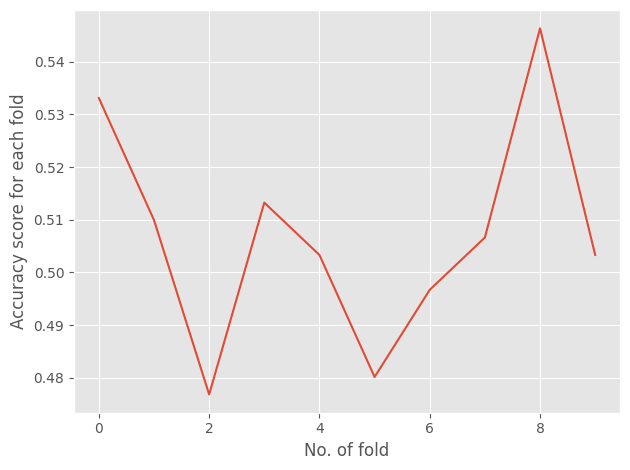

In [65]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [66]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.70%


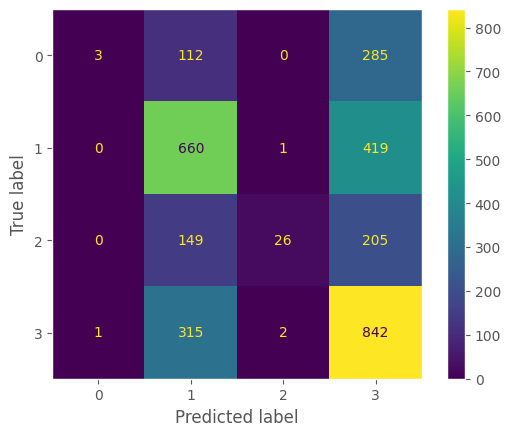

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [69]:
import gc
gc.collect()

6559

In [70]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.75      0.01      0.01       400
           1       0.53      0.61      0.57      1080
           2       0.90      0.07      0.13       380
           3       0.48      0.73      0.58      1160

    accuracy                           0.51      3020
   macro avg       0.67      0.35      0.32      3020
weighted avg       0.59      0.51      0.44      3020



In [71]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [72]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [73]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [74]:
# grid_search.fit(X_train,y_train)

In [75]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [76]:
import gc
gc.collect()

0

In [77]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [78]:
times_knn

[0.01012730598449707,
 0.0013670921325683594,
 0.018887996673583984,
 0.0,
 0.0,
 0.0,
 0.0,
 0.009001016616821289,
 0.0,
 0.0157010555267334]

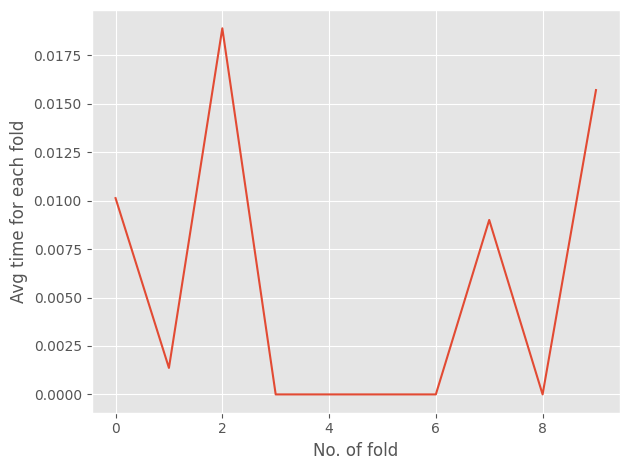

In [79]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [80]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [81]:
acc_scores_knn

[0.5662251655629139,
 0.5463576158940397,
 0.5662251655629139,
 0.6158940397350994,
 0.5496688741721855,
 0.5364238410596026,
 0.5894039735099338,
 0.5397350993377483,
 0.5496688741721855,
 0.5596026490066225]

In [82]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

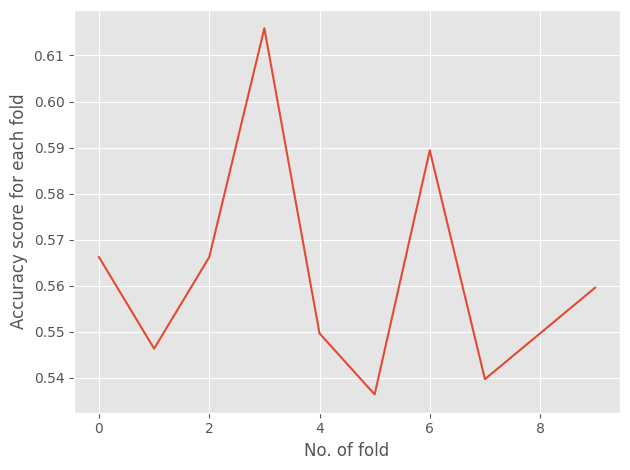

In [83]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [84]:
import gc
gc.collect()

3553

In [85]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [86]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.19%


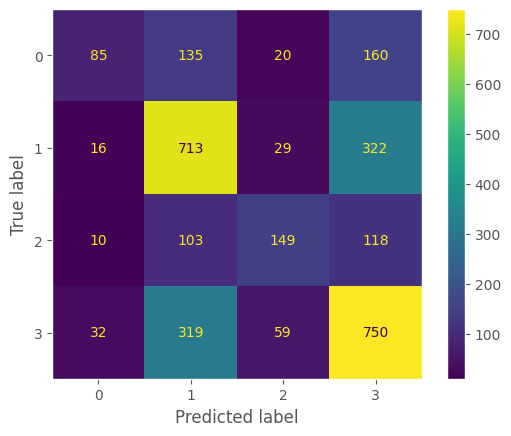

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [88]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.59      0.21      0.31       400
           1       0.56      0.66      0.61      1080
           2       0.58      0.39      0.47       380
           3       0.56      0.65      0.60      1160

    accuracy                           0.56      3020
   macro avg       0.57      0.48      0.50      3020
weighted avg       0.57      0.56      0.55      3020



In [89]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [90]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [91]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [92]:
# grid_search_knn.fit(X_train,y_train)

In [93]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [94]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [95]:
import gc
gc.collect()

6430

In [96]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [97]:
times_nb

[0.06349039077758789,
 0.08515214920043945,
 0.09671163558959961,
 0.07272624969482422,
 0.08500099182128906,
 0.09375810623168945,
 0.0723426342010498,
 0.07805514335632324,
 0.07126426696777344,
 0.05896472930908203]

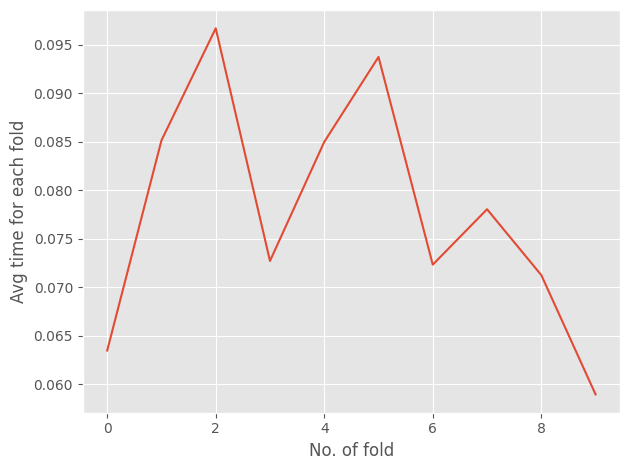

In [98]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [99]:
import gc
gc.collect()

3584

In [100]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [101]:
acc_scores_nb

[0.33774834437086093,
 0.33112582781456956,
 0.3708609271523179,
 0.347682119205298,
 0.32781456953642385,
 0.34105960264900664,
 0.3344370860927152,
 0.3543046357615894,
 0.3079470198675497,
 0.32450331125827814]

In [102]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

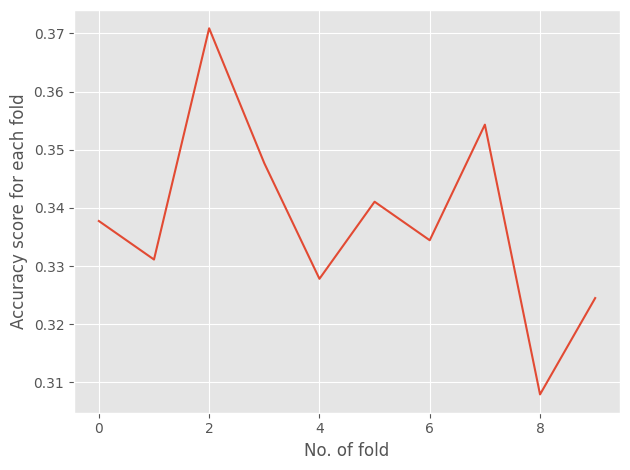

In [103]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [104]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 33.77%


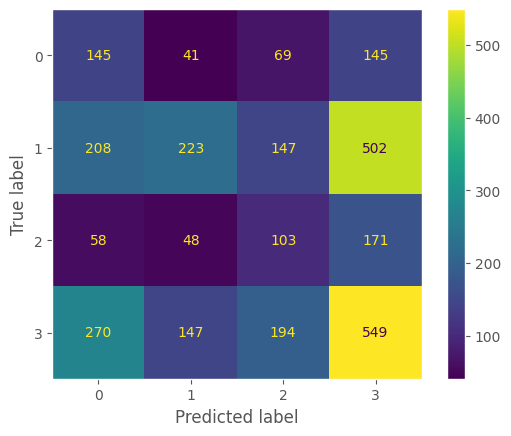

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [107]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.21      0.36      0.27       400
           1       0.49      0.21      0.29      1080
           2       0.20      0.27      0.23       380
           3       0.40      0.47      0.43      1160

    accuracy                           0.34      3020
   macro avg       0.33      0.33      0.31      3020
weighted avg       0.38      0.34      0.34      3020



In [91]:
import gc
gc.collect()

6245

In [92]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [93]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [94]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [95]:
# grid_search_nb.fit(X_train,y_train)

In [96]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [97]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [98]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [150]:
import gc
gc.collect()

4799

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [152]:
X,y = load_data(DATA_PATH)

Data succesfully loaded!


In [153]:
X.shape

(3020, 259, 12)

In [154]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [155]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [157]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [158]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [159]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 4s 11ms/step - loss: 0.8443 - accuracy: 0.2457 - val_loss: 0.8539 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8406 - accuracy: 0.2232 - val_loss: 0.8455 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8360 - accuracy: 0.2473 - val_loss: 0.8384 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8325 - accuracy: 0.2449 - val_loss: 0.8362 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8295 - accuracy: 0.2314 - val_loss: 0.8334 - val_accuracy: 0.2426 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8272 - accuracy: 0.2555 - val_loss: 0.8324 - val_accuracy: 0.2978 - lr: 0.0010
Epoch 7/100
77/77 [==============================]

77/77 [==============================] - 1s 8ms/step - loss: 0.8070 - accuracy: 0.3577 - val_loss: 0.8136 - val_accuracy: 0.3272 - lr: 4.0000e-05
Epoch 31/100
75/77 [============================>.] - ETA: 0s - loss: 0.8071 - accuracy: 0.3542
Epoch 31: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 31: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8070 - accuracy: 0.3532 - val_loss: 0.8128 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8069 - accuracy: 0.3561 - val_loss: 0.8137 - val_accuracy: 0.3235 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8069 - accuracy: 0.3528 - val_loss: 0.8136 - val_accuracy: 0.3235 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8070 - accuracy: 0.3618 - val_loss: 0.8135 - val_accuracy: 0.3235 - lr: 8.0000e-06
Epoch 35/100
77/77 [

77/77 [==============================] - 1s 8ms/step - loss: 0.8069 - accuracy: 0.3622 - val_loss: 0.8136 - val_accuracy: 0.3199 - lr: 1.0240e-10
Epoch 87/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8065 - accuracy: 0.3615
Epoch 87: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 87: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8065 - accuracy: 0.3594 - val_loss: 0.8137 - val_accuracy: 0.3199 - lr: 1.0240e-10
Epoch 88/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8067 - accuracy: 0.3557 - val_loss: 0.8139 - val_accuracy: 0.3199 - lr: 2.0480e-11
Epoch 89/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8071 - accuracy: 0.3500 - val_loss: 0.8139 - val_accuracy: 0.3199 - lr: 2.0480e-11
Epoch 90/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8065 - accuracy: 0.3540 - val_loss: 0.8139 - val_accuracy: 0.3199 - lr: 2.0480e-11
Epoch 91/100
77/77 

Epoch 15/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8169 - accuracy: 0.1844 - val_loss: 0.8164 - val_accuracy: 0.1728 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8167 - accuracy: 0.1827 - val_loss: 0.8178 - val_accuracy: 0.1618 - lr: 2.0000e-04
Epoch 17/100
72/77 [===========================>..] - ETA: 0s - loss: 0.8170 - accuracy: 0.1623
Epoch 17: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 17: 0.61 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8164 - accuracy: 0.1627 - val_loss: 0.8162 - val_accuracy: 0.1581 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8166 - accuracy: 0.1676 - val_loss: 0.8166 - val_accuracy: 0.1581 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8155 - accuracy: 0.1742 - val_loss: 0.8161 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 

77/77 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.1660 - val_loss: 0.8163 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8162 - accuracy: 0.1574 - val_loss: 0.8166 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 73/100
75/77 [============================>.] - ETA: 0s - loss: 0.8151 - accuracy: 0.1646
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 73: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.1652 - val_loss: 0.8166 - val_accuracy: 0.1507 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.1627 - val_loss: 0.8164 - val_accuracy: 0.1507 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8160 - accuracy: 0.1623 - val_loss: 0.8166 - val_accuracy: 0.1507 - lr: 1.0240e-10
Epoch 76/100
77/77 

Epoch 28/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8141 - accuracy: 0.1455 - val_loss: 0.8042 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8135 - accuracy: 0.1415 - val_loss: 0.8043 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8138 - accuracy: 0.1406 - val_loss: 0.8035 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 31/100
70/77 [==========================>...] - ETA: 0s - loss: 0.8138 - accuracy: 0.1388
Epoch 31: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 31: 0.58 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8138 - accuracy: 0.1374 - val_loss: 0.8019 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8142 - accuracy: 0.1341 - val_loss: 0.8029 - val_accuracy: 0.1434 - lr: 1.6000e-06
Epoch 

77/77 [==============================] - 1s 8ms/step - loss: 0.8145 - accuracy: 0.1321 - val_loss: 0.8026 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8139 - accuracy: 0.1394 - val_loss: 0.8030 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8143 - accuracy: 0.1349 - val_loss: 0.8036 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 87/100
76/77 [============================>.] - ETA: 0s - loss: 0.8142 - accuracy: 0.1414
Epoch 87: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 87: 0.65 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8141 - accuracy: 0.1410 - val_loss: 0.8022 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 88/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8144 - accuracy: 0.1419 - val_loss: 0.8031 - val_accuracy: 0.1360 - lr: 4.0960e-12
Epoch 89/100
77/77 [

Epoch 13/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8088 - accuracy: 0.3508 - val_loss: 0.8139 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8073 - accuracy: 0.3549 - val_loss: 0.8130 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8054 - accuracy: 0.3573 - val_loss: 0.8119 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8023 - accuracy: 0.2980 - val_loss: 0.8099 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8036 - accuracy: 0.3512 - val_loss: 0.8091 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 18/100
72/77 [===========================>..] - ETA: 0s - loss: 0.8019 - accuracy: 0.3585
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 18: 0.60 seconds
77/77 [======

77/77 [==============================] - 1s 8ms/step - loss: 0.8005 - accuracy: 0.3569 - val_loss: 0.8074 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8007 - accuracy: 0.3467 - val_loss: 0.8073 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 71/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8004 - accuracy: 0.3451 - val_loss: 0.8074 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 72/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8004 - accuracy: 0.3590 - val_loss: 0.8074 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 73/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8004 - accuracy: 0.3512 - val_loss: 0.8075 - val_accuracy: 0.3199 - lr: 2.5600e-09
Epoch 74/100
74/77 [===========================>..] - ETA: 0s - loss: 0.7999 - accuracy: 0.3463
Epoch 74: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 74: 0.59 seconds
77/77 [==

Epoch 26/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8128 - accuracy: 0.2592 - val_loss: 0.8043 - val_accuracy: 0.2463 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8131 - accuracy: 0.2621 - val_loss: 0.8051 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8130 - accuracy: 0.2584 - val_loss: 0.8023 - val_accuracy: 0.2353 - lr: 4.0000e-05
Epoch 29/100
72/77 [===========================>..] - ETA: 0s - loss: 0.8110 - accuracy: 0.2669
Epoch 29: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 29: 0.61 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8122 - accuracy: 0.2674 - val_loss: 0.8038 - val_accuracy: 0.2390 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8129 - accuracy: 0.2690 - val_loss: 0.8032 - val_accuracy: 0.2390 - lr: 8.0000e-06
Epoch 3

77/77 [==============================] - 1s 8ms/step - loss: 0.8125 - accuracy: 0.2645 - val_loss: 0.8039 - val_accuracy: 0.2390 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8126 - accuracy: 0.2596 - val_loss: 0.8039 - val_accuracy: 0.2390 - lr: 1.0240e-10
Epoch 84/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8130 - accuracy: 0.2711 - val_loss: 0.8036 - val_accuracy: 0.2390 - lr: 1.0240e-10
Epoch 85/100
73/77 [===========================>..] - ETA: 0s - loss: 0.8125 - accuracy: 0.2650
Epoch 85: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 85: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8128 - accuracy: 0.2645 - val_loss: 0.8038 - val_accuracy: 0.2390 - lr: 1.0240e-10
Epoch 86/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8130 - accuracy: 0.2617 - val_loss: 0.8033 - val_accuracy: 0.2390 - lr: 2.0480e-11
Epoch 87/100
77/77 

Epoch 39/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8086 - accuracy: 0.3471 - val_loss: 0.8143 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 40/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8092 - accuracy: 0.3526
Epoch 40: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 40: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8094 - accuracy: 0.3532 - val_loss: 0.8140 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 41/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8091 - accuracy: 0.3520 - val_loss: 0.8143 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8090 - accuracy: 0.3446 - val_loss: 0.8142 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 43/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8089 - accuracy: 0.3459 - val_loss: 0.8141 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 

77/77 [==============================] - 1s 8ms/step - loss: 0.8086 - accuracy: 0.3536 - val_loss: 0.8127 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 96/100
72/77 [===========================>..] - ETA: 0s - loss: 0.8090 - accuracy: 0.3503
Epoch 96: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 96: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8089 - accuracy: 0.3479 - val_loss: 0.8133 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 97/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8085 - accuracy: 0.3430 - val_loss: 0.8142 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 98/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8093 - accuracy: 0.3430 - val_loss: 0.8140 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 99/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8087 - accuracy: 0.3479 - val_loss: 0.8134 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 100/100
10/10 

Epoch 24/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7987 - accuracy: 0.2212 - val_loss: 0.8033 - val_accuracy: 0.1581 - lr: 2.0000e-04
Epoch 25/100
75/77 [============================>.] - ETA: 0s - loss: 0.7985 - accuracy: 0.2158
Epoch 25: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 25: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.7983 - accuracy: 0.2167 - val_loss: 0.8035 - val_accuracy: 0.1507 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7996 - accuracy: 0.2089 - val_loss: 0.8030 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7991 - accuracy: 0.2179 - val_loss: 0.8044 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7988 - accuracy: 0.2142 - val_loss: 0.8041 - val_accuracy: 0.1507 - lr: 4.0000e-05
Epoch 

77/77 [==============================] - 1s 8ms/step - loss: 0.7985 - accuracy: 0.2118 - val_loss: 0.8022 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 81/100
76/77 [============================>.] - ETA: 0s - loss: 0.7984 - accuracy: 0.2097
Epoch 81: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 81: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.7984 - accuracy: 0.2101 - val_loss: 0.8023 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 82/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7984 - accuracy: 0.2114 - val_loss: 0.8020 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7982 - accuracy: 0.2097 - val_loss: 0.8017 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 84/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7985 - accuracy: 0.2024 - val_loss: 0.8018 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 85/100
77/77 

Epoch 9/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8225 - accuracy: 0.2073 - val_loss: 0.8240 - val_accuracy: 0.2132 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8212 - accuracy: 0.2244 - val_loss: 0.8213 - val_accuracy: 0.2096 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8185 - accuracy: 0.2138 - val_loss: 0.8202 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8165 - accuracy: 0.2253 - val_loss: 0.8176 - val_accuracy: 0.3382 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8139 - accuracy: 0.2821 - val_loss: 0.8150 - val_accuracy: 0.2978 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8131 - accuracy: 0.2469 - val_loss: 0.8155 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 8ms/step - los

Epoch 38/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8058 - accuracy: 0.2273 - val_loss: 0.8070 - val_accuracy: 0.1838 - lr: 8.0000e-06
Epoch 39/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8059 - accuracy: 0.2269 - val_loss: 0.8075 - val_accuracy: 0.1801 - lr: 8.0000e-06
Epoch 40/100
71/77 [==========================>...] - ETA: 0s - loss: 0.8056 - accuracy: 0.2324
Epoch 40: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 40: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8053 - accuracy: 0.2326 - val_loss: 0.8075 - val_accuracy: 0.1801 - lr: 8.0000e-06
Epoch 41/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8058 - accuracy: 0.2195 - val_loss: 0.8068 - val_accuracy: 0.1838 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8055 - accuracy: 0.2273 - val_loss: 0.8067 - val_accuracy: 0.1838 - lr: 1.6000e-06
Epoch 

77/77 [==============================] - 1s 8ms/step - loss: 0.8059 - accuracy: 0.2359 - val_loss: 0.8076 - val_accuracy: 0.1801 - lr: 2.0480e-11
Epoch 95/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8057 - accuracy: 0.2257 - val_loss: 0.8077 - val_accuracy: 0.1801 - lr: 2.0480e-11
Epoch 96/100
73/77 [===========================>..] - ETA: 0s - loss: 0.8057 - accuracy: 0.2299
Epoch 96: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 96: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8057 - accuracy: 0.2269 - val_loss: 0.8067 - val_accuracy: 0.1838 - lr: 2.0480e-11
Epoch 97/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8060 - accuracy: 0.2163 - val_loss: 0.8077 - val_accuracy: 0.1801 - lr: 4.0960e-12
Epoch 98/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8062 - accuracy: 0.2261 - val_loss: 0.8073 - val_accuracy: 0.1801 - lr: 4.0960e-12
Epoch 99/100
77/77 [

Epoch 23/100
71/77 [==========================>...] - ETA: 0s - loss: 0.8192 - accuracy: 0.2610
Epoch 23: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 23: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8196 - accuracy: 0.2637 - val_loss: 0.8197 - val_accuracy: 0.2610 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8190 - accuracy: 0.2572 - val_loss: 0.8200 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8190 - accuracy: 0.2621 - val_loss: 0.8194 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8192 - accuracy: 0.2580 - val_loss: 0.8194 - val_accuracy: 0.2610 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8182 - accuracy: 0.2653 - val_loss: 0.8195 - val_accuracy: 0.2647 - lr: 8.0000e-06
Epoch 2

73/77 [===========================>..] - ETA: 0s - loss: 0.8183 - accuracy: 0.2547
Epoch 79: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 79: 0.60 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8184 - accuracy: 0.2559 - val_loss: 0.8201 - val_accuracy: 0.2610 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8184 - accuracy: 0.2572 - val_loss: 0.8194 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8188 - accuracy: 0.2617 - val_loss: 0.8194 - val_accuracy: 0.2647 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8191 - accuracy: 0.2776 - val_loss: 0.8198 - val_accuracy: 0.2647 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8190 - accuracy: 0.2572 - val_loss: 0.8194 - val_accuracy: 0.2610 - lr: 2.0480e-11
Epoch 84/100
77/77 

Epoch 36/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8148 - accuracy: 0.2056 - val_loss: 0.8147 - val_accuracy: 0.2390 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8138 - accuracy: 0.1950 - val_loss: 0.8149 - val_accuracy: 0.2390 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8146 - accuracy: 0.2024 - val_loss: 0.8149 - val_accuracy: 0.2390 - lr: 1.6000e-06
Epoch 39/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8144 - accuracy: 0.1991 - val_loss: 0.8150 - val_accuracy: 0.2390 - lr: 1.6000e-06
Epoch 40/100
74/77 [===========================>..] - ETA: 0s - loss: 0.8143 - accuracy: 0.2044
Epoch 40: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 40: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8143 - accuracy: 0.2040 - val_loss: 0.8150 - val_accuracy: 0.2390 - lr: 1.6000e-06
Epoch 4

77/77 [==============================] - 1s 8ms/step - loss: 0.8144 - accuracy: 0.1971 - val_loss: 0.8141 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8150 - accuracy: 0.2040 - val_loss: 0.8139 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8146 - accuracy: 0.1958 - val_loss: 0.8142 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 95/100
77/77 [==============================] - 1s 8ms/step - loss: 0.8142 - accuracy: 0.1975 - val_loss: 0.8144 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 96/100
72/77 [===========================>..] - ETA: 0s - loss: 0.8142 - accuracy: 0.2018
Epoch 96: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 96: 0.59 seconds
77/77 [==============================] - 1s 8ms/step - loss: 0.8146 - accuracy: 0.2016 - val_loss: 0.8138 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 97/100
77/77 [

In [160]:
import gc
gc.collect()

0

In [161]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

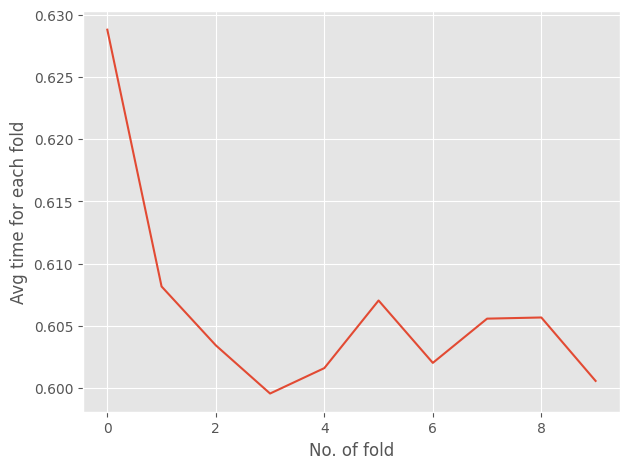

In [162]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [163]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [164]:
train_acc_cnn_svm_n.shape

(100,)

In [165]:
train_acc_cnn_svm_n.shape

(100,)

In [166]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

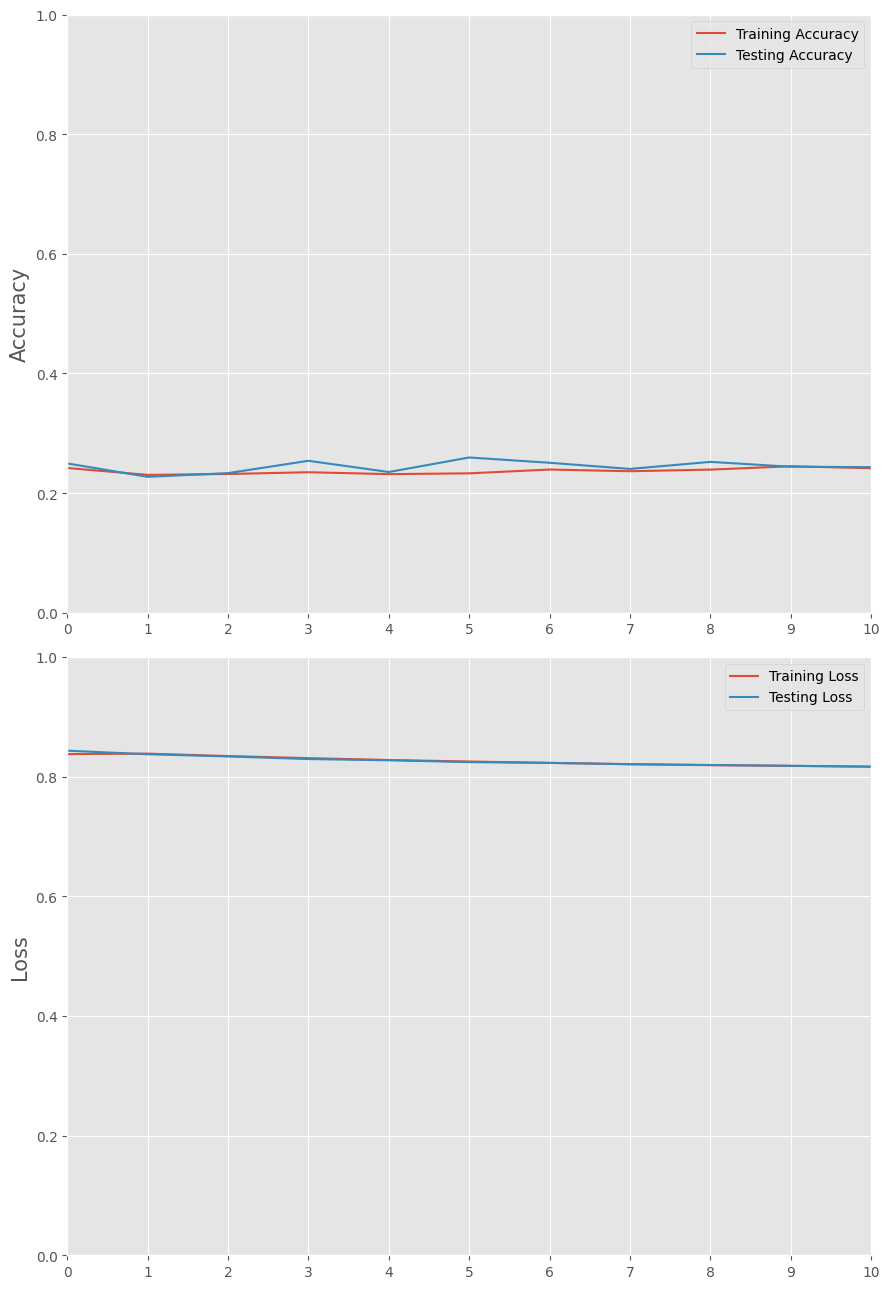

In [167]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [168]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [169]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [170]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [171]:
y_pred_cnn_svm.shape

(10, 302)

In [172]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [173]:
import gc
gc.collect()

30

In [174]:
acc_scores_cnn_svm

[0.34105960264900664,
 0.1490066225165563,
 0.1423841059602649,
 0.38741721854304634,
 0.25165562913907286,
 0.3675496688741722,
 0.1490066225165563,
 0.2251655629139073,
 0.2682119205298013,
 0.18211920529801323]

In [175]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [176]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

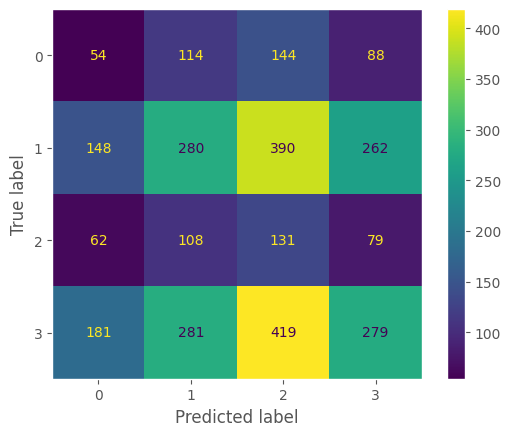

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [178]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.14      0.13       400
           1       0.36      0.26      0.30      1080
           2       0.12      0.34      0.18       380
           3       0.39      0.24      0.30      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.24      0.23      3020
weighted avg       0.31      0.25      0.26      3020



## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [108]:
import gc
gc.collect()

6343

In [109]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [110]:
times_xg

[33.9904887676239,
 39.49121975898743,
 39.27886629104614,
 39.808347940444946,
 39.08988332748413,
 39.821325063705444,
 39.32522511482239,
 39.5876259803772,
 39.53129863739014,
 39.847065448760986]

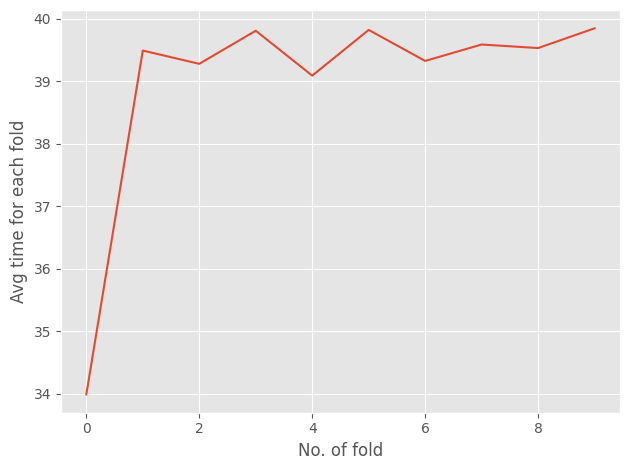

In [111]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [112]:
import gc
gc.collect()

3475

In [113]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [114]:
acc_scores_xg

[0.5033112582781457,
 0.5066225165562914,
 0.5562913907284768,
 0.5033112582781457,
 0.543046357615894,
 0.5231788079470199,
 0.5629139072847682,
 0.5397350993377483,
 0.5529801324503312,
 0.5728476821192053]

In [115]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

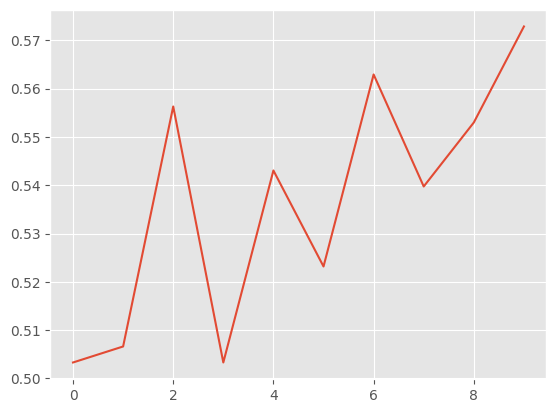

In [116]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [117]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [118]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.64%


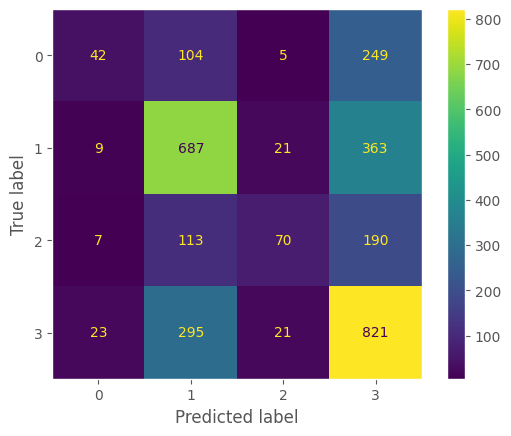

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [120]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.52      0.10      0.17       400
           1       0.57      0.64      0.60      1080
           2       0.60      0.18      0.28       380
           3       0.51      0.71      0.59      1160

    accuracy                           0.54      3020
   macro avg       0.55      0.41      0.41      3020
weighted avg       0.54      0.54      0.50      3020



# Catboost

In [121]:
import gc
gc.collect()

6172

In [122]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2879096	total: 491ms	remaining: 48.6s
1:	learn: 1.2361363	total: 751ms	remaining: 36.8s
2:	learn: 1.2032596	total: 1.01s	remaining: 32.8s
3:	learn: 1.1816070	total: 1.27s	remaining: 30.6s
4:	learn: 1.1601301	total: 1.62s	remaining: 30.7s
5:	learn: 1.1405955	total: 1.95s	remaining: 30.6s
6:	learn: 1.1077792	total: 2.29s	remaining: 30.4s
7:	learn: 1.0826764	total: 2.62s	remaining: 30.2s
8:	learn: 1.0636179	total: 2.95s	remaining: 29.8s
9:	learn: 1.0464078	total: 3.28s	remaining: 29.5s
10:	learn: 1.0241280	total: 3.62s	remaining: 29.3s
11:	learn: 1.0111913	total: 3.94s	remaining: 28.9s
12:	learn: 0.9898491	total: 4.28s	remaining: 28.7s
13:	learn: 0.9713128	total: 4.62s	remaining: 28.4s
14:	learn: 0.9534839	total: 4.96s	remaining: 28.1s
15:	learn: 0.9402812	total: 5.29s	remaining: 27.8s
16:	learn: 0.9240493	total: 5.63s	remaining: 27.5s
17:	learn: 0.9146610	total: 5.98s	remaining: 27.2s
18:	learn: 0.8905913	total: 6.33s	remainin

61:	learn: 0.4258387	total: 20.7s	remaining: 12.7s
62:	learn: 0.4201340	total: 21s	remaining: 12.4s
63:	learn: 0.4148075	total: 21.4s	remaining: 12s
64:	learn: 0.4076729	total: 21.7s	remaining: 11.7s
65:	learn: 0.4011693	total: 22.1s	remaining: 11.4s
66:	learn: 0.3950697	total: 22.4s	remaining: 11s
67:	learn: 0.3895809	total: 22.7s	remaining: 10.7s
68:	learn: 0.3853265	total: 23.1s	remaining: 10.4s
69:	learn: 0.3801553	total: 23.4s	remaining: 10s
70:	learn: 0.3715049	total: 23.8s	remaining: 9.71s
71:	learn: 0.3689372	total: 24.1s	remaining: 9.37s
72:	learn: 0.3619710	total: 24.4s	remaining: 9.04s
73:	learn: 0.3576099	total: 24.8s	remaining: 8.71s
74:	learn: 0.3542317	total: 25.2s	remaining: 8.39s
75:	learn: 0.3512489	total: 25.5s	remaining: 8.05s
76:	learn: 0.3469316	total: 25.8s	remaining: 7.72s
77:	learn: 0.3409782	total: 26.2s	remaining: 7.39s
78:	learn: 0.3372054	total: 26.5s	remaining: 7.05s
79:	learn: 0.3308224	total: 26.8s	remaining: 6.71s
80:	learn: 0.3277613	total: 27.2s	remai

22:	learn: 0.8266347	total: 7.29s	remaining: 24.4s
23:	learn: 0.8155004	total: 7.6s	remaining: 24.1s
24:	learn: 0.7989483	total: 7.92s	remaining: 23.8s
25:	learn: 0.7865288	total: 8.24s	remaining: 23.5s
26:	learn: 0.7669502	total: 8.56s	remaining: 23.1s
27:	learn: 0.7520511	total: 8.88s	remaining: 22.8s
28:	learn: 0.7411585	total: 9.2s	remaining: 22.5s
29:	learn: 0.7300626	total: 9.52s	remaining: 22.2s
30:	learn: 0.7167510	total: 9.84s	remaining: 21.9s
31:	learn: 0.7035843	total: 10.2s	remaining: 21.6s
32:	learn: 0.6814044	total: 10.5s	remaining: 21.3s
33:	learn: 0.6695275	total: 10.8s	remaining: 21s
34:	learn: 0.6603593	total: 11.1s	remaining: 20.7s
35:	learn: 0.6468211	total: 11.5s	remaining: 20.4s
36:	learn: 0.6411785	total: 11.8s	remaining: 20.1s
37:	learn: 0.6342183	total: 12.2s	remaining: 19.8s
38:	learn: 0.6216361	total: 12.5s	remaining: 19.5s
39:	learn: 0.6123584	total: 12.9s	remaining: 19.3s
40:	learn: 0.6055697	total: 13.2s	remaining: 19s
41:	learn: 0.5995700	total: 13.5s	rem

84:	learn: 0.3301599	total: 28.4s	remaining: 5.01s
85:	learn: 0.3246120	total: 28.7s	remaining: 4.68s
86:	learn: 0.3213937	total: 29.1s	remaining: 4.34s
87:	learn: 0.3187162	total: 29.4s	remaining: 4.01s
88:	learn: 0.3145353	total: 29.7s	remaining: 3.67s
89:	learn: 0.3126794	total: 30s	remaining: 3.34s
90:	learn: 0.3080554	total: 30.4s	remaining: 3.01s
91:	learn: 0.3024941	total: 30.7s	remaining: 2.67s
92:	learn: 0.3002207	total: 31.1s	remaining: 2.34s
93:	learn: 0.2969749	total: 31.4s	remaining: 2s
94:	learn: 0.2945587	total: 31.8s	remaining: 1.67s
95:	learn: 0.2887570	total: 32.1s	remaining: 1.34s
96:	learn: 0.2845918	total: 32.4s	remaining: 1s
97:	learn: 0.2811737	total: 32.8s	remaining: 669ms
98:	learn: 0.2797051	total: 33.1s	remaining: 335ms
99:	learn: 0.2740564	total: 33.5s	remaining: 0us
Training on fold 6/10...
Learning rate set to 0.5
0:	learn: 1.2853714	total: 359ms	remaining: 35.6s
1:	learn: 1.2340258	total: 619ms	remaining: 30.4s
2:	learn: 1.1983176	total: 880ms	remaining: 

44:	learn: 0.5948143	total: 15s	remaining: 18.4s
45:	learn: 0.5844003	total: 15.4s	remaining: 18s
46:	learn: 0.5689702	total: 15.7s	remaining: 17.7s
47:	learn: 0.5608561	total: 16s	remaining: 17.4s
48:	learn: 0.5556020	total: 16.3s	remaining: 17s
49:	learn: 0.5489887	total: 16.7s	remaining: 16.7s
50:	learn: 0.5407009	total: 17s	remaining: 16.3s
51:	learn: 0.5295771	total: 17.3s	remaining: 16s
52:	learn: 0.5241130	total: 17.6s	remaining: 15.6s
53:	learn: 0.5194673	total: 18s	remaining: 15.3s
54:	learn: 0.5121806	total: 18.3s	remaining: 15s
55:	learn: 0.5028998	total: 18.7s	remaining: 14.7s
56:	learn: 0.4971268	total: 19s	remaining: 14.4s
57:	learn: 0.4935867	total: 19.4s	remaining: 14s
58:	learn: 0.4858851	total: 19.7s	remaining: 13.7s
59:	learn: 0.4763619	total: 20.1s	remaining: 13.4s
60:	learn: 0.4696246	total: 20.4s	remaining: 13s
61:	learn: 0.4636580	total: 20.7s	remaining: 12.7s
62:	learn: 0.4577966	total: 21.1s	remaining: 12.4s
63:	learn: 0.4506540	total: 21.4s	remaining: 12s
64:	

5:	learn: 1.1155719	total: 1.98s	remaining: 31s
6:	learn: 1.1002081	total: 2.3s	remaining: 30.5s
7:	learn: 1.0763209	total: 2.62s	remaining: 30.2s
8:	learn: 1.0509855	total: 2.94s	remaining: 29.7s
9:	learn: 1.0367137	total: 3.27s	remaining: 29.5s
10:	learn: 1.0121125	total: 3.6s	remaining: 29.1s
11:	learn: 0.9978596	total: 3.92s	remaining: 28.7s
12:	learn: 0.9810857	total: 4.24s	remaining: 28.4s
13:	learn: 0.9707250	total: 4.59s	remaining: 28.2s
14:	learn: 0.9476151	total: 4.91s	remaining: 27.8s
15:	learn: 0.9362844	total: 5.25s	remaining: 27.6s
16:	learn: 0.9247015	total: 5.58s	remaining: 27.2s
17:	learn: 0.9098641	total: 5.89s	remaining: 26.9s
18:	learn: 0.8985982	total: 6.21s	remaining: 26.5s
19:	learn: 0.8775023	total: 6.53s	remaining: 26.1s
20:	learn: 0.8575247	total: 6.86s	remaining: 25.8s
21:	learn: 0.8421853	total: 7.18s	remaining: 25.4s
22:	learn: 0.8228200	total: 7.49s	remaining: 25.1s
23:	learn: 0.8072108	total: 7.82s	remaining: 24.8s
24:	learn: 0.7914027	total: 8.13s	remain

66:	learn: 0.4016366	total: 22.1s	remaining: 10.9s
67:	learn: 0.3933382	total: 22.5s	remaining: 10.6s
68:	learn: 0.3875881	total: 22.8s	remaining: 10.2s
69:	learn: 0.3831558	total: 23.1s	remaining: 9.9s
70:	learn: 0.3773873	total: 23.4s	remaining: 9.56s
71:	learn: 0.3728107	total: 23.7s	remaining: 9.23s
72:	learn: 0.3696179	total: 24.1s	remaining: 8.91s
73:	learn: 0.3667147	total: 24.4s	remaining: 8.59s
74:	learn: 0.3630570	total: 24.8s	remaining: 8.26s
75:	learn: 0.3602549	total: 25.1s	remaining: 7.94s
76:	learn: 0.3556055	total: 25.5s	remaining: 7.61s
77:	learn: 0.3489964	total: 25.8s	remaining: 7.29s
78:	learn: 0.3431163	total: 26.2s	remaining: 6.95s
79:	learn: 0.3400040	total: 26.5s	remaining: 6.62s
80:	learn: 0.3359347	total: 26.8s	remaining: 6.3s
81:	learn: 0.3333118	total: 27.2s	remaining: 5.97s
82:	learn: 0.3306107	total: 27.5s	remaining: 5.64s
83:	learn: 0.3267414	total: 27.9s	remaining: 5.31s
84:	learn: 0.3219002	total: 28.2s	remaining: 4.97s
85:	learn: 0.3177536	total: 28.5s

In [123]:
times_cb

[35.44078874588013,
 35.22642683982849,
 34.992759466171265,
 35.04476714134216,
 34.95649600028992,
 35.35067081451416,
 35.45011782646179,
 35.29796552658081,
 34.6913959980011,
 34.70965886116028]

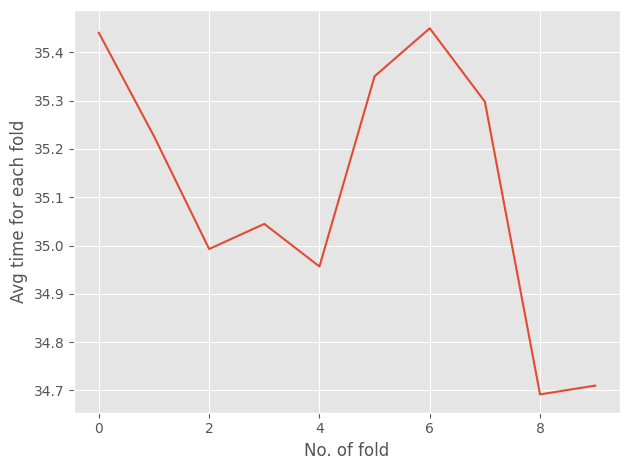

In [124]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [125]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [126]:
acc_scores_cb

[0.46357615894039733,
 0.4867549668874172,
 0.4470198675496689,
 0.5099337748344371,
 0.5397350993377483,
 0.45364238410596025,
 0.5033112582781457,
 0.49337748344370863,
 0.46357615894039733,
 0.5033112582781457]

In [127]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

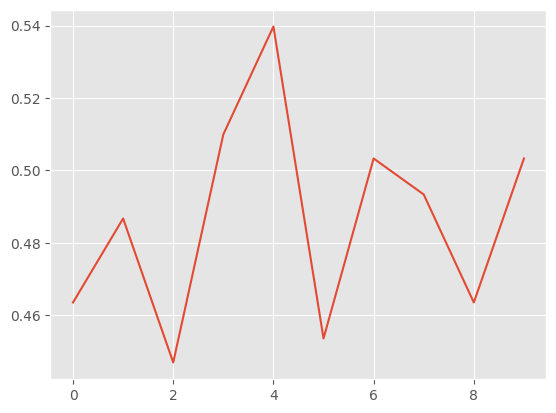

In [128]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [129]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [130]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.64%


In [131]:
import gc
gc.collect()

3185

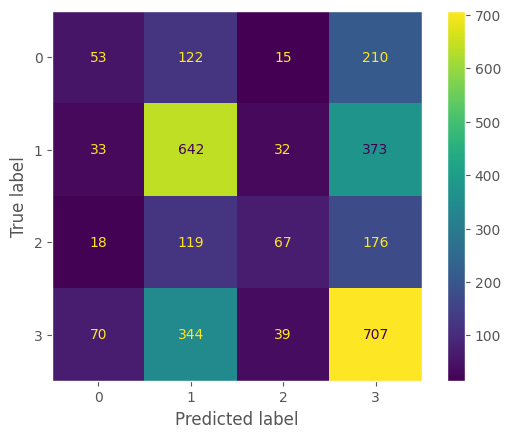

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [133]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.30      0.13      0.18       400
           1       0.52      0.59      0.56      1080
           2       0.44      0.18      0.25       380
           3       0.48      0.61      0.54      1160

    accuracy                           0.49      3020
   macro avg       0.44      0.38      0.38      3020
weighted avg       0.47      0.49      0.46      3020



In [134]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

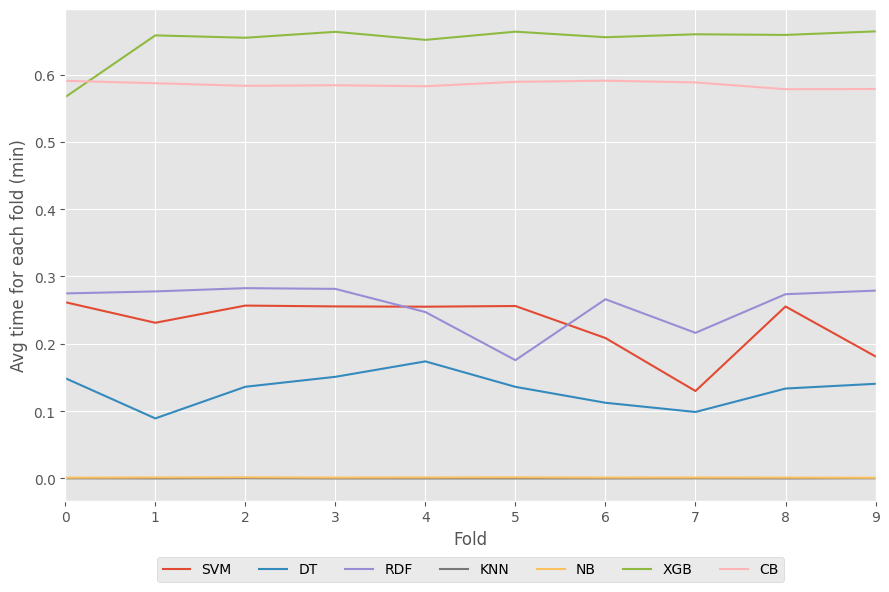

In [147]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [136]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

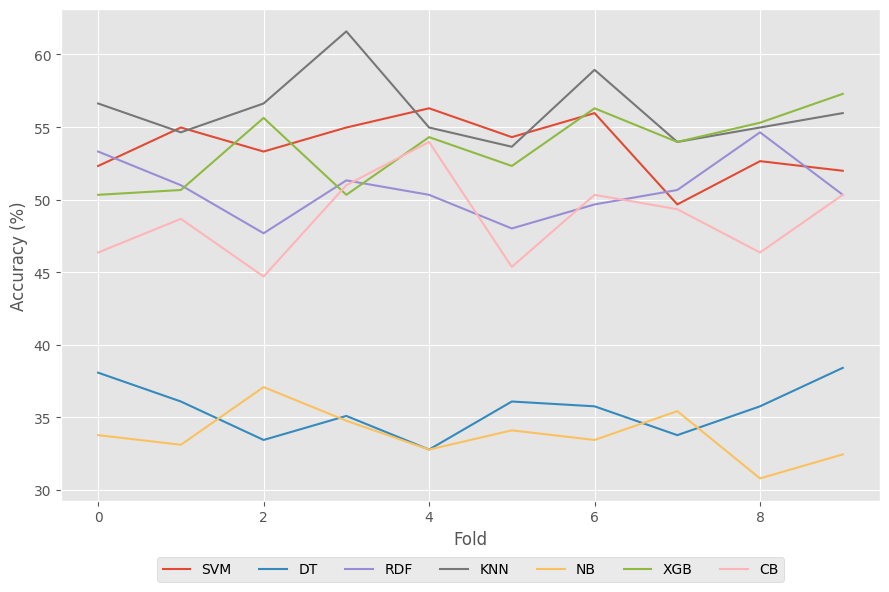

In [149]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [179]:
import gc
gc.collect()

6323

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [182]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [183]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [184]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 54ms/step - loss: 1.2301 - accuracy: 0.4338 - val_loss: 1.1941 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 48ms/step - loss: 1.0802 - accuracy: 0.5331 - val_loss: 1.1383 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 49ms/step - loss: 0.9666 - accuracy: 0.5789 - val_loss: 1.0141 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 47ms/step - loss: 0.8531 - accuracy: 0.6558 - val_loss: 1.0695 - val_accuracy: 0.5551 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 49ms/step - loss: 0.7614 - accuracy: 0.6885 - val_loss: 1.1396 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 50ms/step - loss: 0.6900 - accuracy: 0.7347 - val_loss: 1.0719 - val_accuracy: 0.5515 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 31/100
77/77 [==============================] - 4s 49ms/step - loss: 0.1246 - accuracy: 0.9546 - val_loss: 1.8167 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 4s 47ms/step - loss: 0.1702 - accuracy: 0.9338 - val_loss: 1.5634 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 4s 50ms/step - loss: 0.1623 - accuracy: 0.9428 - val_loss: 1.6258 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 4s 47ms/step - loss: 0.2176 - accuracy: 0.9248 - val_loss: 1.3925 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 4s 51ms/step - loss: 0.1641 - accuracy: 0.9440 - val_loss: 1.4634 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 4s 51ms/step - loss: 0.1383 - accuracy: 0.9481 - val_loss: 1.4731 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 37/100
77/77 [==============================] - 4s 50ms/st

Epoch 89/100
77/77 [==============================] - 4s 49ms/step - loss: 3.9952e-04 - accuracy: 1.0000 - val_loss: 2.2354 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 90/100
77/77 [==============================] - 4s 49ms/step - loss: 4.2629e-04 - accuracy: 1.0000 - val_loss: 2.2409 - val_accuracy: 0.6728 - lr: 4.0000e-05
Epoch 91/100
77/77 [==============================] - ETA: 0s - loss: 4.2740e-04 - accuracy: 1.0000
Epoch 91: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 91: 3.81 seconds
77/77 [==============================] - 4s 50ms/step - loss: 4.2740e-04 - accuracy: 1.0000 - val_loss: 2.2496 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 92/100
77/77 [==============================] - 4s 49ms/step - loss: 4.8970e-04 - accuracy: 1.0000 - val_loss: 2.2519 - val_accuracy: 0.6691 - lr: 8.0000e-06
Epoch 93/100
77/77 [==============================] - 4s 49ms/step - loss: 4.1418e-04 - accuracy: 1.0000 - val_loss: 2.2519 - val_accuracy: 0.

Epoch 18/100
77/77 [==============================] - 4s 49ms/step - loss: 0.3177 - accuracy: 0.8810 - val_loss: 1.0508 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 4s 51ms/step - loss: 0.3221 - accuracy: 0.8855 - val_loss: 1.2137 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 4s 47ms/step - loss: 0.2896 - accuracy: 0.8855 - val_loss: 1.1127 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 4s 52ms/step - loss: 0.2290 - accuracy: 0.9137 - val_loss: 1.3220 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 52ms/step - loss: 0.2029 - accuracy: 0.9186 - val_loss: 1.2044 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 52ms/step - loss: 0.2258 - accuracy: 0.9133 - val_loss: 1.2702 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - ETA: 0s - 

Epoch 47/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 1.7913 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 48/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 1.7951 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 49/100
77/77 [==============================] - 4s 46ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 1.8038 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 50/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0154 - accuracy: 0.9971 - val_loss: 1.8072 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 51/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 1.8103 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 52/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0115 - accuracy: 0.9980 - val_loss: 1.8146 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 53/100
77/77 [====================

Epoch 76/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0130 - accuracy: 0.9971 - val_loss: 1.8263 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 77/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0116 - accuracy: 0.9988 - val_loss: 1.8264 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 78/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0126 - accuracy: 0.9984 - val_loss: 1.8265 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 79/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 1.8263 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 80/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 1.8264 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 81/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 1.8264 - val_accuracy: 0.6912 - lr: 6.4000e-08
Epoch 82/100
77/77 [====================

Epoch 5/100
77/77 [==============================] - 4s 58ms/step - loss: 0.8068 - accuracy: 0.6680 - val_loss: 1.0339 - val_accuracy: 0.5515 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 50ms/step - loss: 0.7421 - accuracy: 0.6901 - val_loss: 1.0441 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 51ms/step - loss: 0.6880 - accuracy: 0.7236 - val_loss: 0.9835 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 51ms/step - loss: 0.6586 - accuracy: 0.7371 - val_loss: 1.0662 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 50ms/step - loss: 0.5749 - accuracy: 0.7743 - val_loss: 1.0722 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 50ms/step - loss: 0.5349 - accuracy: 0.7837 - val_loss: 1.0390 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 52ms/step - 

Epoch 63/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2030 - val_accuracy: 0.6728 - lr: 8.0000e-06
Epoch 64/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 2.2051 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 65/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.2082 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 66/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2117 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 67/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.2137 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 68/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2153 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 69/100
77/77 [====================

Epoch 92/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 2.2273 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 93/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2274 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 94/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2275 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 95/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2275 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 96/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2276 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 97/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2276 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 98/100
77/77 [====================

77/77 [==============================] - 4s 53ms/step - loss: 0.2278 - accuracy: 0.9105 - val_loss: 1.2123 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 46ms/step - loss: 0.2424 - accuracy: 0.9068 - val_loss: 1.1812 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 50ms/step - loss: 0.2679 - accuracy: 0.8970 - val_loss: 1.1097 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 4s 54ms/step - loss: 0.2631 - accuracy: 0.9015 - val_loss: 1.1204 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 4s 51ms/step - loss: 0.2180 - accuracy: 0.9219 - val_loss: 1.0363 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 26/100
77/77 [==============================] - 4s 47ms/step - loss: 0.1818 - accuracy: 0.9305 - val_loss: 1.0787 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 27/100
76/77 [============================>.] - ETA: 0s - loss: 0.1635 

77/77 [==============================] - 4s 49ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.6562 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 80/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 1.6580 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 81/100
77/77 [==============================] - 4s 50ms/step - loss: 9.3937e-04 - accuracy: 1.0000 - val_loss: 1.6668 - val_accuracy: 0.7279 - lr: 4.0000e-05
Epoch 82/100
77/77 [==============================] - ETA: 0s - loss: 8.8250e-04 - accuracy: 1.0000
Epoch 82: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 82: 3.72 seconds
77/77 [==============================] - 4s 48ms/step - loss: 8.8250e-04 - accuracy: 1.0000 - val_loss: 1.6753 - val_accuracy: 0.7243 - lr: 4.0000e-05
Epoch 83/100
77/77 [==============================] - 4s 51ms/step - loss: 7.6640e-04 - accuracy: 1.0000 - val_loss: 1.6769 - val_accuracy: 0.7243 - lr: 8.0000e-06

77/77 [==============================] - 4s 50ms/step - loss: 0.0372 - accuracy: 0.9861 - val_loss: 1.7093 - val_accuracy: 0.6765 - lr: 2.0000e-04
Epoch 37/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0256 - accuracy: 0.9894 - val_loss: 1.8852 - val_accuracy: 0.6471 - lr: 2.0000e-04
Epoch 38/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0337 - accuracy: 0.9877 - val_loss: 1.7777 - val_accuracy: 0.6507 - lr: 2.0000e-04
Epoch 39/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 1.8349 - val_accuracy: 0.6728 - lr: 2.0000e-04
Epoch 40/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 1.8164 - val_accuracy: 0.6728 - lr: 2.0000e-04
Epoch 41/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 1.8441 - val_accuracy: 0.6728 - lr: 2.0000e-04
Epoch 42/100
77/77 [==============================] -

Epoch 65/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.9448 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 66/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.9452 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 67/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9460 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 68/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 1.9465 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 69/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 1.9473 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 70/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 1.9477 - val_accuracy: 0.6728 - lr: 1.6000e-06
Epoch 71/100
77/77 [====================

Epoch 94/100
76/77 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 94: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 94: 4.02 seconds
77/77 [==============================] - 4s 52ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.9546 - val_accuracy: 0.6765 - lr: 6.4000e-08
Epoch 95/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9546 - val_accuracy: 0.6765 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 1.9545 - val_accuracy: 0.6765 - lr: 1.2800e-08
Epoch 97/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9546 - val_accuracy: 0.6765 - lr: 1.2800e-08
Epoch 98/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 1.9546 - val_accuracy: 0.6765 - lr: 1.2800e-08
E

Epoch 23/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0964 - accuracy: 0.9624 - val_loss: 1.4143 - val_accuracy: 0.6691 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0798 - accuracy: 0.9734 - val_loss: 1.5510 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0811 - accuracy: 0.9702 - val_loss: 1.4872 - val_accuracy: 0.6838 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0586 - accuracy: 0.9791 - val_loss: 1.5178 - val_accuracy: 0.6801 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 1.5169 - val_accuracy: 0.6912 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0605 - accuracy: 0.9796 - val_loss: 1.6886 - val_accuracy: 0.6581 - lr: 2.0000e-04
Epoch 29/100
77/77 [====================

Epoch 52/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0043 - val_accuracy: 0.6838 - lr: 4.0000e-05
Epoch 53/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.0250 - val_accuracy: 0.6801 - lr: 4.0000e-05
Epoch 54/100
77/77 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 54: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 54: 3.68 seconds
77/77 [==============================] - 4s 48ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0402 - val_accuracy: 0.6801 - lr: 4.0000e-05
Epoch 55/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0427 - val_accuracy: 0.6801 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0437 - val_accuracy: 0.6801 - lr: 8.0000e-06
Ep

Epoch 81/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.0754 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 82/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.0761 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 83/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.0763 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 84/100
77/77 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9996
Epoch 84: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 84: 3.98 seconds
77/77 [==============================] - 4s 52ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 2.0762 - val_accuracy: 0.6765 - lr: 3.2000e-07
Epoch 85/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 2.0762 - val_accuracy: 0.6765 - lr: 6.4000e-08
Ep

Epoch 10/100
77/77 [==============================] - 4s 49ms/step - loss: 0.5606 - accuracy: 0.7772 - val_loss: 1.1429 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 53ms/step - loss: 0.4818 - accuracy: 0.8181 - val_loss: 1.1593 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 52ms/step - loss: 0.4719 - accuracy: 0.8238 - val_loss: 1.2022 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 4s 49ms/step - loss: 0.4443 - accuracy: 0.8283 - val_loss: 1.1622 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 49ms/step - loss: 0.4499 - accuracy: 0.8250 - val_loss: 1.1576 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 50ms/step - loss: 0.4067 - accuracy: 0.8446 - val_loss: 1.2220 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 47ms/st

Epoch 68/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1382 - val_accuracy: 0.6838 - lr: 8.0000e-06
Epoch 69/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1402 - val_accuracy: 0.6838 - lr: 8.0000e-06
Epoch 70/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1430 - val_accuracy: 0.6875 - lr: 8.0000e-06
Epoch 71/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1444 - val_accuracy: 0.6912 - lr: 8.0000e-06
Epoch 72/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1503 - val_accuracy: 0.6875 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1532 - val_accuracy: 0.6875 - lr: 8.0000e-06
Epoch 74/100
77/77 [====================

Epoch 97/100
77/77 [==============================] - 4s 46ms/step - loss: 9.4987e-04 - accuracy: 1.0000 - val_loss: 2.1566 - val_accuracy: 0.6875 - lr: 6.4000e-08
Epoch 98/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1566 - val_accuracy: 0.6875 - lr: 6.4000e-08
Epoch 99/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1566 - val_accuracy: 0.6875 - lr: 6.4000e-08
Epoch 100/100
10/10 [==============================] - 1s 25ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 6s 55ms/step - loss: 1.2397 - accuracy: 0.4289 - val_loss: 1.2308 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 49ms/step - loss: 1.1105 - accuracy: 0.5106 - val_loss: 1.1503 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 51ms/step - loss: 0.9984 - accuracy: 0.5805 - val_loss: 1

Epoch 55/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 2.1264 - val_accuracy: 0.6434 - lr: 4.0000e-05
Epoch 56/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 2.1229 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9996
Epoch 57: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 57: 3.79 seconds
77/77 [==============================] - 4s 49ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 2.1345 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 58/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 2.1375 - val_accuracy: 0.6471 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 4s 46ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 2.1393 - val_accuracy: 0.6471 - lr: 8.0000e-06
Ep

Epoch 84/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.1738 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 85/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 2.1744 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 86/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.1747 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 87/100
76/77 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9996
Epoch 87: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 87: 3.79 seconds
77/77 [==============================] - 4s 49ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 2.1751 - val_accuracy: 0.6471 - lr: 3.2000e-07
Epoch 88/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.1752 - val_accuracy: 0.6471 - lr: 6.4000e-08
Ep

Epoch 13/100
77/77 [==============================] - 4s 49ms/step - loss: 0.4632 - accuracy: 0.8140 - val_loss: 1.1225 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 4s 49ms/step - loss: 0.3832 - accuracy: 0.8508 - val_loss: 0.9936 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 4s 49ms/step - loss: 0.3626 - accuracy: 0.8622 - val_loss: 1.0473 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 4s 48ms/step - loss: 0.3714 - accuracy: 0.8618 - val_loss: 1.1415 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 4s 49ms/step - loss: 0.3234 - accuracy: 0.8729 - val_loss: 1.1925 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 4s 51ms/step - loss: 0.3627 - accuracy: 0.8594 - val_loss: 1.0803 - val_accuracy: 0.6765 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 4s 49ms/st

Epoch 42/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 1.9641 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 1.9819 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 44/100
76/77 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979
Epoch 44: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 44: 3.75 seconds
77/77 [==============================] - 4s 48ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 2.0039 - val_accuracy: 0.6765 - lr: 4.0000e-05
Epoch 45/100
77/77 [==============================] - 4s 47ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 2.0020 - val_accuracy: 0.6765 - lr: 8.0000e-06
Epoch 46/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 2.0048 - val_accuracy: 0.6765 - lr: 8.0000e-06
Ep

Epoch 71/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 2.0262 - val_accuracy: 0.6691 - lr: 3.2000e-07
Epoch 72/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 2.0263 - val_accuracy: 0.6691 - lr: 3.2000e-07
Epoch 73/100
77/77 [==============================] - 4s 50ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 2.0262 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 74/100
76/77 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9996
Epoch 74: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 74: 3.57 seconds
77/77 [==============================] - 4s 46ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 2.0263 - val_accuracy: 0.6728 - lr: 3.2000e-07
Epoch 75/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 2.0263 - val_accuracy: 0.6728 - lr: 6.4000e-08
Ep

Epoch 100/100
10/10 [==============================] - 1s 23ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 7s 59ms/step - loss: 1.2380 - accuracy: 0.4207 - val_loss: 1.1018 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 54ms/step - loss: 1.0819 - accuracy: 0.5433 - val_loss: 1.0686 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 50ms/step - loss: 0.9688 - accuracy: 0.5973 - val_loss: 1.0175 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 0.8694 - accuracy: 0.6312 - val_loss: 1.0393 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 52ms/step - loss: 0.7886 - accuracy: 0.6823 - val_loss: 0.9213 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 54ms/step - loss: 0.7078 - accuracy: 0.7081 - val_loss: 0.9639 - val_accura

Epoch 58/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 2.0865 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0878 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0900 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 61/100
76/77 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9996
Epoch 61: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 61: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 2.0831 - val_accuracy: 0.6949 - lr: 8.0000e-06
Epoch 62/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0841 - val_accuracy: 0.6949 - lr: 1.6000e-06
E

Epoch 87/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0877 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0879 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 89/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0879 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 90/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0879 - val_accuracy: 0.6949 - lr: 6.4000e-08
Epoch 91/100
76/77 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 91: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 91: 4.01 seconds
77/77 [==============================] - 4s 52ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.0881 - val_accuracy: 0.6949 - lr: 6.4000e-08
E

In [185]:
import gc
gc.collect()

0

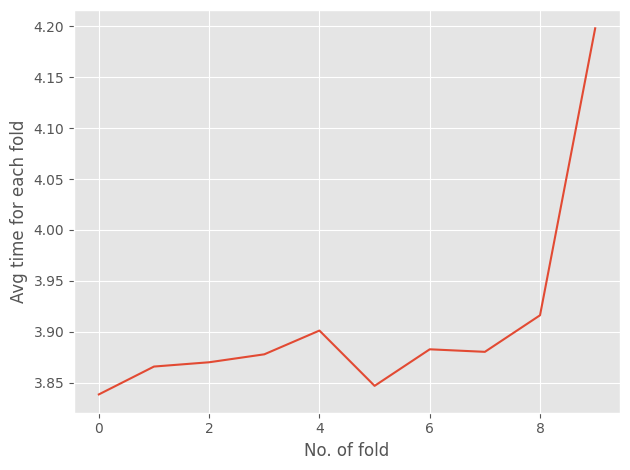

In [186]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [187]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [188]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

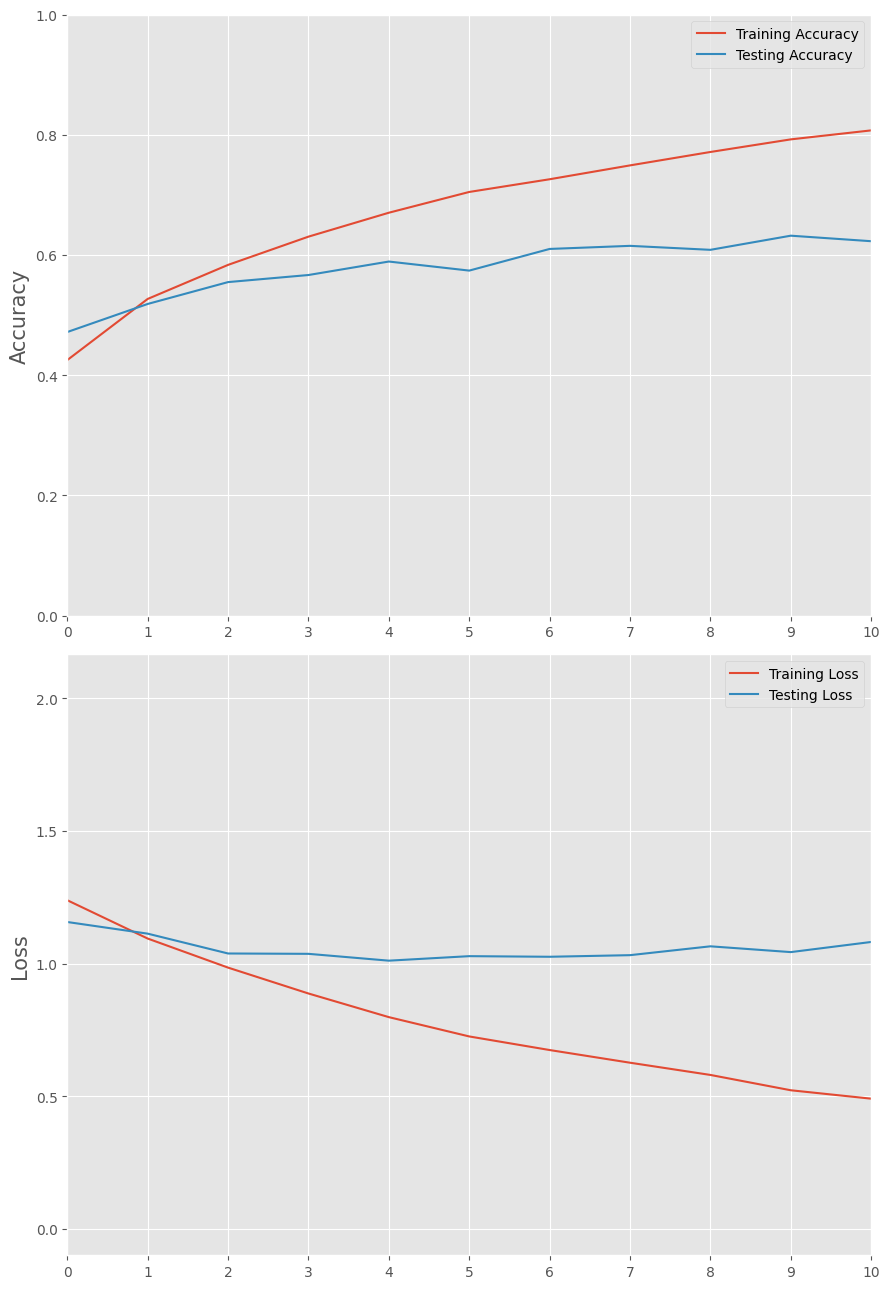

In [189]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [190]:
np.array(scores_lstm).shape

(10, 302, 4)

In [191]:
np.array(y_test_all_lstm).shape

(10, 302)

In [192]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [193]:
y_pred_lstm.shape

(10, 302)

In [194]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [195]:
acc_scores_lstm

[0.6423841059602649,
 0.6589403973509934,
 0.6920529801324503,
 0.6688741721854304,
 0.6158940397350994,
 0.6688741721854304,
 0.7019867549668874,
 0.7152317880794702,
 0.6821192052980133,
 0.6986754966887417]

In [196]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [197]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

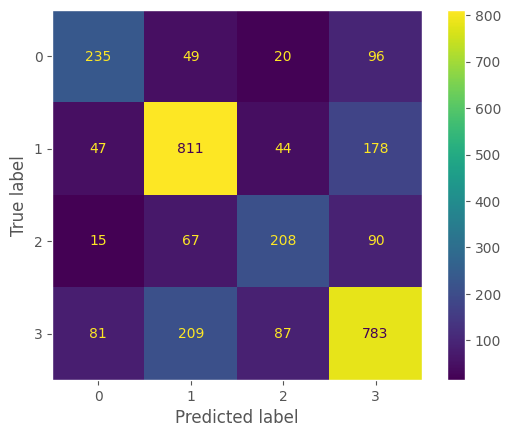

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [199]:
import gc
gc.collect()

29923

In [200]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       400
           1       0.71      0.75      0.73      1080
           2       0.58      0.55      0.56       380
           3       0.68      0.68      0.68      1160

    accuracy                           0.67      3020
   macro avg       0.65      0.64      0.64      3020
weighted avg       0.67      0.67      0.67      3020



# BISLTM

In [201]:
import gc
gc.collect()

0

In [202]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [203]:
from keras.layers import LSTM

In [204]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [205]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 11s 144ms/step - loss: 1.2691 - accuracy: 0.4043 - val_loss: 1.1878 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 115ms/step - loss: 1.1149 - accuracy: 0.5094 - val_loss: 1.0922 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 115ms/step - loss: 0.9709 - accuracy: 0.5981 - val_loss: 1.1031 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 117ms/step - loss: 0.8749 - accuracy: 0.6435 - val_loss: 1.0147 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 107ms/step - loss: 0.7424 - accuracy: 0.6983 - val_loss: 1.0129 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 115ms/step - loss: 0.6486 - accuracy: 0.7400 - val_loss: 1.0811 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 7/100
39/39 [===================

Epoch 30/100
39/39 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9930
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 4.87 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.0317 - accuracy: 0.9930 - val_loss: 1.5021 - val_accuracy: 0.6728 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0277 - accuracy: 0.9947 - val_loss: 1.4986 - val_accuracy: 0.6765 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0276 - accuracy: 0.9951 - val_loss: 1.4939 - val_accuracy: 0.6875 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0280 - accuracy: 0.9951 - val_loss: 1.4915 - val_accuracy: 0.6875 - lr: 8.0000e-06
Epoch 34/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0242 - accuracy: 0.9963 - val_loss: 1.4911 - val_accuracy: 0.6875 - lr: 8.0000e-

Epoch 58/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0258 - accuracy: 0.9959 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 2.5600e-09
Epoch 59/100
39/39 [==============================] - 4s 112ms/step - loss: 0.0250 - accuracy: 0.9951 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9935
Epoch 60: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 60: 4.34 seconds
39/39 [==============================] - 4s 112ms/step - loss: 0.0282 - accuracy: 0.9935 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0267 - accuracy: 0.9947 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 5.1200e-10
Epoch 62/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0258 - accuracy: 0.9951 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 5.1200e-10

Epoch 86/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0259 - accuracy: 0.9955 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0248 - accuracy: 0.9955 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0268 - accuracy: 0.9939 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 1.6384e-13
Epoch 89/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0275 - accuracy: 0.9959 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9959
Epoch 90: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 90: 4.46 seconds
39/39 [==============================] - 4s 115ms/step - loss: 0.0257 - accuracy: 0.9959 - val_loss: 1.4917 - val_accuracy: 0.6875 - lr: 1.6384e

39/39 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9914
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 42: 4.47 seconds
39/39 [==============================] - 4s 115ms/step - loss: 0.0366 - accuracy: 0.9914 - val_loss: 1.7148 - val_accuracy: 0.6324 - lr: 1.6000e-06
Epoch 43/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0350 - accuracy: 0.9914 - val_loss: 1.7151 - val_accuracy: 0.6324 - lr: 3.2000e-07
Epoch 44/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0331 - accuracy: 0.9939 - val_loss: 1.7154 - val_accuracy: 0.6324 - lr: 3.2000e-07
Epoch 45/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0320 - accuracy: 0.9947 - val_loss: 1.7156 - val_accuracy: 0.6324 - lr: 3.2000e-07
Epoch 46/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0345 - accuracy: 0.9914 - val_loss: 1.7156 - val_accuracy: 0.6324 - lr: 3.2000e-07
Epoch 47/1

Epoch 70/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0326 - accuracy: 0.9955 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 1.0240e-10
Epoch 71/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0342 - accuracy: 0.9930 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 1.0240e-10
Epoch 72/100
39/39 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9951
Epoch 72: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 72: 4.60 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.0301 - accuracy: 0.9951 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 1.0240e-10
Epoch 73/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0347 - accuracy: 0.9939 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 2.0480e-11
Epoch 74/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0323 - accuracy: 0.9926 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 2.0480e

Epoch 98/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0338 - accuracy: 0.9918 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 6.5536e-15
Epoch 99/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0358 - accuracy: 0.9914 - val_loss: 1.7159 - val_accuracy: 0.6324 - lr: 6.5536e-15
Epoch 100/100
10/10 [==============================] - 1s 29ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 9s 148ms/step - loss: 1.2442 - accuracy: 0.4497 - val_loss: 1.1374 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 135ms/step - loss: 1.0819 - accuracy: 0.5442 - val_loss: 1.1075 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 138ms/step - loss: 0.9589 - accuracy: 0.6173 - val_loss: 1.0759 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 121ms/step - loss: 0.8171 - accuracy: 0.6664 - val_loss: 1.05

Epoch 27/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0464 - accuracy: 0.9886 - val_loss: 1.5325 - val_accuracy: 0.6471 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9906
Epoch 28: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 28: 4.87 seconds
39/39 [==============================] - 5s 125ms/step - loss: 0.0331 - accuracy: 0.9906 - val_loss: 1.5895 - val_accuracy: 0.6838 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0278 - accuracy: 0.9943 - val_loss: 1.5460 - val_accuracy: 0.6912 - lr: 4.0000e-05
Epoch 30/100
39/39 [==============================] - 5s 139ms/step - loss: 0.0256 - accuracy: 0.9959 - val_loss: 1.5750 - val_accuracy: 0.6949 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0248 - accuracy: 0.9963 - val_loss: 1.5861 - val_accuracy: 0.6838 - lr: 4.0000e

Epoch 55/100
39/39 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9967
Epoch 55: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 55: 5.07 seconds
39/39 [==============================] - 5s 130ms/step - loss: 0.0218 - accuracy: 0.9967 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 6.4000e-08
Epoch 56/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0174 - accuracy: 0.9980 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - 5s 132ms/step - loss: 0.0206 - accuracy: 0.9967 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0189 - accuracy: 0.9971 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0218 - accuracy: 0.9963 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 1.2800e

Epoch 83/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0184 - accuracy: 0.9984 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 84/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0234 - accuracy: 0.9947 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 85/100
39/39 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9951
Epoch 85: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 85: 4.29 seconds
39/39 [==============================] - 4s 111ms/step - loss: 0.0231 - accuracy: 0.9951 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 86/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0218 - accuracy: 0.9963 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0193 - accuracy: 0.9967 - val_loss: 1.5928 - val_accuracy: 0.6801 - lr: 8.1920e-

Epoch 11/100
39/39 [==============================] - 4s 114ms/step - loss: 0.3861 - accuracy: 0.8459 - val_loss: 1.2275 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 5s 123ms/step - loss: 0.3764 - accuracy: 0.8545 - val_loss: 1.1465 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 5s 120ms/step - loss: 0.3670 - accuracy: 0.8622 - val_loss: 1.0793 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - 4s 109ms/step - loss: 0.3256 - accuracy: 0.8810 - val_loss: 1.1894 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 15/100
39/39 [==============================] - 5s 116ms/step - loss: 0.2962 - accuracy: 0.8888 - val_loss: 1.1372 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 16/100
39/39 [==============================] - 4s 115ms/step - loss: 0.2765 - accuracy: 0.8957 - val_loss: 1.1411 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 17/100
39/39 [==============================] - 5s 1

Epoch 40/100
39/39 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9971
Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 40: 4.82 seconds
39/39 [==============================] - 5s 124ms/step - loss: 0.0184 - accuracy: 0.9971 - val_loss: 1.5829 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 41/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0192 - accuracy: 0.9971 - val_loss: 1.5834 - val_accuracy: 0.6471 - lr: 8.0000e-06
Epoch 42/100
39/39 [==============================] - 4s 111ms/step - loss: 0.0134 - accuracy: 0.9992 - val_loss: 1.5843 - val_accuracy: 0.6471 - lr: 8.0000e-06
Epoch 43/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0186 - accuracy: 0.9963 - val_loss: 1.5805 - val_accuracy: 0.6507 - lr: 8.0000e-06
Epoch 44/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 1.5804 - val_accuracy: 0.6471 - lr: 8.0000e-

Epoch 68/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0159 - accuracy: 0.9988 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 2.5600e-09
Epoch 69/100
39/39 [==============================] - 4s 103ms/step - loss: 0.0133 - accuracy: 0.9988 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 2.5600e-09
Epoch 70/100
39/39 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9984
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 70: 4.70 seconds
39/39 [==============================] - 5s 121ms/step - loss: 0.0144 - accuracy: 0.9984 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 2.5600e-09
Epoch 71/100
39/39 [==============================] - 4s 116ms/step - loss: 0.0225 - accuracy: 0.9955 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 5.1200e-10

Epoch 96/100
39/39 [==============================] - 4s 109ms/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 1.6384e-13
Epoch 97/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0160 - accuracy: 0.9984 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 1.6384e-13
Epoch 98/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0161 - accuracy: 0.9971 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 1.6384e-13
Epoch 99/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0169 - accuracy: 0.9963 - val_loss: 1.5806 - val_accuracy: 0.6507 - lr: 1.6384e-13
Epoch 100/100
39/39 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9996
Epoch 100: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 100: 4.30 seconds
10/10 [==============================] - 1s 54ms/step
Training on fold 5/10...
Epoch 1/100
39/39 [==============================] - 9s 142ms/

Epoch 25/100
39/39 [==============================] - 5s 130ms/step - loss: 0.1843 - accuracy: 0.9370 - val_loss: 1.5118 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 26/100
39/39 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.9542
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 26: 4.23 seconds
39/39 [==============================] - 4s 109ms/step - loss: 0.1328 - accuracy: 0.9542 - val_loss: 1.5258 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 27/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0863 - accuracy: 0.9722 - val_loss: 1.5254 - val_accuracy: 0.6507 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0466 - accuracy: 0.9890 - val_loss: 1.6012 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - 4s 111ms/step - loss: 0.0422 - accuracy: 0.9894 - val_loss: 1.6520 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoc

Epoch 53/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0208 - accuracy: 0.9963 - val_loss: 1.6993 - val_accuracy: 0.6618 - lr: 6.4000e-08
Epoch 54/100
39/39 [==============================] - 6s 150ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 6.4000e-08
Epoch 55/100
39/39 [==============================] - 6s 146ms/step - loss: 0.0213 - accuracy: 0.9971 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 6.4000e-08
Epoch 56/100
39/39 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9975
Epoch 56: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 56: 4.58 seconds
39/39 [==============================] - 5s 118ms/step - loss: 0.0189 - accuracy: 0.9975 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 6.4000e-08
Epoch 57/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0212 - accuracy: 0.9975 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 1.2800e

Epoch 81/100
39/39 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9959
Epoch 81: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 81: 4.62 seconds
39/39 [==============================] - 5s 119ms/step - loss: 0.0223 - accuracy: 0.9959 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 2.0480e-11
Epoch 82/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0245 - accuracy: 0.9939 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 4.0960e-12
Epoch 83/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 4.0960e-12
Epoch 84/100
39/39 [==============================] - 4s 114ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 4.0960e-12
Epoch 85/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0185 - accuracy: 0.9975 - val_loss: 1.6994 - val_accuracy: 0.6618 - lr: 4.0960e-

Epoch 9/100
39/39 [==============================] - 4s 111ms/step - loss: 0.4934 - accuracy: 0.8123 - val_loss: 1.2604 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 4s 112ms/step - loss: 0.5017 - accuracy: 0.8017 - val_loss: 1.1264 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 5s 116ms/step - loss: 0.4322 - accuracy: 0.8324 - val_loss: 1.1305 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 5s 122ms/step - loss: 0.4372 - accuracy: 0.8303 - val_loss: 1.0758 - val_accuracy: 0.6618 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 4s 108ms/step - loss: 0.3693 - accuracy: 0.8610 - val_loss: 1.0829 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - 5s 120ms/step - loss: 0.3531 - accuracy: 0.8696 - val_loss: 1.2975 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 15/100
39/39 [==============================] - 5s 12

Epoch 66/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0134 - accuracy: 0.9988 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 6.4000e-08
Epoch 67/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0141 - accuracy: 0.9971 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 6.4000e-08
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9988
Epoch 68: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 68: 4.50 seconds
39/39 [==============================] - 5s 116ms/step - loss: 0.0121 - accuracy: 0.9988 - val_loss: 1.5917 - val_accuracy: 0.7132 - lr: 6.4000e-08
Epoch 69/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0131 - accuracy: 0.9992 - val_loss: 1.5917 - val_accuracy: 0.7132 - lr: 1.2800e-08
Epoch 70/100
39/39 [==============================] - 5s 128ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 1.5917 - val_accuracy: 0.7132 - lr: 1.2800e

Epoch 94/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0148 - accuracy: 0.9980 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 4.0960e-12
Epoch 95/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0145 - accuracy: 0.9975 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 4.0960e-12
Epoch 96/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0148 - accuracy: 0.9971 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 4.0960e-12
Epoch 97/100
39/39 [==============================] - 4s 112ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 4.0960e-12
Epoch 98/100
39/39 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9971
Epoch 98: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 98: 4.45 seconds
39/39 [==============================] - 4s 115ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 1.5918 - val_accuracy: 0.7132 - lr: 4.0960e-

Epoch 50/100
39/39 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9881
Epoch 50: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 50: 4.94 seconds
39/39 [==============================] - 5s 128ms/step - loss: 0.0472 - accuracy: 0.9881 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 1.2800e-08
Epoch 51/100
39/39 [==============================] - 4s 108ms/step - loss: 0.0540 - accuracy: 0.9853 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 2.5600e-09
Epoch 52/100
39/39 [==============================] - 4s 116ms/step - loss: 0.0489 - accuracy: 0.9869 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 2.5600e-09
Epoch 53/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0499 - accuracy: 0.9865 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 2.5600e-09
Epoch 54/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0425 - accuracy: 0.9914 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 2.5600e

Epoch 78/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0488 - accuracy: 0.9881 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 8.1920e-13
Epoch 79/100
39/39 [==============================] - 5s 133ms/step - loss: 0.0501 - accuracy: 0.9857 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 8.1920e-13
Epoch 80/100
39/39 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9890
Epoch 80: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 80: 4.07 seconds
39/39 [==============================] - 4s 104ms/step - loss: 0.0481 - accuracy: 0.9890 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 8.1920e-13
Epoch 81/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0462 - accuracy: 0.9902 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 1.6384e-13
Epoch 82/100
39/39 [==============================] - 5s 139ms/step - loss: 0.0443 - accuracy: 0.9910 - val_loss: 1.5930 - val_accuracy: 0.6581 - lr: 1.6384e

Epoch 6/100
39/39 [==============================] - 5s 139ms/step - loss: 0.6453 - accuracy: 0.7486 - val_loss: 1.1020 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 5s 139ms/step - loss: 0.5881 - accuracy: 0.7706 - val_loss: 1.0836 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 5s 140ms/step - loss: 0.5206 - accuracy: 0.8001 - val_loss: 1.1617 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 5s 119ms/step - loss: 0.4698 - accuracy: 0.8185 - val_loss: 1.0153 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 5s 131ms/step - loss: 0.4140 - accuracy: 0.8430 - val_loss: 1.0141 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 5s 126ms/step - loss: 0.3932 - accuracy: 0.8532 - val_loss: 1.0995 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 4s 115ms

Epoch 62/100
39/39 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9910
Epoch 62: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 62: 4.85 seconds
39/39 [==============================] - 5s 125ms/step - loss: 0.0421 - accuracy: 0.9910 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 5.1200e-10
Epoch 63/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0428 - accuracy: 0.9922 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 1.0240e-10
Epoch 64/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0419 - accuracy: 0.9914 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 1.0240e-10
Epoch 65/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0479 - accuracy: 0.9881 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 1.0240e-10
Epoch 66/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0403 - accuracy: 0.9918 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 1.0240e

Epoch 90/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0447 - accuracy: 0.9898 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 3.2768e-14
Epoch 91/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0458 - accuracy: 0.9869 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 3.2768e-14
Epoch 92/100
39/39 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9906
Epoch 92: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 92: 5.01 seconds
39/39 [==============================] - 5s 129ms/step - loss: 0.0409 - accuracy: 0.9906 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 3.2768e-14
Epoch 93/100
39/39 [==============================] - 5s 116ms/step - loss: 0.0516 - accuracy: 0.9865 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 6.5536e-15
Epoch 94/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0404 - accuracy: 0.9902 - val_loss: 1.3717 - val_accuracy: 0.6728 - lr: 6.5536e-

Epoch 46/100
39/39 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9910
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 46: 4.63 seconds
39/39 [==============================] - 5s 119ms/step - loss: 0.0401 - accuracy: 0.9910 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 6.4000e-08
Epoch 47/100
39/39 [==============================] - 4s 112ms/step - loss: 0.0381 - accuracy: 0.9935 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 48/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0379 - accuracy: 0.9918 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 49/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0374 - accuracy: 0.9914 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 1.2800e-08
Epoch 50/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0386 - accuracy: 0.9930 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 1.2800e

Epoch 74/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0385 - accuracy: 0.9926 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 75/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0381 - accuracy: 0.9926 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 76/100
39/39 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9914
Epoch 76: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 76: 4.80 seconds
39/39 [==============================] - 5s 123ms/step - loss: 0.0374 - accuracy: 0.9914 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 4.0960e-12
Epoch 77/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0421 - accuracy: 0.9910 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 8.1920e-13
Epoch 78/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0442 - accuracy: 0.9898 - val_loss: 1.4534 - val_accuracy: 0.6801 - lr: 8.1920e-

Epoch 2/100
39/39 [==============================] - 4s 116ms/step - loss: 1.0774 - accuracy: 0.5413 - val_loss: 1.0507 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 105ms/step - loss: 0.9457 - accuracy: 0.6096 - val_loss: 0.9860 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 134ms/step - loss: 0.8002 - accuracy: 0.6864 - val_loss: 1.0507 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 6s 147ms/step - loss: 0.7162 - accuracy: 0.7183 - val_loss: 1.0699 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 122ms/step - loss: 0.6805 - accuracy: 0.7302 - val_loss: 1.0447 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 5s 139ms/step - loss: 0.5434 - accuracy: 0.7882 - val_loss: 1.1000 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 6s 149ms/st

Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9984
Epoch 59: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 59: 5.02 seconds
39/39 [==============================] - 5s 128ms/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 6.4000e-08
Epoch 60/100
39/39 [==============================] - 6s 149ms/step - loss: 0.0170 - accuracy: 0.9980 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 1.2800e-08
Epoch 61/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0174 - accuracy: 0.9963 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 1.2800e-08
Epoch 62/100
39/39 [==============================] - 4s 116ms/step - loss: 0.0179 - accuracy: 0.9971 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 1.2800e-08
Epoch 63/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 1.2800e

Epoch 87/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 4.0960e-12
Epoch 88/100
39/39 [==============================] - 4s 111ms/step - loss: 0.0174 - accuracy: 0.9971 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 4.0960e-12
Epoch 89/100
39/39 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9975
Epoch 89: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 89: 4.76 seconds
39/39 [==============================] - 5s 123ms/step - loss: 0.0170 - accuracy: 0.9975 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 4.0960e-12
Epoch 90/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0158 - accuracy: 0.9963 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 8.1920e-13
Epoch 91/100
39/39 [==============================] - 4s 113ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 1.4831 - val_accuracy: 0.6838 - lr: 8.1920e-

In [206]:
import gc
gc.collect()

0

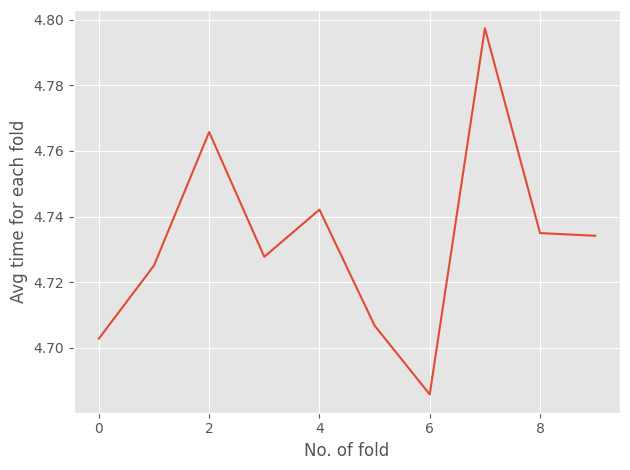

In [207]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [208]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [209]:
train_acc_bilstm_n

array([0.41991006, 0.5215045 , 0.60044972, 0.66275552, 0.71112019,
       0.74452167, 0.77669666, 0.79869174, 0.82628781, 0.83274734,
       0.84820115, 0.86009812, 0.87203599, 0.88315617, 0.8949305 ,
       0.90114472, 0.92269011, 0.92681929, 0.93487327, 0.94987736,
       0.95433362, 0.96291906, 0.96770237, 0.97436631, 0.979722  ,
       0.98368766, 0.98650858, 0.98892069, 0.99006541, 0.99137367,
       0.99080131, 0.99170073, 0.99190515, 0.99296811, 0.99329517,
       0.9937449 , 0.9932543 , 0.99382666, 0.99366312, 0.99345871,
       0.99374489, 0.99435814, 0.99309076, 0.99439901, 0.99358135,
       0.99378579, 0.99456256, 0.99472609, 0.99456255, 0.99484875,
       0.99407195, 0.99366312, 0.99431726, 0.99493049, 0.99493051,
       0.99505316, 0.99415373, 0.99448079, 0.99472609, 0.99394931,
       0.99378578, 0.99439902, 0.99448079, 0.99480785, 0.99419461,
       0.99427637, 0.99419461, 0.99521669, 0.99460344, 0.99435815,
       0.99362224, 0.99407196, 0.99468521, 0.99415373, 0.99427

In [210]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [211]:
train_acc_bilstm_n

0     0.419910
1     0.521505
2     0.600450
3     0.662756
4     0.711120
        ...   
95    0.994440
96    0.993459
97    0.994317
98    0.993418
99    0.994113
Name: 0, Length: 100, dtype: float64

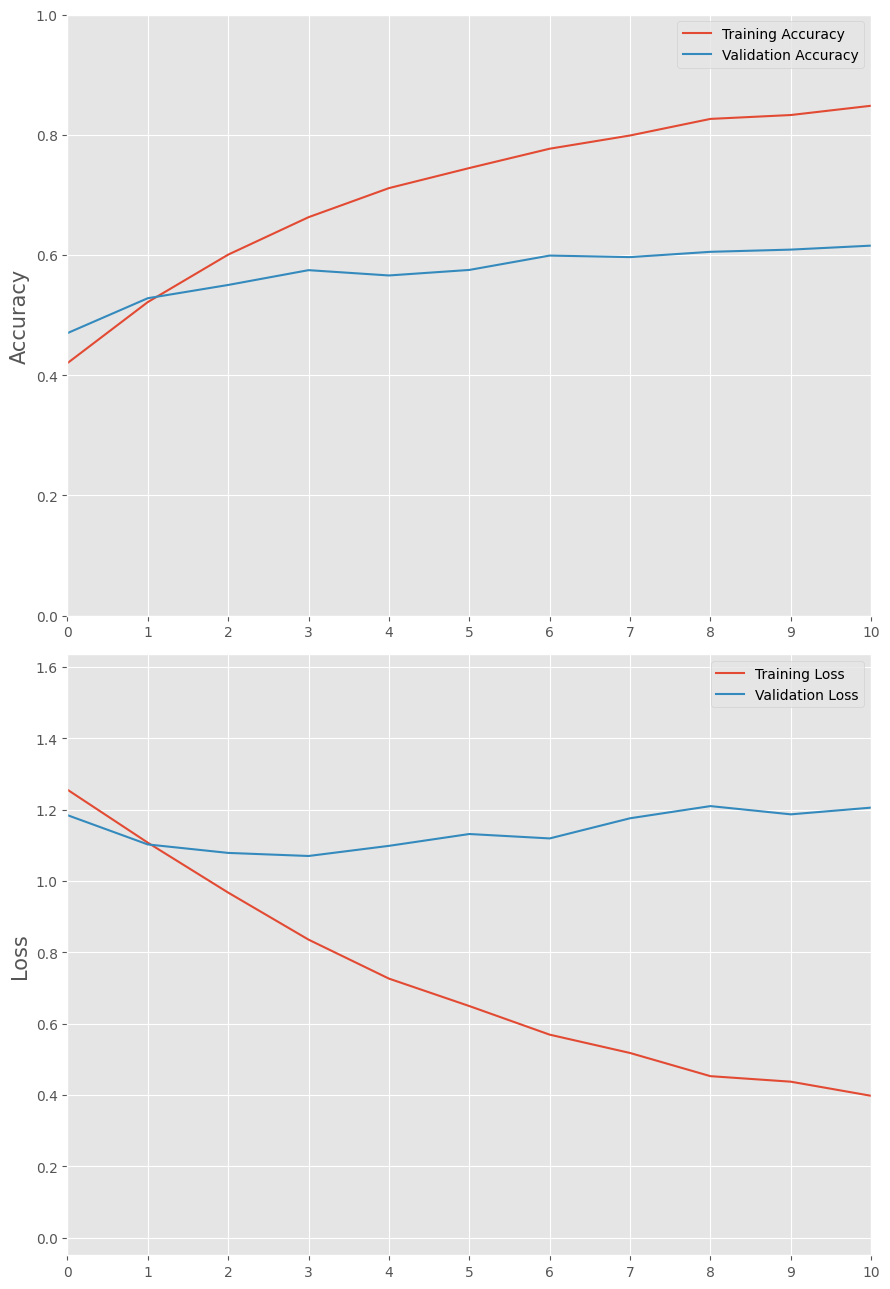

In [212]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [213]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [214]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [215]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [216]:
y_pred_bilstm.shape

(10, 302)

In [217]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [218]:
acc_scores_bilstm

[0.6821192052980133,
 0.7086092715231788,
 0.6788079470198676,
 0.6721854304635762,
 0.6788079470198676,
 0.7152317880794702,
 0.6192052980132451,
 0.6655629139072847,
 0.6854304635761589,
 0.7284768211920529]

In [219]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [220]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

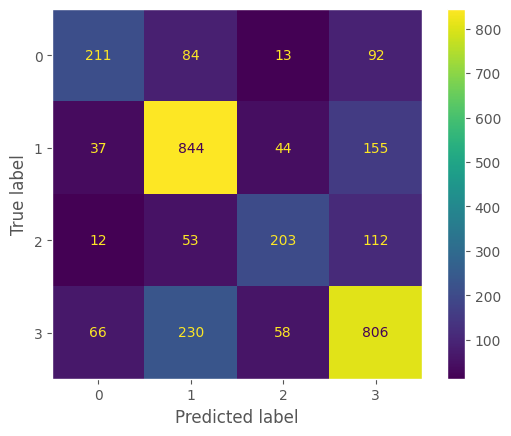

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [222]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.65      0.53      0.58       400
           1       0.70      0.78      0.74      1080
           2       0.64      0.53      0.58       380
           3       0.69      0.69      0.69      1160

    accuracy                           0.68      3020
   macro avg       0.67      0.63      0.65      3020
weighted avg       0.68      0.68      0.68      3020



# BRNN

In [18]:
import gc
gc.collect()

0

In [19]:
# X,y = load_data(DATA_PATH)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [10]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [11]:
import gc
gc.collect()

0

In [12]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 67s 847ms/step - loss: 1.7075 - accuracy: 0.3487 - val_loss: 1.3281 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 68s 881ms/step - loss: 1.5883 - accuracy: 0.3422 - val_loss: 1.3274 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 903ms/step - loss: 1.5072 - accuracy: 0.3573 - val_loss: 1.2892 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 69s 899ms/step - loss: 1.4068 - accuracy: 0.3774 - val_loss: 1.3265 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 68s 879ms/step - loss: 1.3771 - accuracy: 0.3802 - val_loss: 1.2525 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 68s 882ms/step - loss: 1.3469 - accuracy: 0.3892 - val_loss: 1.2843 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - 68s 890ms/step - loss: 0.5724 - accuracy: 0.7850 - val_loss: 1.3912 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 68s 881ms/step - loss: 0.5460 - accuracy: 0.8013 - val_loss: 1.3947 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 68s 878ms/step - loss: 0.5490 - accuracy: 0.7980 - val_loss: 1.3953 - val_accuracy: 0.5368 - lr: 8.0000e-06
Epoch 61/100
77/77 [==============================] - ETA: 0s - loss: 0.5537 - accuracy: 0.7952
Epoch 61: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 61: 68.40 seconds
77/77 [==============================] - 68s 891ms/step - loss: 0.5537 - accuracy: 0.7952 - val_loss: 1.3945 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 62/100
77/77 [==============================] - 67s 867ms/step - loss: 0.5482 - accuracy: 0.8042 - val_loss: 1.3963 - val_accuracy: 0.5331 - lr: 1.6000e-06
Epo

Epoch 86/100
77/77 [==============================] - 66s 857ms/step - loss: 0.5561 - accuracy: 0.7927 - val_loss: 1.3991 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 87/100
77/77 [==============================] - 67s 875ms/step - loss: 0.5617 - accuracy: 0.7939 - val_loss: 1.3990 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 88/100
77/77 [==============================] - 68s 882ms/step - loss: 0.5504 - accuracy: 0.7948 - val_loss: 1.3991 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - ETA: 0s - loss: 0.5663 - accuracy: 0.7956
Epoch 89: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 89: 67.41 seconds
77/77 [==============================] - 67s 878ms/step - loss: 0.5663 - accuracy: 0.7956 - val_loss: 1.3990 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 68s 882ms/step - loss: 0.5503 - accuracy: 0.7960 - val_loss: 1.3990 - val_accuracy: 0.5331 - lr: 2

Epoch 15/100
77/77 [==============================] - 65s 844ms/step - loss: 1.1926 - accuracy: 0.4706 - val_loss: 1.2094 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - ETA: 0s - loss: 1.1740 - accuracy: 0.4791
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 16: 64.20 seconds
77/77 [==============================] - 64s 834ms/step - loss: 1.1740 - accuracy: 0.4791 - val_loss: 1.2213 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 68s 878ms/step - loss: 1.1535 - accuracy: 0.4975 - val_loss: 1.1835 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 65s 840ms/step - loss: 1.1480 - accuracy: 0.4988 - val_loss: 1.1680 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 66s 859ms/step - loss: 1.1377 - accuracy: 0.5098 - val_loss: 1.1691 - val_accuracy: 0.5294 - lr: 2.0000e-0

Epoch 71/100
77/77 [==============================] - 63s 824ms/step - loss: 0.9562 - accuracy: 0.6128 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 72/100
77/77 [==============================] - ETA: 0s - loss: 0.9578 - accuracy: 0.6137
Epoch 72: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 72: 66.32 seconds
77/77 [==============================] - 66s 862ms/step - loss: 0.9578 - accuracy: 0.6137 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 73/100
77/77 [==============================] - 65s 841ms/step - loss: 0.9547 - accuracy: 0.6165 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 2.5600e-09
Epoch 74/100
77/77 [==============================] - 66s 861ms/step - loss: 0.9679 - accuracy: 0.6083 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 2.5600e-09
Epoch 75/100
77/77 [==============================] - 64s 835ms/step - loss: 0.9528 - accuracy: 0.6141 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 2

Epoch 99/100
77/77 [==============================] - 67s 876ms/step - loss: 0.9557 - accuracy: 0.6218 - val_loss: 1.2253 - val_accuracy: 0.5294 - lr: 2.0480e-11
Epoch 100/100
77/77 [==============================] - ETA: 0s - loss: 0.9697 - accuracy: 0.6055
Epoch 100: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 100: 66.38 seconds
10/10 [==============================] - 2s 137ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 68s 858ms/step - loss: 1.7330 - accuracy: 0.3254 - val_loss: 1.2849 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 64s 836ms/step - loss: 1.5797 - accuracy: 0.3397 - val_loss: 1.2540 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 63s 824ms/step - loss: 1.4918 - accuracy: 0.3585 - val_loss: 1.2352 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 66s 865ms/step - lo

Epoch 28/100
77/77 [==============================] - 63s 817ms/step - loss: 1.0361 - accuracy: 0.5707 - val_loss: 1.2346 - val_accuracy: 0.4669 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 65s 850ms/step - loss: 1.0461 - accuracy: 0.5548 - val_loss: 1.2058 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - ETA: 0s - loss: 1.0291 - accuracy: 0.5769
Epoch 30: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 30: 63.16 seconds
77/77 [==============================] - 63s 821ms/step - loss: 1.0291 - accuracy: 0.5769 - val_loss: 1.2305 - val_accuracy: 0.4963 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 65s 841ms/step - loss: 1.0022 - accuracy: 0.5867 - val_loss: 1.2263 - val_accuracy: 0.4926 - lr: 4.0000e-05
Epoch 32/100
77/77 [==============================] - 65s 848ms/step - loss: 0.9858 - accuracy: 0.6006 - val_loss: 1.2609 - val_accuracy: 0.4816 - lr: 4

Epoch 84/100
77/77 [==============================] - ETA: 0s - loss: 0.9495 - accuracy: 0.6222
Epoch 84: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 84: 64.24 seconds
77/77 [==============================] - 64s 836ms/step - loss: 0.9495 - accuracy: 0.6222 - val_loss: 1.3185 - val_accuracy: 0.5074 - lr: 2.5600e-09
Epoch 85/100
77/77 [==============================] - 64s 830ms/step - loss: 0.9426 - accuracy: 0.6292 - val_loss: 1.3185 - val_accuracy: 0.5074 - lr: 5.1200e-10
Epoch 86/100
77/77 [==============================] - 64s 837ms/step - loss: 0.9426 - accuracy: 0.6083 - val_loss: 1.3185 - val_accuracy: 0.5074 - lr: 5.1200e-10
Epoch 87/100
77/77 [==============================] - 65s 842ms/step - loss: 0.9542 - accuracy: 0.6137 - val_loss: 1.3185 - val_accuracy: 0.5074 - lr: 5.1200e-10
Epoch 88/100
77/77 [==============================] - 65s 848ms/step - loss: 0.9584 - accuracy: 0.6177 - val_loss: 1.3185 - val_accuracy: 0.5074 - lr: 5.12

Epoch 41/100
77/77 [==============================] - ETA: 0s - loss: 1.0990 - accuracy: 0.5131
Epoch 41: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 41: 66.71 seconds
77/77 [==============================] - 67s 869ms/step - loss: 1.0990 - accuracy: 0.5131 - val_loss: 1.2181 - val_accuracy: 0.4706 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 64s 833ms/step - loss: 1.1010 - accuracy: 0.5213 - val_loss: 1.2204 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 65s 850ms/step - loss: 1.1128 - accuracy: 0.5229 - val_loss: 1.2231 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 44/100
77/77 [==============================] - 66s 855ms/step - loss: 1.1058 - accuracy: 0.5298 - val_loss: 1.2248 - val_accuracy: 0.4706 - lr: 8.0000e-06
Epoch 45/100
77/77 [==============================] - 67s 870ms/step - loss: 1.1012 - accuracy: 0.5348 - val_loss: 1.2203 - val_accuracy: 0.4706 - lr: 8.

Epoch 69/100
77/77 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.5311
Epoch 69: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 69: 63.26 seconds
77/77 [==============================] - 63s 821ms/step - loss: 1.0986 - accuracy: 0.5311 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 6.4000e-08
Epoch 70/100
77/77 [==============================] - 65s 849ms/step - loss: 1.0914 - accuracy: 0.5376 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 1.2800e-08
Epoch 71/100
77/77 [==============================] - 65s 848ms/step - loss: 1.1033 - accuracy: 0.5172 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 1.2800e-08
Epoch 72/100
77/77 [==============================] - 63s 818ms/step - loss: 1.1039 - accuracy: 0.5356 - val_loss: 1.2209 - val_accuracy: 0.4779 - lr: 1.2800e-08
Epoch 73/100
77/77 [==============================] - 65s 842ms/step - loss: 1.0967 - accuracy: 0.5303 - val_loss: 1.2209 - val_accuracy: 0.4779 - lr: 1

Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 1.1066 - accuracy: 0.5356
Epoch 97: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 97: 64.50 seconds
77/77 [==============================] - 64s 839ms/step - loss: 1.1066 - accuracy: 0.5356 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 1.0240e-10
Epoch 98/100
77/77 [==============================] - 67s 867ms/step - loss: 1.1051 - accuracy: 0.5192 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 2.0480e-11
Epoch 99/100
77/77 [==============================] - 64s 836ms/step - loss: 1.0908 - accuracy: 0.5298 - val_loss: 1.2210 - val_accuracy: 0.4779 - lr: 2.0480e-11
Epoch 100/100
10/10 [==============================] - 1s 111ms/step
Training on fold 5/10...
Epoch 1/100
77/77 [==============================] - 69s 876ms/step - loss: 1.7880 - accuracy: 0.3034 - val_loss: 1.4668 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 65s 842ms/

Epoch 26/100
77/77 [==============================] - 64s 830ms/step - loss: 0.9912 - accuracy: 0.5863 - val_loss: 1.2397 - val_accuracy: 0.4926 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 64s 832ms/step - loss: 0.9918 - accuracy: 0.5924 - val_loss: 1.2609 - val_accuracy: 0.4779 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 65s 843ms/step - loss: 0.9892 - accuracy: 0.5801 - val_loss: 1.2532 - val_accuracy: 0.4853 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 66s 863ms/step - loss: 0.9497 - accuracy: 0.6071 - val_loss: 1.2863 - val_accuracy: 0.4853 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 65s 847ms/step - loss: 0.9480 - accuracy: 0.6038 - val_loss: 1.2592 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 67s 872ms/step - loss: 0.9313 - accuracy: 0.6112 - val_loss: 1.3012 - val_accuracy: 0.5184 - lr: 2.0000e-04
Epoch 32/100
77/77 [========

Epoch 82/100
77/77 [==============================] - 65s 849ms/step - loss: 0.7763 - accuracy: 0.6840 - val_loss: 1.3288 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 83/100
77/77 [==============================] - 64s 830ms/step - loss: 0.7793 - accuracy: 0.6950 - val_loss: 1.3288 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 84/100
77/77 [==============================] - 64s 828ms/step - loss: 0.7790 - accuracy: 0.6971 - val_loss: 1.3288 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 85/100
77/77 [==============================] - 66s 860ms/step - loss: 0.7862 - accuracy: 0.6844 - val_loss: 1.3288 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 86/100
77/77 [==============================] - 67s 866ms/step - loss: 0.7719 - accuracy: 0.7007 - val_loss: 1.3288 - val_accuracy: 0.4890 - lr: 2.5600e-09
Epoch 87/100
77/77 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.6983
Epoch 87: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoc

Time taken for epoch 38: 65.88 seconds
77/77 [==============================] - 66s 858ms/step - loss: 0.9297 - accuracy: 0.6182 - val_loss: 1.2523 - val_accuracy: 0.5037 - lr: 4.0000e-05
Epoch 39/100
77/77 [==============================] - 65s 846ms/step - loss: 0.9203 - accuracy: 0.6206 - val_loss: 1.2688 - val_accuracy: 0.5184 - lr: 8.0000e-06
Epoch 40/100
77/77 [==============================] - 67s 878ms/step - loss: 0.9320 - accuracy: 0.6026 - val_loss: 1.2648 - val_accuracy: 0.5110 - lr: 8.0000e-06
Epoch 41/100
77/77 [==============================] - 66s 857ms/step - loss: 0.9157 - accuracy: 0.6210 - val_loss: 1.2628 - val_accuracy: 0.5074 - lr: 8.0000e-06
Epoch 42/100
77/77 [==============================] - 65s 839ms/step - loss: 0.9111 - accuracy: 0.6353 - val_loss: 1.2672 - val_accuracy: 0.5037 - lr: 8.0000e-06
Epoch 43/100
77/77 [==============================] - 66s 862ms/step - loss: 0.9357 - accuracy: 0.6038 - val_loss: 1.2551 - val_accuracy: 0.5110 - lr: 8.0000e-06
Ep

Epoch 67/100
77/77 [==============================] - ETA: 0s - loss: 0.9041 - accuracy: 0.6243
Epoch 67: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 67: 66.18 seconds
77/77 [==============================] - 66s 860ms/step - loss: 0.9041 - accuracy: 0.6243 - val_loss: 1.2739 - val_accuracy: 0.5037 - lr: 6.4000e-08
Epoch 68/100
77/77 [==============================] - 66s 853ms/step - loss: 0.9071 - accuracy: 0.6231 - val_loss: 1.2739 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 69/100
77/77 [==============================] - 66s 860ms/step - loss: 0.9118 - accuracy: 0.6296 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 70/100
77/77 [==============================] - 66s 851ms/step - loss: 0.9150 - accuracy: 0.6165 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 1.2800e-08
Epoch 71/100
77/77 [==============================] - 66s 859ms/step - loss: 0.9096 - accuracy: 0.6186 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 1

Epoch 95/100
77/77 [==============================] - ETA: 0s - loss: 0.9090 - accuracy: 0.6116
Epoch 95: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 95: 66.49 seconds
77/77 [==============================] - 66s 865ms/step - loss: 0.9090 - accuracy: 0.6116 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 1.0240e-10
Epoch 96/100
77/77 [==============================] - 67s 871ms/step - loss: 0.9133 - accuracy: 0.6190 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 2.0480e-11
Epoch 97/100
77/77 [==============================] - 64s 834ms/step - loss: 0.9089 - accuracy: 0.6202 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 2.0480e-11
Epoch 98/100
77/77 [==============================] - 65s 839ms/step - loss: 0.9228 - accuracy: 0.6059 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 2.0480e-11
Epoch 99/100
77/77 [==============================] - 65s 840ms/step - loss: 0.9168 - accuracy: 0.6218 - val_loss: 1.2740 - val_accuracy: 0.5037 - lr: 2

Epoch 24/100
77/77 [==============================] - 66s 857ms/step - loss: 1.0546 - accuracy: 0.5601 - val_loss: 1.1893 - val_accuracy: 0.5147 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 66s 859ms/step - loss: 1.0598 - accuracy: 0.5634 - val_loss: 1.1996 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 64s 827ms/step - loss: 1.0332 - accuracy: 0.5777 - val_loss: 1.1687 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 66s 856ms/step - loss: 1.0305 - accuracy: 0.5715 - val_loss: 1.1922 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 67s 872ms/step - loss: 1.0081 - accuracy: 0.5830 - val_loss: 1.1573 - val_accuracy: 0.5368 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 66s 854ms/step - loss: 1.0027 - accuracy: 0.5769 - val_loss: 1.1601 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 30/100
77/77 [========

Epoch 53/100
77/77 [==============================] - 69s 894ms/step - loss: 0.8417 - accuracy: 0.6676 - val_loss: 1.1824 - val_accuracy: 0.5221 - lr: 8.0000e-06
Epoch 54/100
77/77 [==============================] - 65s 847ms/step - loss: 0.8290 - accuracy: 0.6705 - val_loss: 1.1827 - val_accuracy: 0.5294 - lr: 8.0000e-06
Epoch 55/100
77/77 [==============================] - ETA: 0s - loss: 0.8252 - accuracy: 0.6762
Epoch 55: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 55: 66.73 seconds
77/77 [==============================] - 67s 867ms/step - loss: 0.8252 - accuracy: 0.6762 - val_loss: 1.1794 - val_accuracy: 0.5368 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - 65s 852ms/step - loss: 0.8269 - accuracy: 0.6799 - val_loss: 1.1797 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 57/100
77/77 [==============================] - 66s 854ms/step - loss: 0.8260 - accuracy: 0.6746 - val_loss: 1.1812 - val_accuracy: 0.5294 - lr: 1

Epoch 81/100
77/77 [==============================] - 66s 857ms/step - loss: 0.8388 - accuracy: 0.6590 - val_loss: 1.1834 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 82/100
77/77 [==============================] - 68s 876ms/step - loss: 0.8244 - accuracy: 0.6742 - val_loss: 1.1834 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 83/100
77/77 [==============================] - ETA: 0s - loss: 0.8332 - accuracy: 0.6738
Epoch 83: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 83: 66.64 seconds
77/77 [==============================] - 67s 866ms/step - loss: 0.8332 - accuracy: 0.6738 - val_loss: 1.1833 - val_accuracy: 0.5294 - lr: 1.2800e-08
Epoch 84/100
77/77 [==============================] - 66s 854ms/step - loss: 0.8417 - accuracy: 0.6770 - val_loss: 1.1833 - val_accuracy: 0.5294 - lr: 2.5600e-09
Epoch 85/100
77/77 [==============================] - 66s 858ms/step - loss: 0.8288 - accuracy: 0.6799 - val_loss: 1.1833 - val_accuracy: 0.5294 - lr: 2

77/77 [==============================] - 67s 873ms/step - loss: 1.2715 - accuracy: 0.4113 - val_loss: 1.2524 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 66s 855ms/step - loss: 1.2470 - accuracy: 0.4305 - val_loss: 1.2535 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 64s 832ms/step - loss: 1.2466 - accuracy: 0.4256 - val_loss: 1.2611 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 66s 851ms/step - loss: 1.2261 - accuracy: 0.4346 - val_loss: 1.2583 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 65s 843ms/step - loss: 1.2101 - accuracy: 0.4456 - val_loss: 1.2513 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - ETA: 0s - loss: 1.2093 - accuracy: 0.4485
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 14: 66.64 seconds
77/77 [===

Epoch 37/100
77/77 [==============================] - 66s 861ms/step - loss: 1.1110 - accuracy: 0.5078 - val_loss: 1.2708 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 63s 820ms/step - loss: 1.0960 - accuracy: 0.5303 - val_loss: 1.2711 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 39/100
77/77 [==============================] - 65s 846ms/step - loss: 1.1033 - accuracy: 0.5155 - val_loss: 1.2709 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 40/100
77/77 [==============================] - 66s 859ms/step - loss: 1.1028 - accuracy: 0.5151 - val_loss: 1.2714 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 41/100
77/77 [==============================] - 64s 833ms/step - loss: 1.1033 - accuracy: 0.5078 - val_loss: 1.2709 - val_accuracy: 0.4559 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - ETA: 0s - loss: 1.0930 - accuracy: 0.5270
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for ep

Epoch 65/100
77/77 [==============================] - 64s 832ms/step - loss: 1.0974 - accuracy: 0.5237 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 65s 844ms/step - loss: 1.1061 - accuracy: 0.5172 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 67/100
77/77 [==============================] - 67s 868ms/step - loss: 1.1002 - accuracy: 0.5217 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 68/100
77/77 [==============================] - 66s 854ms/step - loss: 1.1018 - accuracy: 0.5139 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 69/100
77/77 [==============================] - 66s 860ms/step - loss: 1.1050 - accuracy: 0.5143 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 2.5600e-09
Epoch 70/100
77/77 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.5176
Epoch 70: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoc

Epoch 93/100
77/77 [==============================] - 65s 840ms/step - loss: 1.0967 - accuracy: 0.5172 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 65s 848ms/step - loss: 1.1175 - accuracy: 0.5065 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 95/100
77/77 [==============================] - 68s 877ms/step - loss: 1.0977 - accuracy: 0.5319 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 96/100
77/77 [==============================] - 66s 859ms/step - loss: 1.0957 - accuracy: 0.5151 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 97/100
77/77 [==============================] - 67s 872ms/step - loss: 1.1091 - accuracy: 0.5184 - val_loss: 1.2713 - val_accuracy: 0.4596 - lr: 4.0960e-12
Epoch 98/100
77/77 [==============================] - ETA: 0s - loss: 1.0951 - accuracy: 0.5319
Epoch 98: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for ep

Epoch 22/100
77/77 [==============================] - 68s 885ms/step - loss: 1.1122 - accuracy: 0.5200 - val_loss: 1.2127 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 65s 854ms/step - loss: 1.0916 - accuracy: 0.5331 - val_loss: 1.2210 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 69s 895ms/step - loss: 1.0809 - accuracy: 0.5397 - val_loss: 1.1848 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 67s 877ms/step - loss: 1.0859 - accuracy: 0.5331 - val_loss: 1.2396 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 26/100
77/77 [==============================] - 68s 881ms/step - loss: 1.0377 - accuracy: 0.5675 - val_loss: 1.2412 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 27/100
77/77 [==============================] - 67s 864ms/step - loss: 1.0450 - accuracy: 0.5683 - val_loss: 1.1856 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 28/100
77/77 [==============================] 

Epoch 78/100
77/77 [==============================] - 69s 891ms/step - loss: 0.7169 - accuracy: 0.7240 - val_loss: 1.3419 - val_accuracy: 0.5000 - lr: 1.2800e-08
Epoch 79/100
77/77 [==============================] - 67s 873ms/step - loss: 0.7021 - accuracy: 0.7318 - val_loss: 1.3419 - val_accuracy: 0.5000 - lr: 1.2800e-08
Epoch 80/100
77/77 [==============================] - ETA: 0s - loss: 0.7201 - accuracy: 0.7257
Epoch 80: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 80: 67.94 seconds
77/77 [==============================] - 68s 883ms/step - loss: 0.7201 - accuracy: 0.7257 - val_loss: 1.3419 - val_accuracy: 0.5000 - lr: 1.2800e-08
Epoch 81/100
77/77 [==============================] - 65s 845ms/step - loss: 0.7155 - accuracy: 0.7240 - val_loss: 1.3419 - val_accuracy: 0.5000 - lr: 2.5600e-09
Epoch 82/100
77/77 [==============================] - 67s 868ms/step - loss: 0.7066 - accuracy: 0.7326 - val_loss: 1.3419 - val_accuracy: 0.5000 - lr: 2

Epoch 6/100
77/77 [==============================] - 66s 863ms/step - loss: 1.3709 - accuracy: 0.3806 - val_loss: 1.4005 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 65s 841ms/step - loss: 1.3260 - accuracy: 0.3929 - val_loss: 1.3474 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 67s 868ms/step - loss: 1.3030 - accuracy: 0.4023 - val_loss: 1.4214 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 67s 866ms/step - loss: 1.2876 - accuracy: 0.4178 - val_loss: 1.3224 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - ETA: 0s - loss: 1.2659 - accuracy: 0.4080
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 10: 66.26 seconds
77/77 [==============================] - 66s 863ms/step - loss: 1.2659 - accuracy: 0.4080 - val_loss: 1.3158 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 11/100
7

Epoch 34/100
77/77 [==============================] - 67s 864ms/step - loss: 1.1679 - accuracy: 0.4898 - val_loss: 1.3224 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 64s 833ms/step - loss: 1.1667 - accuracy: 0.4849 - val_loss: 1.3221 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - 66s 860ms/step - loss: 1.1699 - accuracy: 0.4771 - val_loss: 1.3222 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 67s 866ms/step - loss: 1.1750 - accuracy: 0.4796 - val_loss: 1.3224 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 64s 834ms/step - loss: 1.1747 - accuracy: 0.4657 - val_loss: 1.3220 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 39/100
77/77 [==============================] - 65s 849ms/step - loss: 1.1878 - accuracy: 0.4665 - val_loss: 1.3217 - val_accuracy: 0.4338 - lr: 1.6000e-06
Epoch 40/100
77/77 [========

Epoch 62/100
77/77 [==============================] - 67s 873ms/step - loss: 1.1630 - accuracy: 0.4824 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 67s 870ms/step - loss: 1.1701 - accuracy: 0.4665 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - 68s 891ms/step - loss: 1.1589 - accuracy: 0.4841 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 67s 873ms/step - loss: 1.1653 - accuracy: 0.4796 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 66s 856ms/step - loss: 1.1862 - accuracy: 0.4722 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 67/100
77/77 [==============================] - 64s 835ms/step - loss: 1.1769 - accuracy: 0.4681 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 68/100
77/77 [========

Epoch 90/100
77/77 [==============================] - 66s 862ms/step - loss: 1.1866 - accuracy: 0.4550 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 66s 864ms/step - loss: 1.1672 - accuracy: 0.4824 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - 67s 875ms/step - loss: 1.1767 - accuracy: 0.4747 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 65s 850ms/step - loss: 1.1778 - accuracy: 0.4812 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 94/100
77/77 [==============================] - 66s 864ms/step - loss: 1.1696 - accuracy: 0.4722 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 95/100
77/77 [==============================] - 65s 846ms/step - loss: 1.1743 - accuracy: 0.4804 - val_loss: 1.3214 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 96/100
77/77 [========

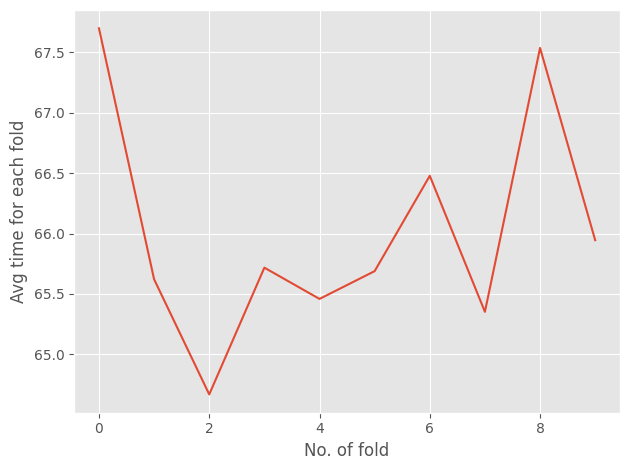

In [13]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [14]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [15]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

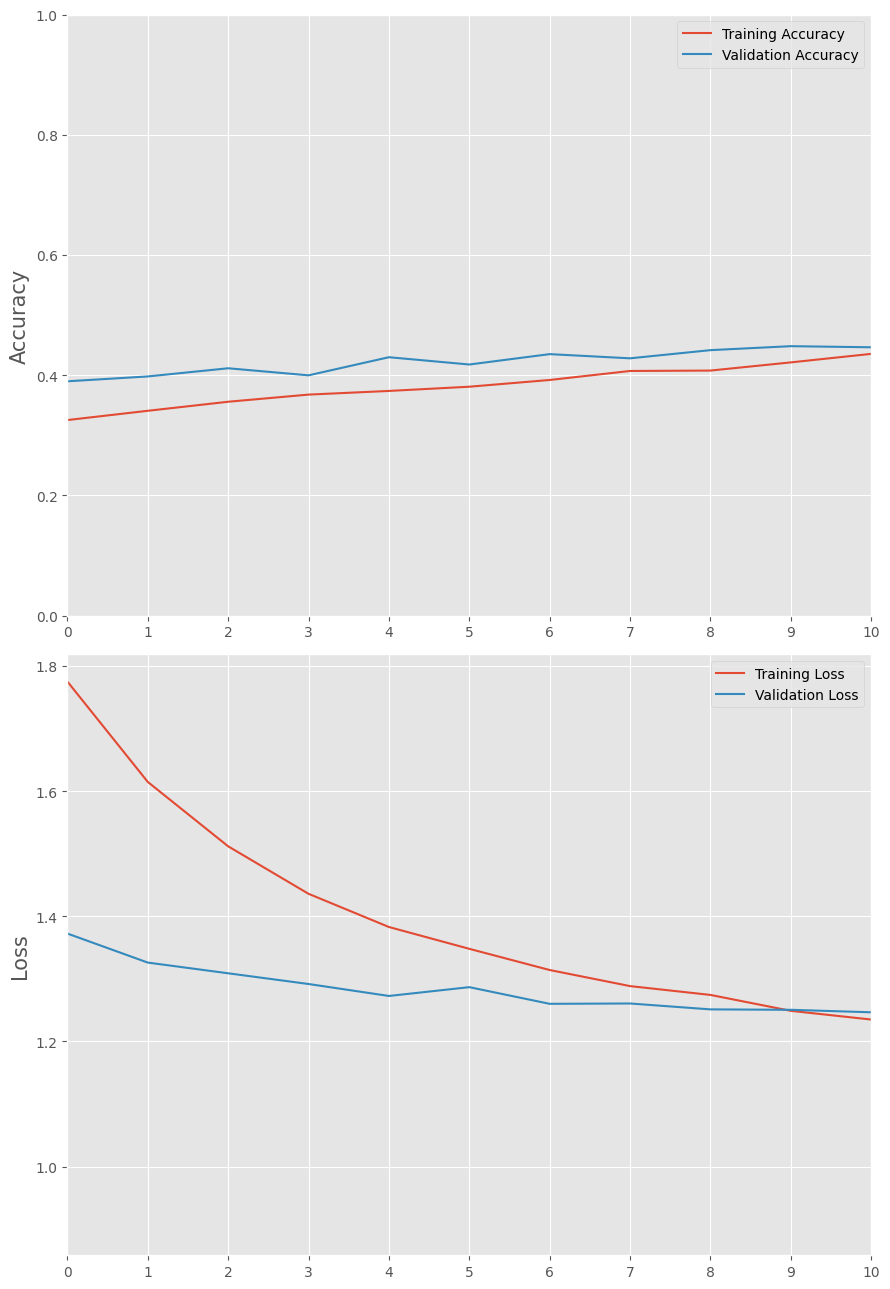

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [17]:
import gc
gc.collect()

3300

In [18]:
np.array(scores_birnn).shape

(10, 302, 4)

In [19]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [20]:
y_pred_birnn.shape

(10, 302)

In [21]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [22]:
acc_scores_birnn

[0.5562913907284768,
 0.5298013245033113,
 0.5099337748344371,
 0.4867549668874172,
 0.5496688741721855,
 0.5066225165562914,
 0.5596026490066225,
 0.4470198675496689,
 0.5562913907284768,
 0.44370860927152317]

In [23]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [24]:
acc_birnn = np.mean(acc_scores_birnn)

In [25]:
acc_birnn

0.5145695364238411

In [26]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [27]:
import gc
gc.collect()

0

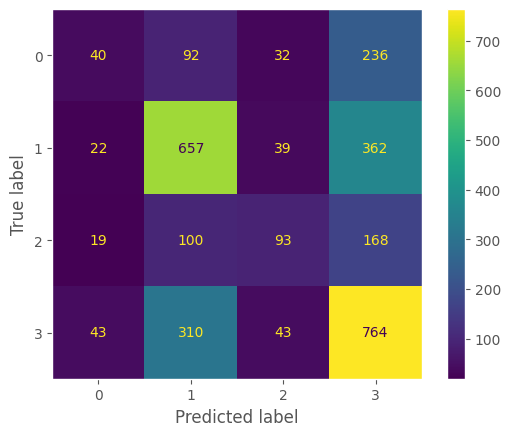

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [29]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.32      0.10      0.15       400
           1       0.57      0.61      0.59      1080
           2       0.45      0.24      0.32       380
           3       0.50      0.66      0.57      1160

    accuracy                           0.51      3020
   macro avg       0.46      0.40      0.41      3020
weighted avg       0.49      0.51      0.49      3020



# MobileNetV2

In [30]:
import gc
gc.collect()

5

In [8]:
X.shape

(3020, 259, 12)

In [9]:
X = np.concatenate([X,X,X,X,X,X,X,X,X], axis= -1)

In [10]:
X = np.expand_dims(X, axis=-1)

In [11]:
X_n = np.concatenate([X,X,X], axis= -1)

In [12]:
X_n.shape

(3020, 259, 108, 3)

In [13]:
y.shape

(3020,)

In [37]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [39]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [40]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [41]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 24ms/step - loss: 1.5828 - accuracy: 0.3729 - val_loss: 1.2262 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2311 - accuracy: 0.4182 - val_loss: 1.2183 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2191 - accuracy: 0.4317 - val_loss: 1.2139 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2033 - accuracy: 0.4542 - val_loss: 1.1961 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1875 - accuracy: 0.4628 - val_loss: 1.1951 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1842 - accuracy: 0.4677 - val_loss: 1.2057 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 1.42 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.0339 - accuracy: 0.5552 - val_loss: 1.1716 - val_accuracy: 0.4596 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0316 - accuracy: 0.5527 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0334 - accuracy: 0.5523 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0315 - accuracy: 0.5425 - val_loss: 1.1717 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0346 - accuracy: 0.5572 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 1.6000e-06
Epoch 34/100
74/77 [===========================>..] - ETA: 0s - loss: 1.0269 - accuracy: 0.5617
Epoch 34: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Ti

Epoch 85/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0328 - accuracy: 0.5613 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 3.2768e-14
Epoch 86/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0356 - accuracy: 0.5585 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 3.2768e-14
Epoch 87/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0329 - accuracy: 0.5470 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 3.2768e-14
Epoch 88/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0328 - accuracy: 0.5523 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 3.2768e-14
Epoch 89/100
77/77 [==============================] - ETA: 0s - loss: 1.0307 - accuracy: 0.5507
Epoch 89: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 89: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.0307 - accuracy: 0.5507 - val_loss: 1.1718 - val_accuracy: 0.4596 - lr: 3.2768e-14
Ep

Epoch 14/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1237 - accuracy: 0.4804 - val_loss: 1.1455 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1195 - accuracy: 0.4820 - val_loss: 1.1806 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1141 - accuracy: 0.4849 - val_loss: 1.1678 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 1s 18ms/step - loss: 1.1117 - accuracy: 0.4849 - val_loss: 1.1915 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 18/100
76/77 [============================>.] - ETA: 0s - loss: 1.0830 - accuracy: 0.5160
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 18: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 1.0843 - accuracy: 0.5159 - val_loss: 1.1392 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 19/100
77/77 [=

Epoch 42/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9991 - accuracy: 0.5613 - val_loss: 1.1351 - val_accuracy: 0.4669 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9991 - accuracy: 0.5597 - val_loss: 1.1351 - val_accuracy: 0.4669 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.5523
Epoch 44: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 44: 1.33 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.0019 - accuracy: 0.5523 - val_loss: 1.1351 - val_accuracy: 0.4669 - lr: 3.2000e-07
Epoch 45/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0011 - accuracy: 0.5597 - val_loss: 1.1351 - val_accuracy: 0.4669 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9980 - accuracy: 0.5642 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 6.4000e-08
Ep

Epoch 70/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0005 - accuracy: 0.5536 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 2.0480e-11
Epoch 71/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9957 - accuracy: 0.5544 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 2.0480e-11
Epoch 72/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9949 - accuracy: 0.5675 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 2.0480e-11
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0060 - accuracy: 0.5626 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 2.0480e-11
Epoch 74/100
74/77 [===========================>..] - ETA: 0s - loss: 0.9933 - accuracy: 0.5545
Epoch 74: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 74: 1.30 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.9966 - accuracy: 0.5523 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 2.0480e-11
Ep

Epoch 98/100
77/77 [==============================] - 1s 18ms/step - loss: 0.9991 - accuracy: 0.5568 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 6.5536e-15
Epoch 99/100
75/77 [============================>.] - ETA: 0s - loss: 0.9996 - accuracy: 0.5408
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 99: 1.36 seconds
77/77 [==============================] - 1s 18ms/step - loss: 0.9984 - accuracy: 0.5413 - val_loss: 1.1352 - val_accuracy: 0.4669 - lr: 6.5536e-15
Epoch 100/100
10/10 [==============================] - 0s 16ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 3s 24ms/step - loss: 1.4896 - accuracy: 0.3904 - val_loss: 1.2552 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 18ms/step - loss: 1.2425 - accuracy: 0.4289 - val_loss: 1.2344 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 18ms/step - loss: 1.21

77/77 [==============================] - 1s 18ms/step - loss: 1.0462 - accuracy: 0.5515 - val_loss: 1.1647 - val_accuracy: 0.5257 - lr: 6.4000e-08
Epoch 55/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0414 - accuracy: 0.5511 - val_loss: 1.1647 - val_accuracy: 0.5257 - lr: 6.4000e-08
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0364 - accuracy: 0.5544 - val_loss: 1.1647 - val_accuracy: 0.5221 - lr: 6.4000e-08
Epoch 57/100
77/77 [==============================] - 1s 18ms/step - loss: 1.0478 - accuracy: 0.5437 - val_loss: 1.1647 - val_accuracy: 0.5257 - lr: 6.4000e-08
Epoch 58/100
75/77 [============================>.] - ETA: 0s - loss: 1.0444 - accuracy: 0.5454
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 58: 1.32 seconds
77/77 [==============================] - 1s 17ms/step - loss: 1.0432 - accuracy: 0.5462 - val_loss: 1.1647 - val_accuracy: 0.5221 - lr: 6.4000e-08
Epoch 59/100
7

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [64]:
import gc
gc.collect()

517

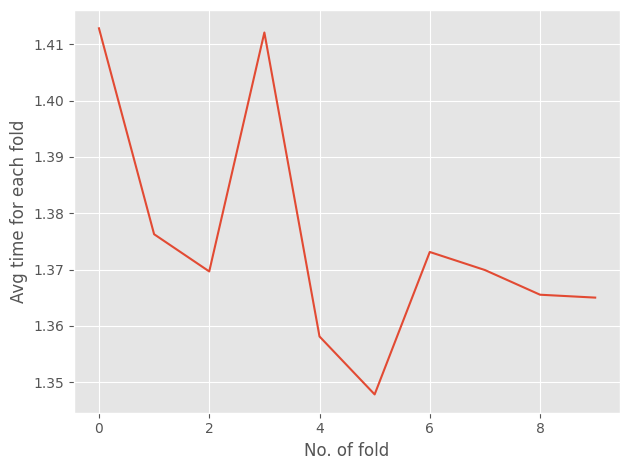

In [65]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [66]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [67]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [68]:
train_acc_mnv2_n

0     0.382298
1     0.430131
2     0.433197
3     0.449223
4     0.446157
        ...   
95    0.541701
96    0.542764
97    0.540433
98    0.540270
99    0.541333
Name: 0, Length: 100, dtype: float64

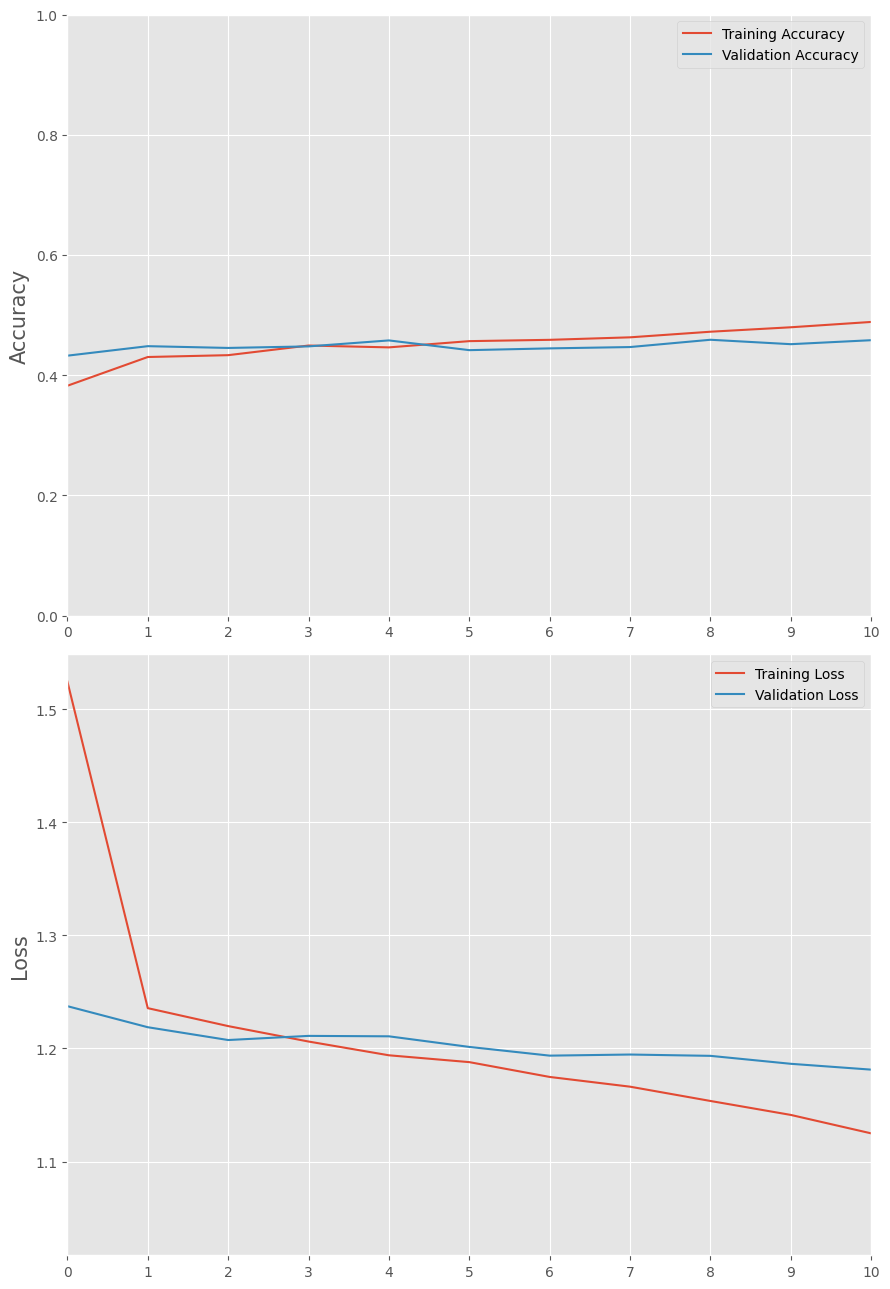

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [70]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [71]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [72]:
y_pred_mnv2.shape

(10, 302)

In [73]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [74]:
import gc
gc.collect()

23642

In [75]:
acc_scores_mnv2

[0.5,
 0.4503311258278146,
 0.4304635761589404,
 0.4900662251655629,
 0.4503311258278146,
 0.4470198675496689,
 0.48013245033112584,
 0.45364238410596025,
 0.4602649006622517,
 0.4900662251655629]

In [76]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [77]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

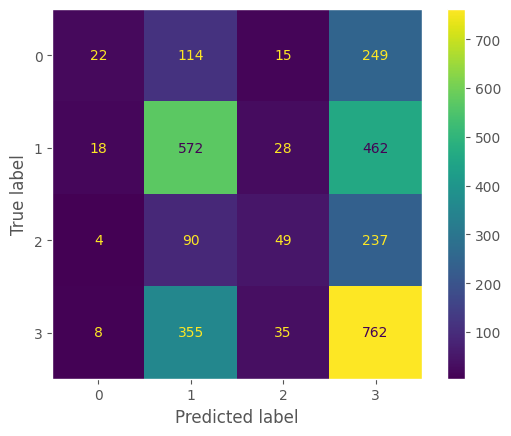

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [79]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.42      0.06      0.10       400
           1       0.51      0.53      0.52      1080
           2       0.39      0.13      0.19       380
           3       0.45      0.66      0.53      1160

    accuracy                           0.47      3020
   macro avg       0.44      0.34      0.33      3020
weighted avg       0.46      0.47      0.43      3020



# XceptionV3

In [58]:
import gc
gc.collect()

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [60]:
import gc
gc.collect()

In [61]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [62]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

In [63]:
np.array(y_test_all).shape

In [ ]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [ ]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [ ]:
import gc
gc.collect()

In [ ]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [ ]:
train_acc_xv3_n

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [ ]:
np.array(scores_xv3).shape

In [ ]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [ ]:
y_pred_xv3.shape

In [ ]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [ ]:
import gc
gc.collect()

In [ ]:
acc_scores_xv3

In [ ]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

# EfficientNetV2L

In [14]:
import gc
gc.collect()

0

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [16]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 30s 215ms/step - loss: 1.4171 - accuracy: 0.2114 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4112 - accuracy: 0.2032 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4175 - accuracy: 0.2159 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4198 - accuracy: 0.2159 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4150 - accuracy: 0.2191 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4182 - accuracy: 0.2105 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4185 - accuracy: 0.2061
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.88 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4185 - accuracy: 0.2061 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4195 - accuracy: 0.1999 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4183 - accuracy: 0.2089 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 177ms/step - loss: 1.4136 - accuracy: 0.2253 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4174 - accuracy: 0.2105 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4144 - accuracy: 0.2114
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.79 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.4144 - accuracy: 0.2114 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4155 - accuracy: 0.2089 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4184 - accuracy: 0.2044 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4159 - accuracy: 0.2069 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4139 - accuracy: 0.2085 - val_loss: 1.4098 - val_accuracy: 0.1838 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4817 - accuracy: 0.2739 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4845 - accuracy: 0.2756 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4897 - accuracy: 0.2715
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.81 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.4897 - accuracy: 0.2715 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4834 - accuracy: 0.2805 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4846 - accuracy: 0.2780 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4859 - accuracy: 0.2788 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4831 - accuracy: 0.2845 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4746 - accuracy: 0.2931
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.91 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4746 - accuracy: 0.2931 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4902 - accuracy: 0.2772 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4815 - accuracy: 0.2747 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4774 - accuracy: 0.2780 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4822 - accuracy: 0.2931 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4818 - accuracy: 0.2792
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.67 seconds
77/77 [==============================] - 14s 178ms/step - loss: 1.4818 - accuracy: 0.2792 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4819 - accuracy: 0.2821 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4815 - accuracy: 0.2731 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4814 - accuracy: 0.2805 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4779 - accuracy: 0.2796 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4849 - accuracy: 0.2719
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.81 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.4849 - accuracy: 0.2719 - val_loss: 1.4511 - val_accuracy: 0.3676 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 148ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 27s 214ms/step - loss: 1.3688 - accuracy: 0.3283 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 179ms/

Epoch 25/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3679 - accuracy: 0.3385 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3687 - accuracy: 0.3426 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3680 - accuracy: 0.3291 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3686 - accuracy: 0.3500 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3681 - accuracy: 0.3299
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.76 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.3681 - accuracy: 0.3299 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3741 - accuracy: 0.3213 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3688 - accuracy: 0.3385 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3667 - accuracy: 0.3434 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3701 - accuracy: 0.3258 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3708 - accuracy: 0.3258
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.83 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.3708 - accuracy: 0.3258 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3663 - accuracy: 0.3459 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3690 - accuracy: 0.3365 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3691 - accuracy: 0.3365 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3686 - accuracy: 0.3397 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3699 - accuracy: 0.3442
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.81 seconds
77/77 [==============================] - 14s 180ms/step - loss: 1.3699 - accuracy: 0.3442 - val_loss: 1.3552 - val_accuracy: 0.3529 - lr: 2.

Epoch 9/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4479 - accuracy: 0.1844 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4532 - accuracy: 0.1791 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4436 - accuracy: 0.1807 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4473 - accuracy: 0.1836 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4534 - accuracy: 0.1778 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4501 - accuracy: 0.1750 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4456 - accuracy: 0.1938 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4491 - accuracy: 0.1770 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4548 - accuracy: 0.1688 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4487 - accuracy: 0.1795 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4506 - accuracy: 0.1758 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4422 - accuracy: 0.1958 - val_loss: 1.4284 - val_accuracy: 0.2022 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 83/100
77/77 [==============================] - 14s 179ms/step - loss: 4567873713019085390970003575013376.0000 - accuracy: 0.3344 - val_loss: 2615755542579635309749237943631872.0000 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 179ms/step - loss: 4597710543845941626355622267060224.0000 - accuracy: 0.3344 - val_loss: 2615755542579635309749237943631872.0000 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - 14s 180ms/step - loss: 4716482844005118508760406392045568.0000 - accuracy: 0.3295 - val_loss: 2615755542579635309749237943631872.0000 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 180ms/step - loss: 4629095109206914408429933589168128.0000 - accuracy: 0.3348 - val_loss: 2615755542579635309749237943631872.0000 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 87/100
77/77 [==============================] - 14s 182ms/step - loss: 47946900154

Epoch 5/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4713 - accuracy: 0.2212 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4695 - accuracy: 0.2302 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4687 - accuracy: 0.2416 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4703 - accuracy: 0.2302
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.76 seconds
77/77 [==============================] - 14s 179ms/step - loss: 1.4703 - accuracy: 0.2302 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4699 - accuracy: 0.2343 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4679 - accuracy: 0.2298 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4708 - accuracy: 0.2281 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4688 - accuracy: 0.2224 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.2412
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.90 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4673 - accuracy: 0.2412 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4681 - accuracy: 0.2249 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 3.

Epoch 61/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4705 - accuracy: 0.2265 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4692 - accuracy: 0.2371 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4680 - accuracy: 0.2302 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4711 - accuracy: 0.2322
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.94 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4711 - accuracy: 0.2322 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4734 - accuracy: 0.2285 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4638 - accuracy: 0.2334 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 14s 178ms/step - loss: 1.4674 - accuracy: 0.2437 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 14s 180ms/step - loss: 1.4631 - accuracy: 0.2388 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4663 - accuracy: 0.2298
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.92 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.4663 - accuracy: 0.2298 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 14s 179ms/step - loss: 1.4696 - accuracy: 0.2232 - val_loss: 1.4527 - val_accuracy: 0.2500 - lr: 8.

Epoch 17/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3791 - accuracy: 0.2617 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3752 - accuracy: 0.2702 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3819 - accuracy: 0.2600 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3776 - accuracy: 0.2637 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3741 - accuracy: 0.2751 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3802 - accuracy: 0.2653
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3765 - accuracy: 0.2678 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3733 - accuracy: 0.2760 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3773 - accuracy: 0.2686 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3764 - accuracy: 0.2576 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3731 - accuracy: 0.2715 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3776 - accuracy: 0.2727
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3772 - accuracy: 0.2547 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3735 - accuracy: 0.2678 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3728 - accuracy: 0.2813 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3820 - accuracy: 0.2604 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3733 - accuracy: 0.2580 - val_loss: 1.3493 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3723 - accuracy: 0.2723
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 150ms/step
Training on fold 7/10...
Epoch 1/100
77/77 [==============================] - 35s 216ms/step - loss: 1.3863 - accuracy: 0.3078 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3876 - accuracy: 0.3083 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3887 - accuracy: 0.3254 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3913 - accuracy: 0.3070 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 177ms/step - loss: 1.3929 - accuracy: 0.3083 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 14s 178ms/step - loss: 1.3877 - accuracy: 0.3168 - val_loss: 1.3970 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.3916 - accuracy: 0.3054
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.91 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3916 - accuracy: 0.3054 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3864 - accuracy: 0.3152 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3803 - accuracy: 0.3234 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3895 - accuracy: 0.3091 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3877 - accuracy: 0.3136 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3891 - accuracy: 0.3189
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.91 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3891 - accuracy: 0.3189 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3841 - accuracy: 0.3123 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3828 - accuracy: 0.3107 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3855 - accuracy: 0.3217 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3844 - accuracy: 0.3205 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3862 - accuracy: 0.3087
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.93 seconds
77/77 [==============================] - 14s 181ms/step - loss: 1.3862 - accuracy: 0.3087 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3883 - accuracy: 0.3148 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3845 - accuracy: 0.3205 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 14s 179ms/step - loss: 1.3864 - accuracy: 0.3107 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 14s 180ms/step - loss: 1.3892 - accuracy: 0.3074 - val_loss: 1.3970 - val_accuracy: 0.3125 - lr: 4.

Epoch 13/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3514 - accuracy: 0.3336 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3525 - accuracy: 0.3369 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3515 - accuracy: 0.3369
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 14.05 seconds
77/77 [==============================] - 14s 183ms/step - loss: 1.3515 - accuracy: 0.3369 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 14s 184ms/step - loss: 1.3481 - accuracy: 0.3348 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3500 - accuracy: 0.3401 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 184ms/step - loss: 1.3497 - accuracy: 0.3389 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 184ms/step - loss: 1.3521 - accuracy: 0.3357 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3487 - accuracy: 0.3442
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 14.09 seconds
77/77 [==============================] - 14s 183ms/step - loss: 1.3487 - accuracy: 0.3442 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3519 - accuracy: 0.3426 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3470 - accuracy: 0.3504 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3505 - accuracy: 0.3291 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 181ms/step - loss: 1.3466 - accuracy: 0.3512 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3473 - accuracy: 0.3524
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.96 seconds
77/77 [==============================] - 14s 182ms/step - loss: 1.3473 - accuracy: 0.3524 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3535 - accuracy: 0.3287 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 182ms/step - loss: 1.3489 - accuracy: 0.3406 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 1

Epoch 97/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3550 - accuracy: 0.3287 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 183ms/step - loss: 1.3550 - accuracy: 0.3250 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3550 - accuracy: 0.3222
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 14.04 seconds
77/77 [==============================] - 14s 183ms/step - loss: 1.3550 - accuracy: 0.3222 - val_loss: 1.3466 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 146ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 30s 253ms/step - loss: 1.4334 - accuracy: 0.1872 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 181ms/

Epoch 25/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4338 - accuracy: 0.1827 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4234 - accuracy: 0.1958 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4299 - accuracy: 0.1905 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4316 - accuracy: 0.1881 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4287 - accuracy: 0.1856
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 14.06 seconds
77/77 [==============================] - 14s 183ms/step - loss: 1.4287 - accuracy: 0.1856 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 8

Epoch 53/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4319 - accuracy: 0.1868 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4301 - accuracy: 0.1934 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4351 - accuracy: 0.1852 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4294 - accuracy: 0.1909 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4321 - accuracy: 0.1917
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 14.20 seconds
77/77 [==============================] - 14s 185ms/step - loss: 1.4321 - accuracy: 0.1917 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4264 - accuracy: 0.1877 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4283 - accuracy: 0.1991 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4316 - accuracy: 0.1962 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4303 - accuracy: 0.1860 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4284 - accuracy: 0.1995
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 14.12 seconds
77/77 [==============================] - 14s 183ms/step - loss: 1.4284 - accuracy: 0.1995 - val_loss: 1.4215 - val_accuracy: 0.1765 - lr: 2.

Epoch 9/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4057 - accuracy: 0.2179 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4043 - accuracy: 0.2261 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 181ms/step - loss: 1.4076 - accuracy: 0.2298 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4048 - accuracy: 0.2269 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4079 - accuracy: 0.2343 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4049 - accuracy: 0.2249 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4132 - accuracy: 0.2228 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4114 - accuracy: 0.2097 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4078 - accuracy: 0.2155 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4055 - accuracy: 0.2294 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4060 - accuracy: 0.2208 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4107 - accuracy: 0.2220 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4057 - accuracy: 0.2163 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4128 - accuracy: 0.2081 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 14s 185ms/step - loss: 1.4085 - accuracy: 0.2236 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4118 - accuracy: 0.2167 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4102 - accuracy: 0.2244 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4017 - accuracy: 0.2326 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4081 - accuracy: 0.2142 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 14s 185ms/step - loss: 1.4046 - accuracy: 0.2244 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 14s 184ms/step - loss: 1.4104 - accuracy: 0.2195 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 14s 182ms/step - loss: 1.4103 - accuracy: 0.2257 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 14s 183ms/step - loss: 1.4115 - accuracy: 0.2253 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 14s 185ms/step - loss: 1.4095 - accuracy: 0.2118 - val_loss: 1.4005 - val_accuracy: 0.2059 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

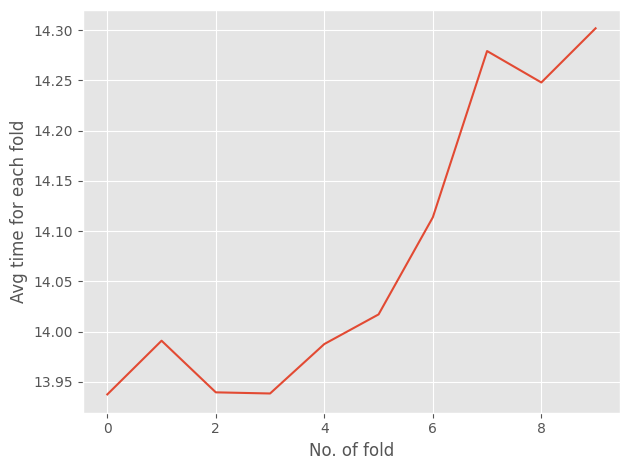

In [18]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [19]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [20]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [21]:
train_acc_env2l_n

0     0.257563
1     0.254906
2     0.260180
3     0.256419
4     0.256460
        ...   
95    0.272200
96    0.271750
97    0.266517
98    0.269338
99    0.266926
Name: 0, Length: 100, dtype: float64

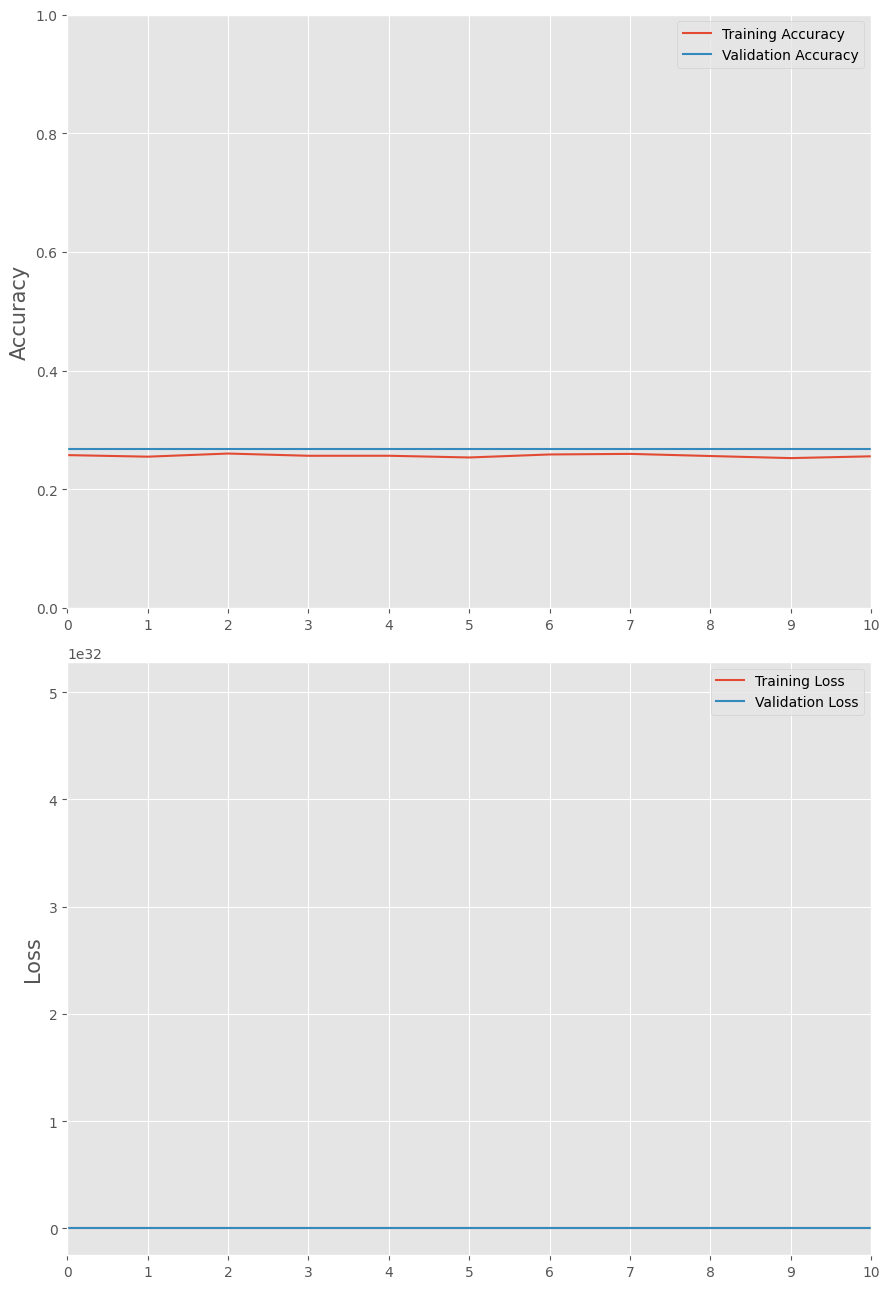

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [23]:
np.array(scores_env2l).shape

(10, 302, 4)

In [24]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [25]:
y_pred_env2l.shape

(10, 302)

In [26]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [27]:
import gc
gc.collect()

3497

In [28]:
acc_scores_env2l

[0.18874172185430463,
 0.3344370860927152,
 0.3576158940397351,
 0.3973509933774834,
 0.25496688741721857,
 0.2682119205298013,
 0.31456953642384106,
 0.3741721854304636,
 0.18211920529801323,
 0.2251655629139073]

In [29]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [30]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

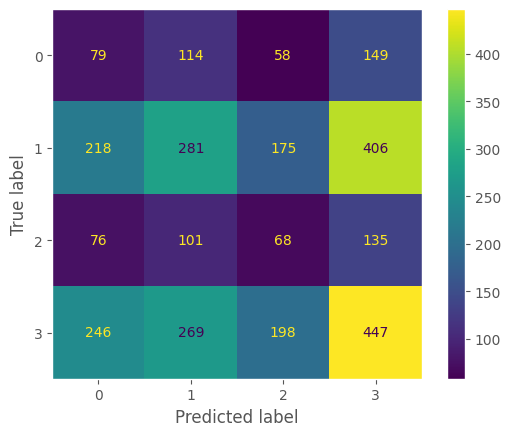

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [32]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.20      0.16       400
           1       0.37      0.26      0.30      1080
           2       0.14      0.18      0.15       380
           3       0.39      0.39      0.39      1160

    accuracy                           0.29      3020
   macro avg       0.26      0.26      0.25      3020
weighted avg       0.32      0.29      0.30      3020



# NasNetLarge

In [33]:
import gc
gc.collect()

15

In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [35]:
import gc
gc.collect()

5

In [36]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [37]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 23s 203ms/step - loss: 1.9673 - accuracy: 0.3434 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 169ms/step - loss: 1.9870 - accuracy: 0.3377 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 170ms/step - loss: 1.9821 - accuracy: 0.3312 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 170ms/step - loss: 1.9701 - accuracy: 0.3438 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 171ms/step - loss: 1.9735 - accuracy: 0.3340 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 170ms/step - loss: 1.9337 - accuracy: 0.3385 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.9468 - accuracy: 0.3438
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.93 seconds
77/77 [==============================] - 13s 168ms/step - loss: 1.9468 - accuracy: 0.3438 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 169ms/step - loss: 1.9599 - accuracy: 0.3340 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 170ms/step - loss: 1.9523 - accuracy: 0.3410 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 170ms/step - loss: 1.9719 - accuracy: 0.3332 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 168ms/step - loss: 2.0005 - accuracy: 0.3279 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.9718 - accuracy: 0.3234
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.16 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.9718 - accuracy: 0.3234 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 172ms/step - loss: 1.9741 - accuracy: 0.3312 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 172ms/step - loss: 1.9688 - accuracy: 0.3279 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 172ms/step - loss: 1.9252 - accuracy: 0.3455 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 172ms/step - loss: 1.9303 - accuracy: 0.3434 - val_loss: 1.7422 - val_accuracy: 0.3603 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0443 - accuracy: 0.2408 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0295 - accuracy: 0.2445 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.0423 - accuracy: 0.2322
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.30 seconds
77/77 [==============================] - 13s 173ms/step - loss: 2.0423 - accuracy: 0.2322 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0443 - accuracy: 0.2298 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0271 - accuracy: 0.2527 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0487 - accuracy: 0.2412 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0479 - accuracy: 0.2310 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 2.0446 - accuracy: 0.2433
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.25 seconds
77/77 [==============================] - 13s 172ms/step - loss: 2.0446 - accuracy: 0.2433 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0531 - accuracy: 0.2351 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0894 - accuracy: 0.2310 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 174ms/step - loss: 2.0612 - accuracy: 0.2351 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0473 - accuracy: 0.2392 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 2.0269 - accuracy: 0.2388
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.28 seconds
77/77 [==============================] - 13s 173ms/step - loss: 2.0269 - accuracy: 0.2388 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0167 - accuracy: 0.2347 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 171ms/step - loss: 2.0427 - accuracy: 0.2200 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0544 - accuracy: 0.2379 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0544 - accuracy: 0.2351 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 2.0413 - accuracy: 0.2469
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.21 seconds
77/77 [==============================] - 13s 172ms/step - loss: 2.0413 - accuracy: 0.2469 - val_loss: 1.8962 - val_accuracy: 0.2243 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 147ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 23s 204ms/step - loss: 2.7355 - accuracy: 0.1615 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 169ms/

Epoch 25/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7766 - accuracy: 0.1672 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 171ms/step - loss: 2.7387 - accuracy: 0.1680 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7555 - accuracy: 0.1742 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7582 - accuracy: 0.1684 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.7336 - accuracy: 0.1766
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.28 seconds
77/77 [==============================] - 13s 173ms/step - loss: 2.7336 - accuracy: 0.1766 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 171ms/step - loss: 2.7340 - accuracy: 0.1635 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7371 - accuracy: 0.1693 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7469 - accuracy: 0.1684 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7657 - accuracy: 0.1615 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 2.7131 - accuracy: 0.1705
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 2.7131 - accuracy: 0.1705 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7483 - accuracy: 0.1697 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7535 - accuracy: 0.1717 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7144 - accuracy: 0.1746 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7237 - accuracy: 0.1738 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 2.7207 - accuracy: 0.1623
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.25 seconds
77/77 [==============================] - 13s 172ms/step - loss: 2.7207 - accuracy: 0.1623 - val_loss: 2.6128 - val_accuracy: 0.1360 - lr: 2.

Epoch 9/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0717 - accuracy: 0.2024 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1035 - accuracy: 0.2020 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0313 - accuracy: 0.2040 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0849 - accuracy: 0.1999 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0849 - accuracy: 0.1979 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0691 - accuracy: 0.1999 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0981 - accuracy: 0.1991 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 174ms/step - loss: 2.0720 - accuracy: 0.1881 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0656 - accuracy: 0.1958 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0831 - accuracy: 0.1909 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 171ms/step - loss: 2.0886 - accuracy: 0.1881 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0712 - accuracy: 0.1938 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0258 - accuracy: 0.2020 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0937 - accuracy: 0.1877 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0633 - accuracy: 0.1983 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 171ms/step - loss: 2.0807 - accuracy: 0.1897 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0815 - accuracy: 0.2024 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0597 - accuracy: 0.2065 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 13s 174ms/step - loss: 2.0677 - accuracy: 0.2040 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0557 - accuracy: 0.1999 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 171ms/step - loss: 2.0649 - accuracy: 0.2114 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 171ms/step - loss: 2.1278 - accuracy: 0.1729 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 173ms/step - loss: 2.0912 - accuracy: 0.1966 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 172ms/step - loss: 2.0807 - accuracy: 0.1934 - val_loss: 1.7811 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 172ms/step - loss: 2.7305 - accuracy: 0.1693 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 2.7590 - accuracy: 0.1668
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.35 seconds
77/77 [==============================] - 13s 174ms/step - loss: 2.7590 - accuracy: 0.1668 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7046 - accuracy: 0.1733 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7282 - accuracy: 0.1807 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7522 - accuracy: 0.1705 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7344 - accuracy: 0.1672 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 2.7298 - accuracy: 0.1729
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 13.27 seconds
77/77 [==============================] - 13s 173ms/step - loss: 2.7298 - accuracy: 0.1729 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7361 - accuracy: 0.1672 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7270 - accuracy: 0.1733 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7415 - accuracy: 0.1672 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 1

Epoch 77/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7303 - accuracy: 0.1725 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 2.7268 - accuracy: 0.1627
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 13.25 seconds
77/77 [==============================] - 13s 172ms/step - loss: 2.7268 - accuracy: 0.1627 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 172ms/step - loss: 2.7226 - accuracy: 0.1754 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 173ms/step - loss: 2.7778 - accuracy: 0.1688 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 175ms/step - loss: 2.7957 - accuracy: 0.1660 - val_loss: 2.5469 - val_accuracy: 0.1324 - lr: 2

Epoch 5/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5153 - accuracy: 0.1697 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5206 - accuracy: 0.1639 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5666 - accuracy: 0.1590 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 2.5863 - accuracy: 0.1611
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.34 seconds
77/77 [==============================] - 13s 174ms/step - loss: 2.5863 - accuracy: 0.1611 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 171ms/step - loss: 2.5233 - accuracy: 0.1713 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 171ms/step - loss: 2.5209 - accuracy: 0.1639 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5503 - accuracy: 0.1578 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5631 - accuracy: 0.1627 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 2.5426 - accuracy: 0.1578
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.16 seconds
77/77 [==============================] - 13s 171ms/step - loss: 2.5426 - accuracy: 0.1578 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 171ms/step - loss: 2.5388 - accuracy: 0.1664 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 3.

Epoch 61/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5450 - accuracy: 0.1648 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 173ms/step - loss: 2.5027 - accuracy: 0.1750 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 171ms/step - loss: 2.5013 - accuracy: 0.1713 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 2.5258 - accuracy: 0.1680
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.16 seconds
77/77 [==============================] - 13s 171ms/step - loss: 2.5258 - accuracy: 0.1680 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5452 - accuracy: 0.1574 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 13s 173ms/step - loss: 2.5409 - accuracy: 0.1660 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 172ms/step - loss: 2.5325 - accuracy: 0.1660 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 171ms/step - loss: 2.5263 - accuracy: 0.1693 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 2.5147 - accuracy: 0.1684
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.18 seconds
77/77 [==============================] - 13s 171ms/step - loss: 2.5147 - accuracy: 0.1684 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 173ms/step - loss: 2.5643 - accuracy: 0.1684 - val_loss: 2.5168 - val_accuracy: 0.1250 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1350 - accuracy: 0.2596 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1440 - accuracy: 0.2567 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 174ms/step - loss: 2.1630 - accuracy: 0.2473 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1509 - accuracy: 0.2486 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1310 - accuracy: 0.2576 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 2.1480 - accuracy: 0.2510
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 172ms/step - loss: 2.1742 - accuracy: 0.2457 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1703 - accuracy: 0.2531 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1518 - accuracy: 0.2527 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 172ms/step - loss: 2.1770 - accuracy: 0.2621 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 172ms/step - loss: 2.1165 - accuracy: 0.2674 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 2.2020 - accuracy: 0.2449
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1480 - accuracy: 0.2522 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 171ms/step - loss: 2.1751 - accuracy: 0.2449 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 173ms/step - loss: 2.1442 - accuracy: 0.2608 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 172ms/step - loss: 2.1341 - accuracy: 0.2645 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 172ms/step - loss: 2.1474 - accuracy: 0.2478 - val_loss: 1.9228 - val_accuracy: 0.2537 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 2.1520 - accuracy: 0.2539
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 5s 146ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 23s 205ms/step - loss: 1.6847 - accuracy: 0.3590 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 173ms/step - loss: 1.7029 - accuracy: 0.3569 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 169ms/step - loss: 1.6920 - accuracy: 0.3512 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 173ms/step - loss: 1.6749 - accuracy: 0.3635 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 169ms/step - loss: 1.6963 - accuracy: 0.3549 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 174ms/step - loss: 1.7168 - accuracy: 0.3581 - val_loss: 1.5171 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.6977 - accuracy: 0.3684
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.32 seconds
77/77 [==============================] - 13s 173ms/step - loss: 1.6977 - accuracy: 0.3684 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 14s 176ms/step - loss: 1.6976 - accuracy: 0.3545 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 172ms/step - loss: 1.6848 - accuracy: 0.3643 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 173ms/step - loss: 1.6897 - accuracy: 0.3500 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 171ms/step - loss: 1.6987 - accuracy: 0.3479 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.7004 - accuracy: 0.3528
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.32 seconds
77/77 [==============================] - 13s 173ms/step - loss: 1.7004 - accuracy: 0.3528 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 171ms/step - loss: 1.6729 - accuracy: 0.3594 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 171ms/step - loss: 1.6807 - accuracy: 0.3565 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 172ms/step - loss: 1.6667 - accuracy: 0.3508 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 174ms/step - loss: 1.6922 - accuracy: 0.3512 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.6681 - accuracy: 0.3630
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.18 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.6681 - accuracy: 0.3630 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 168ms/step - loss: 1.6802 - accuracy: 0.3512 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 170ms/step - loss: 1.7097 - accuracy: 0.3602 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 170ms/step - loss: 1.6925 - accuracy: 0.3561 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 169ms/step - loss: 1.6864 - accuracy: 0.3622 - val_loss: 1.5171 - val_accuracy: 0.3750 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 170ms/step - loss: 1.8291 - accuracy: 0.2911 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 170ms/step - loss: 1.8695 - accuracy: 0.2821 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.8661 - accuracy: 0.2756
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.05 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.8661 - accuracy: 0.2756 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 170ms/step - loss: 1.8584 - accuracy: 0.2854 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 170ms/step - loss: 1.8772 - accuracy: 0.2772 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 170ms/step - loss: 1.8562 - accuracy: 0.2800 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 169ms/step - loss: 1.8318 - accuracy: 0.2907 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.8580 - accuracy: 0.2939
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.08 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.8580 - accuracy: 0.2939 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 169ms/step - loss: 1.8418 - accuracy: 0.2878 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 169ms/step - loss: 1.8493 - accuracy: 0.2878 - val_loss: 1.6501 - val_accuracy: 0.2941 - lr: 6.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



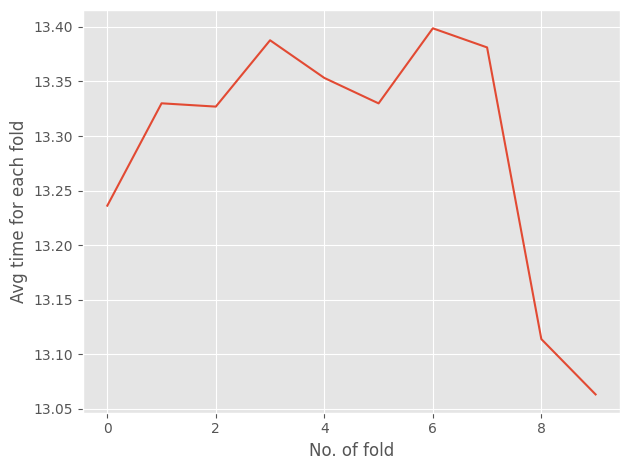

In [71]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [72]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [73]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

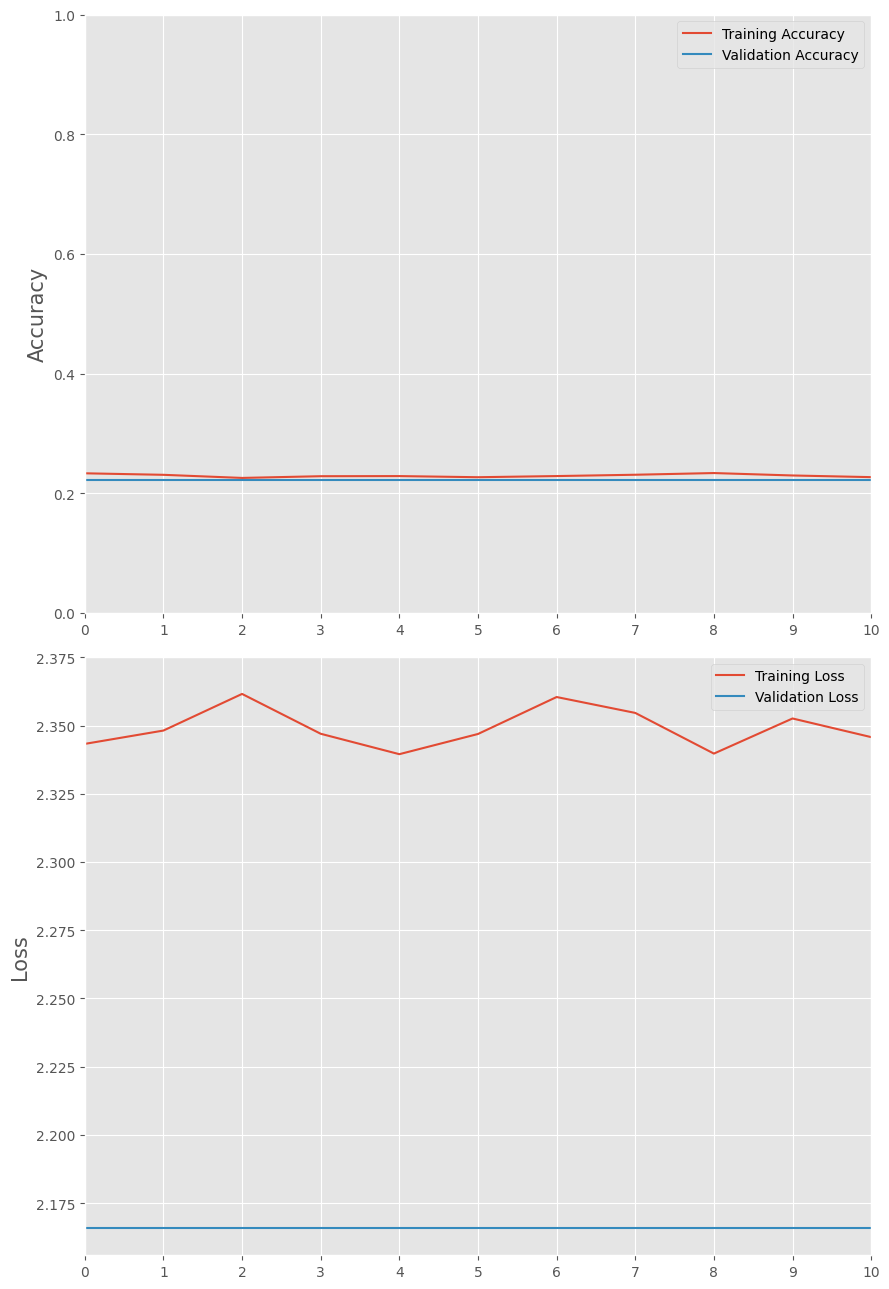

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [75]:
import gc
gc.collect()

29756

In [76]:
np.array(scores_nnl).shape

(10, 302, 4)

In [77]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [78]:
y_pred_nnl.shape

(10, 302)

In [79]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [80]:
acc_scores_nnl

[0.34105960264900664,
 0.2251655629139073,
 0.1357615894039735,
 0.19536423841059603,
 0.152317880794702,
 0.1291390728476821,
 0.20860927152317882,
 0.3708609271523179,
 0.26158940397350994,
 0.13245033112582782]

In [81]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [82]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

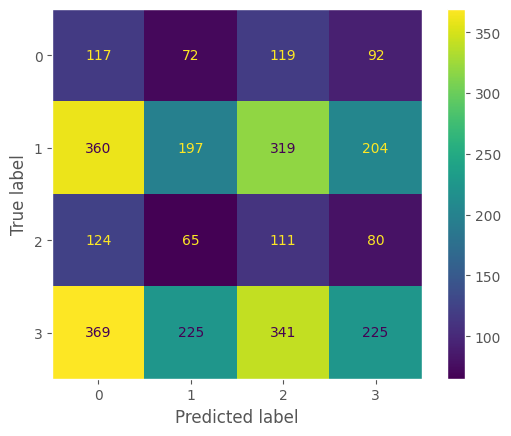

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [84]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.29      0.17       400
           1       0.35      0.18      0.24      1080
           2       0.12      0.29      0.17       380
           3       0.37      0.19      0.26      1160

    accuracy                           0.22      3020
   macro avg       0.24      0.24      0.21      3020
weighted avg       0.30      0.22      0.23      3020



# NasNetMobile

In [52]:
import gc
gc.collect()

In [53]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [54]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [55]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

In [85]:
import gc
gc.collect()

6416

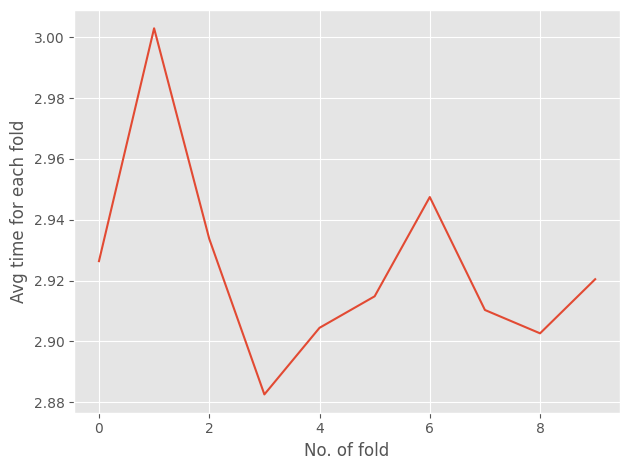

In [86]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [87]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [88]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

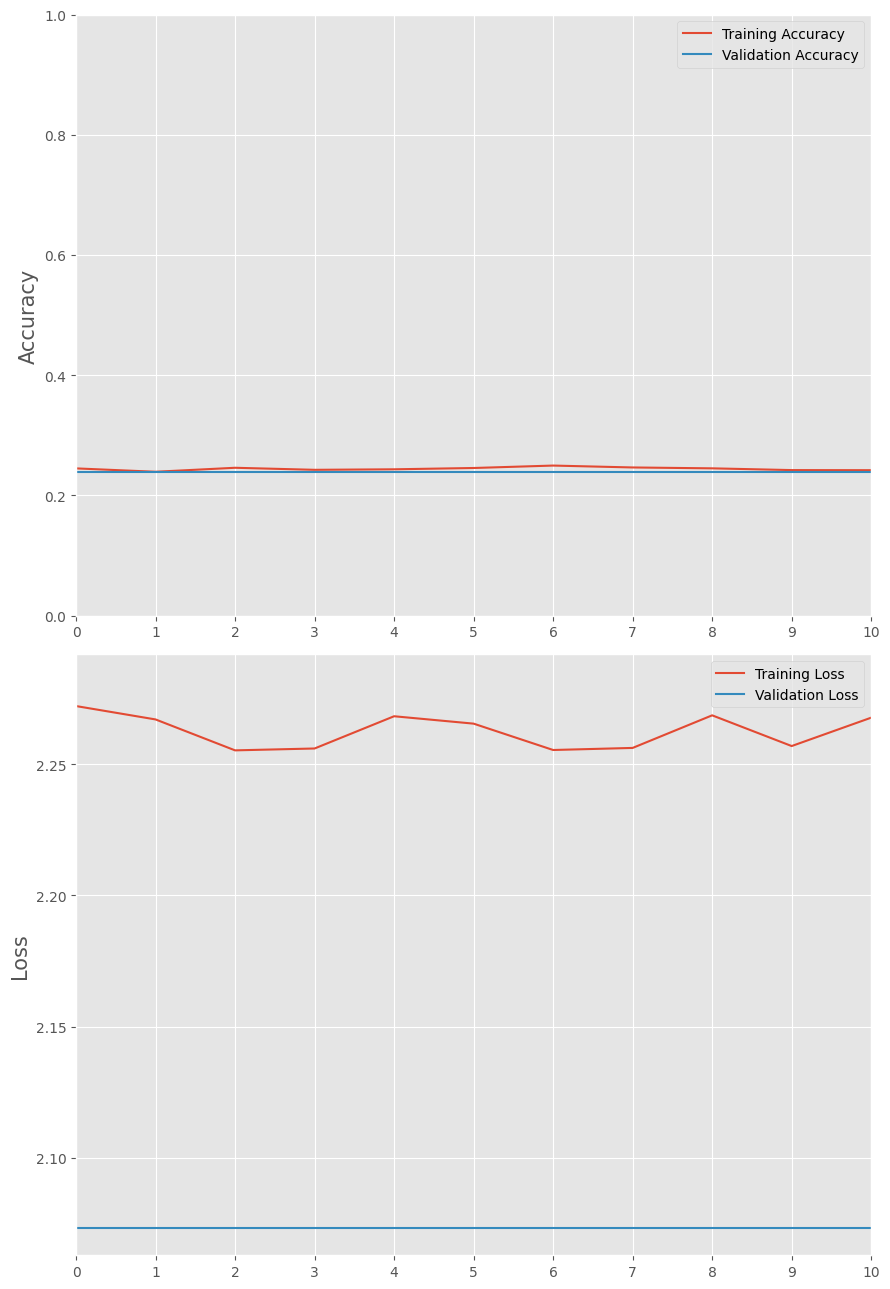

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [90]:
np.array(scores_nnb).shape

(10, 302, 4)

In [91]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [92]:
y_pred_nnb.shape

(10, 302)

In [93]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [94]:
import gc
gc.collect()

24166

In [95]:
acc_scores_nnb

[0.152317880794702,
 0.3708609271523179,
 0.17880794701986755,
 0.17218543046357615,
 0.3741721854304636,
 0.18543046357615894,
 0.15562913907284767,
 0.16887417218543047,
 0.3509933774834437,
 0.22847682119205298]

In [96]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [97]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

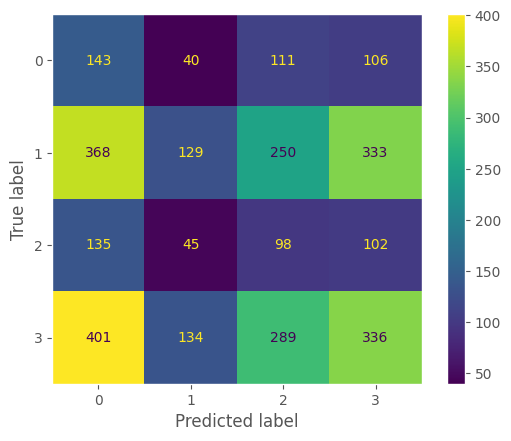

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [99]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.36      0.20       400
           1       0.37      0.12      0.18      1080
           2       0.13      0.26      0.17       380
           3       0.38      0.29      0.33      1160

    accuracy                           0.23      3020
   macro avg       0.26      0.26      0.22      3020
weighted avg       0.31      0.23      0.24      3020



# AlexNet

In [13]:
import gc
gc.collect()

0

In [100]:
X.shape

(3020, 259, 108, 1)

In [101]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [102]:
X_tl.shape

(3020, 259, 108, 3)

In [103]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [104]:
import gc
gc.collect()

6225

In [105]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [106]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [107]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 40ms/step - loss: 4.8537 - accuracy: 0.3806 - val_loss: 1.2869 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2717 - accuracy: 0.3913 - val_loss: 1.2761 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 27ms/step - loss: 1.2656 - accuracy: 0.3900 - val_loss: 1.2712 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2677 - accuracy: 0.3794 - val_loss: 1.2720 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2654 - accuracy: 0.3765 - val_loss: 1.2751 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 6/100
76/77 [============================>.] - ETA: 0s - loss: 1.2697 - accuracy: 0.3688
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 1.93

77/77 [==============================] - 2s 25ms/step - loss: 1.2640 - accuracy: 0.3823 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 29/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2645 - accuracy: 0.3892 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 30/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3863 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 31/100
75/77 [============================>.] - ETA: 0s - loss: 1.2635 - accuracy: 0.3775
Epoch 31: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 31: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3778 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 3.2000e-07
Epoch 32/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2633 - accuracy: 0.3888 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 6.4000e-08
Epoch 33/100
77

Epoch 56/100
75/77 [============================>.] - ETA: 0s - loss: 1.2649 - accuracy: 0.3842
Epoch 56: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 56: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2645 - accuracy: 0.3843 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 1.0240e-10
Epoch 57/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2633 - accuracy: 0.3823 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2659 - accuracy: 0.3769 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 59/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2627 - accuracy: 0.3859 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 2.0480e-11
Epoch 60/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2652 - accuracy: 0.3774 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 2.0480e-11
E

Epoch 84/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2632 - accuracy: 0.3818 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 6.5536e-15
Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2649 - accuracy: 0.3810 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 6.5536e-15
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 1.2645 - accuracy: 0.3783
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 86: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2633 - accuracy: 0.3790 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2642 - accuracy: 0.3774 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 1.3107e-15
Epoch 88/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2622 - accuracy: 0.3774 - val_loss: 1.2710 - val_accuracy: 0.3824 - lr: 1.3107e-15
E

Epoch 39/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2607 - accuracy: 0.3855 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 40/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2611 - accuracy: 0.3888 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 41/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2608 - accuracy: 0.3855 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 42/100
75/77 [============================>.] - ETA: 0s - loss: 1.2612 - accuracy: 0.3900
Epoch 42: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 42: 1.97 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2622 - accuracy: 0.3896 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 43/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3868 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 2.5600e-09
E

Epoch 67/100
75/77 [============================>.] - ETA: 0s - loss: 1.2607 - accuracy: 0.3938
Epoch 67: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 67: 1.96 seconds
77/77 [==============================] - 2s 26ms/step - loss: 1.2613 - accuracy: 0.3945 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 68/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2626 - accuracy: 0.3872 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 8.1920e-13
Epoch 69/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2613 - accuracy: 0.3892 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 8.1920e-13
Epoch 70/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2603 - accuracy: 0.3806 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 8.1920e-13
Epoch 71/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2602 - accuracy: 0.3876 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 8.1920e-13
Ep

Epoch 95/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2621 - accuracy: 0.3868 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 2.6214e-16
Epoch 96/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2593 - accuracy: 0.3896 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 2.6214e-16
Epoch 97/100
76/77 [============================>.] - ETA: 0s - loss: 1.2620 - accuracy: 0.3861
Epoch 97: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 97: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2626 - accuracy: 0.3863 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 2.6214e-16
Epoch 98/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2618 - accuracy: 0.3880 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 5.2429e-17
Epoch 99/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2622 - accuracy: 0.3855 - val_loss: 1.2917 - val_accuracy: 0.3529 - lr: 5.2429e-17
E

Epoch 23/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2630 - accuracy: 0.3863 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 24/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2611 - accuracy: 0.3818 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 25/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3835 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 26/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2623 - accuracy: 0.3876 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.6000e-06
Epoch 27/100
75/77 [============================>.] - ETA: 0s - loss: 1.2619 - accuracy: 0.3900
Epoch 27: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 27: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2625 - accuracy: 0.3900 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.6000e-06
Ep

Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2618 - accuracy: 0.3843 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 52/100
75/77 [============================>.] - ETA: 0s - loss: 1.2635 - accuracy: 0.3850
Epoch 52: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 52: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2634 - accuracy: 0.3859 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 53/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2615 - accuracy: 0.3823 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 54/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2615 - accuracy: 0.3818 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 55/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2626 - accuracy: 0.3900 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 1.0240e-10
E

Epoch 79/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2623 - accuracy: 0.3868 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 3.2768e-14
Epoch 80/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2630 - accuracy: 0.3863 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 3.2768e-14
Epoch 81/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2632 - accuracy: 0.3859 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 3.2768e-14
Epoch 82/100
76/77 [============================>.] - ETA: 0s - loss: 1.2618 - accuracy: 0.3836
Epoch 82: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 82: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2620 - accuracy: 0.3847 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 3.2768e-14
Epoch 83/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3851 - val_loss: 1.2828 - val_accuracy: 0.3713 - lr: 6.5536e-15
Ep

Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2641 - accuracy: 0.3802 - val_loss: 1.2900 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2629 - accuracy: 0.3872 - val_loss: 1.3027 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 9/100
76/77 [============================>.] - ETA: 0s - loss: 1.2652 - accuracy: 0.3631
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 9: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2654 - accuracy: 0.3622 - val_loss: 1.2901 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2620 - accuracy: 0.3786 - val_loss: 1.2899 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2624 - accuracy: 0.3790 - val_loss: 1.2888 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 12/100
77/77

Epoch 35/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2621 - accuracy: 0.3839 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 36/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2620 - accuracy: 0.3810 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 37/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2610 - accuracy: 0.3851 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 38/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2602 - accuracy: 0.3876 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 39/100
75/77 [============================>.] - ETA: 0s - loss: 1.2624 - accuracy: 0.3792
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 39: 1.96 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2617 - accuracy: 0.3786 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 6.4000e-08
E

Epoch 63/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2626 - accuracy: 0.3716 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 2.0480e-11
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.2624 - accuracy: 0.3795
Epoch 64: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 64: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2626 - accuracy: 0.3794 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 2.0480e-11
Epoch 65/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2621 - accuracy: 0.3872 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 66/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2613 - accuracy: 0.3802 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 67/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2613 - accuracy: 0.3855 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 4.0960e-12
Ep

Epoch 91/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2613 - accuracy: 0.3708 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 92/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2612 - accuracy: 0.3884 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 93/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2615 - accuracy: 0.3782 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 94/100
75/77 [============================>.] - ETA: 0s - loss: 1.2597 - accuracy: 0.3800
Epoch 94: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 94: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2618 - accuracy: 0.3802 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 95/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2618 - accuracy: 0.3802 - val_loss: 1.2896 - val_accuracy: 0.4044 - lr: 2.6214e-16
E

Epoch 19/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2647 - accuracy: 0.3790 - val_loss: 1.2590 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 20/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2662 - accuracy: 0.3663 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 21/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2648 - accuracy: 0.3639 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 22/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2666 - accuracy: 0.3663 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 8.0000e-06
Epoch 23/100
77/77 [==============================] - ETA: 0s - loss: 1.2661 - accuracy: 0.3688
Epoch 23: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 23: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2661 - accuracy: 0.3688 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 8.0000e-06
E

Epoch 47/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2647 - accuracy: 0.3716 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 48/100
75/77 [============================>.] - ETA: 0s - loss: 1.2645 - accuracy: 0.3658
Epoch 48: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 48: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2650 - accuracy: 0.3667 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 2.5600e-09
Epoch 49/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2649 - accuracy: 0.3684 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 50/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2655 - accuracy: 0.3733 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2663 - accuracy: 0.3720 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 5.1200e-10
Epoc

Epoch 75/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2648 - accuracy: 0.3782 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 76/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2646 - accuracy: 0.3737 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 77/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2654 - accuracy: 0.3757 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.2646 - accuracy: 0.3737
Epoch 78: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 78: 1.93 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2646 - accuracy: 0.3737 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 1.6384e-13
Epoch 79/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2642 - accuracy: 0.3892 - val_loss: 1.2591 - val_accuracy: 0.4669 - lr: 3.2768e-14
E

Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2706 - accuracy: 0.3774 - val_loss: 1.2115 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2708 - accuracy: 0.3679 - val_loss: 1.2208 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2714 - accuracy: 0.3704 - val_loss: 1.2296 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2719 - accuracy: 0.3818 - val_loss: 1.2233 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 6/100
76/77 [============================>.] - ETA: 0s - loss: 1.2696 - accuracy: 0.3894
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2702 - accuracy: 0.3896 - val_loss: 1.2209 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 7/100
77/77 [=========

Epoch 30/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2675 - accuracy: 0.3782 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 31/100
75/77 [============================>.] - ETA: 0s - loss: 1.2665 - accuracy: 0.3837
Epoch 31: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 31: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2687 - accuracy: 0.3814 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 3.2000e-07
Epoch 32/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2697 - accuracy: 0.3806 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 6.4000e-08
Epoch 33/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2693 - accuracy: 0.3908 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 6.4000e-08
Epoch 34/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2683 - accuracy: 0.3896 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 6.4000e-08
Ep

Epoch 58/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2688 - accuracy: 0.3798 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 59/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2689 - accuracy: 0.3835 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 60/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2687 - accuracy: 0.3823 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 61/100
75/77 [============================>.] - ETA: 0s - loss: 1.2704 - accuracy: 0.3800
Epoch 61: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 61: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2705 - accuracy: 0.3778 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 62/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2688 - accuracy: 0.3818 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 4.0960e-12
Ep

Epoch 86/100
75/77 [============================>.] - ETA: 0s - loss: 1.2673 - accuracy: 0.3825
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 86: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2690 - accuracy: 0.3806 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2696 - accuracy: 0.3786 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 1.3107e-15
Epoch 88/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2686 - accuracy: 0.3896 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 1.3107e-15
Epoch 89/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2689 - accuracy: 0.3814 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 1.3107e-15
Epoch 90/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2696 - accuracy: 0.3757 - val_loss: 1.2230 - val_accuracy: 0.3971 - lr: 1.3107e-15
E

Epoch 13/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2681 - accuracy: 0.3790 - val_loss: 1.2396 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 14/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2675 - accuracy: 0.3843 - val_loss: 1.2396 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 15/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2682 - accuracy: 0.3794 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 16/100
77/77 [==============================] - ETA: 0s - loss: 1.2673 - accuracy: 0.3818
Epoch 16: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 16: 1.96 seconds
77/77 [==============================] - 2s 26ms/step - loss: 1.2673 - accuracy: 0.3818 - val_loss: 1.2399 - val_accuracy: 0.4118 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2669 - accuracy: 0.3810 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 8.0000e-06
Ep

Epoch 41/100
75/77 [============================>.] - ETA: 0s - loss: 1.2661 - accuracy: 0.3887
Epoch 41: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 41: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2671 - accuracy: 0.3863 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 1.2800e-08
Epoch 42/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2665 - accuracy: 0.3786 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 43/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2670 - accuracy: 0.3818 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 44/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2672 - accuracy: 0.3851 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 2.5600e-09
Epoch 45/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2671 - accuracy: 0.3851 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 2.5600e-09
E

Epoch 69/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2680 - accuracy: 0.3741 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 70/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2673 - accuracy: 0.3753 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.2679 - accuracy: 0.3774
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 71: 1.91 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2679 - accuracy: 0.3774 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 8.1920e-13
Epoch 72/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2676 - accuracy: 0.3790 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 1.6384e-13
Epoch 73/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2682 - accuracy: 0.3749 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 1.6384e-13
E

Epoch 97/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2665 - accuracy: 0.3839 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 5.2429e-17
Epoch 98/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2674 - accuracy: 0.3814 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 5.2429e-17
Epoch 99/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2683 - accuracy: 0.3810 - val_loss: 1.2398 - val_accuracy: 0.4118 - lr: 5.2429e-17
Epoch 100/100
10/10 [==============================] - 0s 8ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 2s 28ms/step - loss: 5.8556 - accuracy: 0.3737 - val_loss: 1.3526 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2653 - accuracy: 0.3778 - val_loss: 1.3181 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2602 - accuracy: 0.3851 - val_loss: 1.3255

77/77 [==============================] - 2s 25ms/step - loss: 1.2577 - accuracy: 0.3896 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.6000e-06
Epoch 26/100
77/77 [==============================] - ETA: 0s - loss: 1.2578 - accuracy: 0.3863
Epoch 26: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 26: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2578 - accuracy: 0.3863 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.6000e-06
Epoch 27/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2582 - accuracy: 0.3908 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 3.2000e-07
Epoch 28/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2582 - accuracy: 0.3814 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 3.2000e-07
Epoch 29/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2578 - accuracy: 0.3814 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 3.2000e-07
Epoch 30/100
77

Epoch 53/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2568 - accuracy: 0.3847 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 54/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2590 - accuracy: 0.3892 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 55/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2565 - accuracy: 0.3839 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 56/100
76/77 [============================>.] - ETA: 0s - loss: 1.2589 - accuracy: 0.3836
Epoch 56: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 56: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2582 - accuracy: 0.3839 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 57/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2566 - accuracy: 0.3859 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 2.0480e-11
E

Epoch 81/100
76/77 [============================>.] - ETA: 0s - loss: 1.2571 - accuracy: 0.3795
Epoch 81: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 81: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2579 - accuracy: 0.3790 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 3.2768e-14
Epoch 82/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2572 - accuracy: 0.3880 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 6.5536e-15
Epoch 83/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2576 - accuracy: 0.3818 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 6.5536e-15
Epoch 84/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2563 - accuracy: 0.3880 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 6.5536e-15
Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2571 - accuracy: 0.3876 - val_loss: 1.3265 - val_accuracy: 0.3603 - lr: 6.5536e-15
Ep

Epoch 9/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2732 - accuracy: 0.3794 - val_loss: 1.2006 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2728 - accuracy: 0.3823 - val_loss: 1.2001 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 11/100
75/77 [============================>.] - ETA: 0s - loss: 1.2723 - accuracy: 0.3829
Epoch 11: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 11: 1.93 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2728 - accuracy: 0.3818 - val_loss: 1.1946 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2718 - accuracy: 0.3839 - val_loss: 1.1964 - val_accuracy: 0.4044 - lr: 4.0000e-05
Epoch 13/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2717 - accuracy: 0.3794 - val_loss: 1.1968 - val_accuracy: 0.4044 - lr: 4.0000e-05
Ep

Epoch 37/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2714 - accuracy: 0.3778 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 38/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2729 - accuracy: 0.3818 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 39/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2726 - accuracy: 0.3839 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 40/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2716 - accuracy: 0.3757 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 41/100
77/77 [==============================] - ETA: 0s - loss: 1.2719 - accuracy: 0.3823
Epoch 41: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 41: 1.95 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2719 - accuracy: 0.3823 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 1.2800e-08
E

Epoch 65/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2732 - accuracy: 0.3847 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 66/100
76/77 [============================>.] - ETA: 0s - loss: 1.2720 - accuracy: 0.3853
Epoch 66: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 66: 1.96 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2714 - accuracy: 0.3847 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 67/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2720 - accuracy: 0.3782 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 68/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2713 - accuracy: 0.3855 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 69/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2713 - accuracy: 0.3859 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 8.1920e-13
Ep

Epoch 93/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2729 - accuracy: 0.3823 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 94/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2718 - accuracy: 0.3798 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 95/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2726 - accuracy: 0.3851 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 96/100
77/77 [==============================] - ETA: 0s - loss: 1.2716 - accuracy: 0.3753
Epoch 96: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 96: 1.93 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2716 - accuracy: 0.3753 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 97/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2721 - accuracy: 0.3753 - val_loss: 1.1980 - val_accuracy: 0.4044 - lr: 5.2429e-17
E

77/77 [==============================] - 2s 25ms/step - loss: 1.2642 - accuracy: 0.3761 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 22/100
75/77 [============================>.] - ETA: 0s - loss: 1.2659 - accuracy: 0.3750
Epoch 22: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 22: 1.96 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2658 - accuracy: 0.3737 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 23/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2648 - accuracy: 0.3741 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 24/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2646 - accuracy: 0.3876 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 25/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2654 - accuracy: 0.3831 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 26/100
7

Epoch 49/100
77/77 [==============================] - 2s 26ms/step - loss: 1.2659 - accuracy: 0.3745 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 50/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2660 - accuracy: 0.3908 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 51/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2651 - accuracy: 0.3716 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 52/100
75/77 [============================>.] - ETA: 0s - loss: 1.2682 - accuracy: 0.3725
Epoch 52: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 52: 1.94 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2655 - accuracy: 0.3729 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 5.1200e-10
Epoch 53/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2667 - accuracy: 0.3700 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 1.0240e-10
E

Epoch 77/100
76/77 [============================>.] - ETA: 0s - loss: 1.2654 - accuracy: 0.3758
Epoch 77: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 77: 1.92 seconds
77/77 [==============================] - 2s 25ms/step - loss: 1.2652 - accuracy: 0.3761 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 1.6384e-13
Epoch 78/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2651 - accuracy: 0.3876 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 79/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2647 - accuracy: 0.3688 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 80/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2656 - accuracy: 0.3651 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 3.2768e-14
Epoch 81/100
77/77 [==============================] - 2s 25ms/step - loss: 1.2643 - accuracy: 0.3818 - val_loss: 1.2568 - val_accuracy: 0.4301 - lr: 3.2768e-14
E

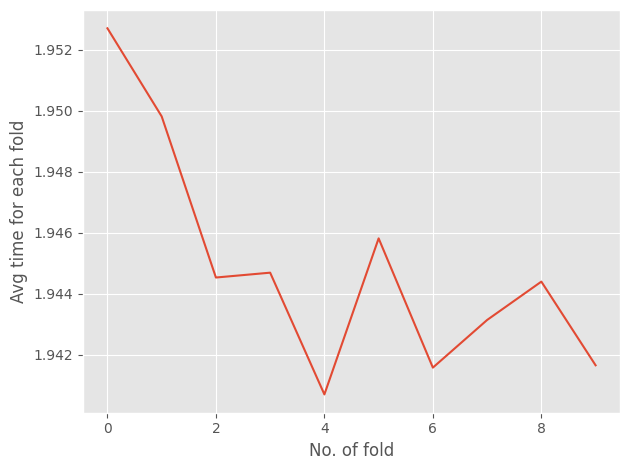

In [108]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [109]:
times_axn_n_n

array([1.95270399, 1.94981749, 1.94453778, 1.94469657, 1.94070731,
       1.94582063, 1.94158568, 1.94314636, 1.94440344, 1.94166191])

In [110]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [111]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

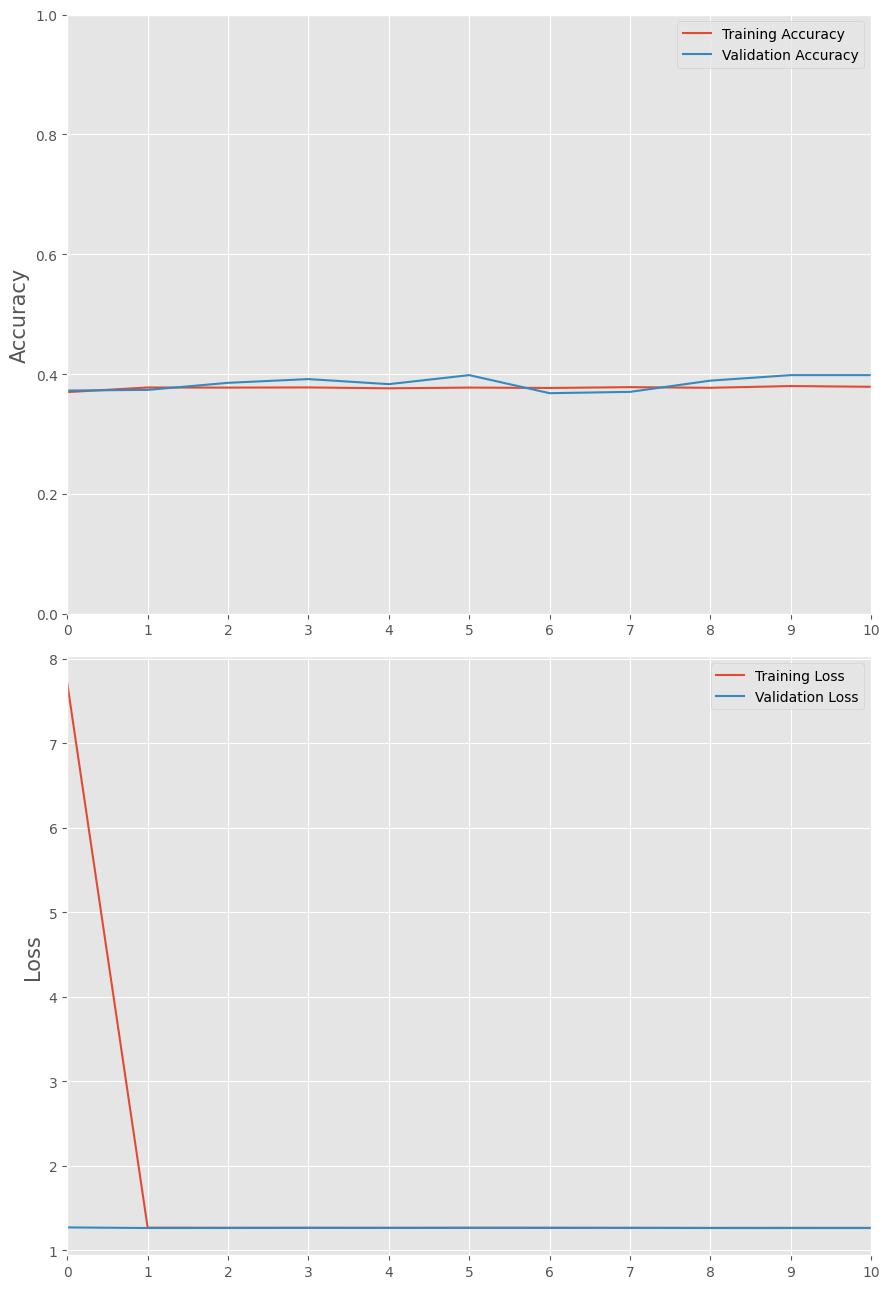

In [112]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [113]:
import gc
gc.collect()

23526

In [114]:
np.array(scores_axn).shape

(10, 302, 4)

In [115]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [116]:
y_pred_axn.shape

(10, 302)

In [117]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [118]:
acc_scores_axn

[0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007,
 0.3841059602649007]

In [119]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [120]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

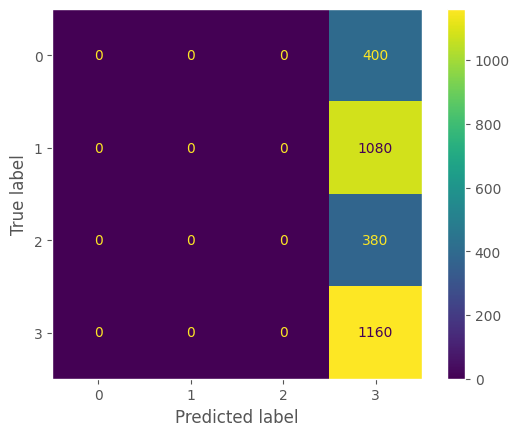

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [122]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00      1080
           2       0.00      0.00      0.00       380
           3       0.38      1.00      0.56      1160

    accuracy                           0.38      3020
   macro avg       0.10      0.25      0.14      3020
weighted avg       0.15      0.38      0.21      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EfficientNetB7

In [123]:
import gc
gc.collect()

6421

In [124]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [125]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [126]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 26s 201ms/step - loss: 1.3183 - accuracy: 0.3851 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3273 - accuracy: 0.3769 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3277 - accuracy: 0.3679 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3212 - accuracy: 0.3651 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3232 - accuracy: 0.3729 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3123 - accuracy: 0.3839 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3254 - accuracy: 0.3790
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.21 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3254 - accuracy: 0.3790 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3262 - accuracy: 0.3667 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3254 - accuracy: 0.3827 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3193 - accuracy: 0.3794 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3216 - accuracy: 0.3741 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3233 - accuracy: 0.3765
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.21 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3233 - accuracy: 0.3765 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3248 - accuracy: 0.3688 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3243 - accuracy: 0.3774 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3216 - accuracy: 0.3790 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3294 - accuracy: 0.3647 - val_loss: 1.3247 - val_accuracy: 0.3529 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5282 - accuracy: 0.1472 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5293 - accuracy: 0.1492 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.5347 - accuracy: 0.1374
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.5347 - accuracy: 0.1374 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5373 - accuracy: 0.1410 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5359 - accuracy: 0.1382 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5319 - accuracy: 0.1464 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5308 - accuracy: 0.1386 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.5261 - accuracy: 0.1455
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.5261 - accuracy: 0.1455 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 173ms/step - loss: 1.5393 - accuracy: 0.1378 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5361 - accuracy: 0.1390 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5365 - accuracy: 0.1406 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5347 - accuracy: 0.1378 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.5316 - accuracy: 0.1410
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.15 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.5316 - accuracy: 0.1410 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5351 - accuracy: 0.1468 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5308 - accuracy: 0.1435 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 171ms/step - loss: 1.5369 - accuracy: 0.1435 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 173ms/step - loss: 1.5272 - accuracy: 0.1431 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.5348 - accuracy: 0.1398
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.20 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.5348 - accuracy: 0.1398 - val_loss: 1.5216 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 143ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 23s 198ms/step - loss: 1.4607 - accuracy: 0.1815 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 171ms/

Epoch 25/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4573 - accuracy: 0.1705 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4595 - accuracy: 0.1733 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4550 - accuracy: 0.1832 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4641 - accuracy: 0.1811 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4621 - accuracy: 0.1639
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.13 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.4621 - accuracy: 0.1639 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4594 - accuracy: 0.1738 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4611 - accuracy: 0.1770 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4543 - accuracy: 0.1827 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4551 - accuracy: 0.1770 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4678 - accuracy: 0.1611
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.16 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.4678 - accuracy: 0.1611 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4531 - accuracy: 0.1827 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4568 - accuracy: 0.1856 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4636 - accuracy: 0.1713 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4645 - accuracy: 0.1643 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4580 - accuracy: 0.1799
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.29 seconds
77/77 [==============================] - 13s 173ms/step - loss: 1.4580 - accuracy: 0.1799 - val_loss: 1.4470 - val_accuracy: 0.1324 - lr: 2.

Epoch 9/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3398 - accuracy: 0.3536 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3505 - accuracy: 0.3377 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3441 - accuracy: 0.3545 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3430 - accuracy: 0.3500 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3391 - accuracy: 0.3410 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3480 - accuracy: 0.3438 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3430 - accuracy: 0.3426 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3395 - accuracy: 0.3438 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3387 - accuracy: 0.3561 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3455 - accuracy: 0.3500 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3396 - accuracy: 0.3561 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3456 - accuracy: 0.3426 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3519 - accuracy: 0.3442 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3412 - accuracy: 0.3504 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3471 - accuracy: 0.3430 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3458 - accuracy: 0.3422 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3401 - accuracy: 0.3430 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3456 - accuracy: 0.3422 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3442 - accuracy: 0.3385 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3434 - accuracy: 0.3504 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3479 - accuracy: 0.3389 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3414 - accuracy: 0.3545 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3381 - accuracy: 0.3553 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3431 - accuracy: 0.3426 - val_loss: 1.3280 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 172ms/step - loss: 1.5732 - accuracy: 0.1562 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.5708 - accuracy: 0.1525
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.5708 - accuracy: 0.1525 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5687 - accuracy: 0.1554 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5735 - accuracy: 0.1566 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5766 - accuracy: 0.1533 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5703 - accuracy: 0.1521 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.5730 - accuracy: 0.1472
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 13.18 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.5730 - accuracy: 0.1472 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5758 - accuracy: 0.1504 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5829 - accuracy: 0.1476 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5747 - accuracy: 0.1533 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 1

Epoch 77/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5751 - accuracy: 0.1504 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.5788 - accuracy: 0.1484
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 13.24 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.5788 - accuracy: 0.1484 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5746 - accuracy: 0.1533 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5679 - accuracy: 0.1529 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 170ms/step - loss: 1.5721 - accuracy: 0.1517 - val_loss: 1.5622 - val_accuracy: 0.1471 - lr: 2

Epoch 5/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4057 - accuracy: 0.2449 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4037 - accuracy: 0.2535 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4054 - accuracy: 0.2510 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4019 - accuracy: 0.2531
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.4019 - accuracy: 0.2531 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4047 - accuracy: 0.2604 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4052 - accuracy: 0.2518 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4023 - accuracy: 0.2490 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4069 - accuracy: 0.2433 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.4030 - accuracy: 0.2629
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 13.19 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.4030 - accuracy: 0.2629 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4035 - accuracy: 0.2563 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 3.

Epoch 61/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4066 - accuracy: 0.2473 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4043 - accuracy: 0.2486 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4131 - accuracy: 0.2457 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4035 - accuracy: 0.2490
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.4035 - accuracy: 0.2490 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4051 - accuracy: 0.2392 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4112 - accuracy: 0.2367 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4047 - accuracy: 0.2396 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4046 - accuracy: 0.2433 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4095 - accuracy: 0.2449
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 13.18 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.4095 - accuracy: 0.2449 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4101 - accuracy: 0.2318 - val_loss: 1.3808 - val_accuracy: 0.2647 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4993 - accuracy: 0.2093 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5040 - accuracy: 0.1975 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4951 - accuracy: 0.2105 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4932 - accuracy: 0.2138 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4923 - accuracy: 0.2159 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4954 - accuracy: 0.2187
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 13s 172ms/step - loss: 1.5011 - accuracy: 0.1991 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4954 - accuracy: 0.2265 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4965 - accuracy: 0.1983 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4953 - accuracy: 0.2032 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4914 - accuracy: 0.2155 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4962 - accuracy: 0.1962
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4961 - accuracy: 0.2061 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4975 - accuracy: 0.2118 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4952 - accuracy: 0.2138 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4941 - accuracy: 0.2085 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4912 - accuracy: 0.2175 - val_loss: 1.4599 - val_accuracy: 0.2169 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4999 - accuracy: 0.1942
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 3s 144ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 23s 199ms/step - loss: 1.4362 - accuracy: 0.2723 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4293 - accuracy: 0.2592 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4333 - accuracy: 0.2702 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4288 - accuracy: 0.2690 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4291 - accuracy: 0.2784 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4277 - accuracy: 0.2935 - val_loss: 1.3967 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.4302 - accuracy: 0.2723
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.11 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4302 - accuracy: 0.2723 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 13s 170ms/step - loss: 1.4331 - accuracy: 0.2653 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4269 - accuracy: 0.2776 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4286 - accuracy: 0.2666 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4274 - accuracy: 0.2751 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4306 - accuracy: 0.2649
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.16 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.4306 - accuracy: 0.2649 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4307 - accuracy: 0.2743 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4340 - accuracy: 0.2678 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4279 - accuracy: 0.2735 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4276 - accuracy: 0.2694 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4317 - accuracy: 0.2617
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.10 seconds
77/77 [==============================] - 13s 170ms/step - loss: 1.4317 - accuracy: 0.2617 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4317 - accuracy: 0.2751 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4312 - accuracy: 0.2625 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4229 - accuracy: 0.2690 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 13s 173ms/step - loss: 1.4320 - accuracy: 0.2743 - val_loss: 1.3967 - val_accuracy: 0.3051 - lr: 4.

Epoch 13/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3753 - accuracy: 0.2825 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3825 - accuracy: 0.2674 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3731 - accuracy: 0.2829
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 13.24 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3731 - accuracy: 0.2829 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3812 - accuracy: 0.2706 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3749 - accuracy: 0.3001 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3822 - accuracy: 0.2711 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3830 - accuracy: 0.2592 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3845 - accuracy: 0.2731
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 13.19 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3845 - accuracy: 0.2731 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3797 - accuracy: 0.2825 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3836 - accuracy: 0.2747 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 6.

Epoch 69/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3816 - accuracy: 0.2682 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3817 - accuracy: 0.2674 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3824 - accuracy: 0.2796
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 13.17 seconds
77/77 [==============================] - 13s 171ms/step - loss: 1.3824 - accuracy: 0.2796 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3791 - accuracy: 0.2878 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3776 - accuracy: 0.2796 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 1

Epoch 97/100
77/77 [==============================] - 13s 173ms/step - loss: 1.3790 - accuracy: 0.2825 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3807 - accuracy: 0.2890 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3790 - accuracy: 0.2813
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3790 - accuracy: 0.2813 - val_loss: 1.3717 - val_accuracy: 0.2574 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 141ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 26s 200ms/step - loss: 1.4016 - accuracy: 0.2314 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 13s 172ms

Epoch 25/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3974 - accuracy: 0.2322 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3924 - accuracy: 0.2200 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3950 - accuracy: 0.2249 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4011 - accuracy: 0.2155 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3996 - accuracy: 0.2253
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 13.22 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3996 - accuracy: 0.2253 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 8

Epoch 53/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3980 - accuracy: 0.2359 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 13s 169ms/step - loss: 1.3997 - accuracy: 0.2265 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 13s 172ms/step - loss: 1.4007 - accuracy: 0.2244 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3962 - accuracy: 0.2306 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3974 - accuracy: 0.2298
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 13.23 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3974 - accuracy: 0.2298 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 1

Epoch 81/100
77/77 [==============================] - 13s 170ms/step - loss: 1.3998 - accuracy: 0.2310 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 13s 171ms/step - loss: 1.3974 - accuracy: 0.2204 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 13s 171ms/step - loss: 1.4033 - accuracy: 0.2220 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 13s 172ms/step - loss: 1.3930 - accuracy: 0.2310 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3922 - accuracy: 0.2392
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 13.20 seconds
77/77 [==============================] - 13s 172ms/step - loss: 1.3922 - accuracy: 0.2392 - val_loss: 1.3781 - val_accuracy: 0.2022 - lr: 2.

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_49/efficientnetb7/block2a_expand_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\DSAI\AppData\Local\Temp\ipykernel_16212\2356963082.py", line 33, in <module>
      x = model_enb7.predict(X_test)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_49/efficientnetb7/block2a_expand_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[32,130,54,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_49/efficientnetb7/block2a_expand_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_4392988]

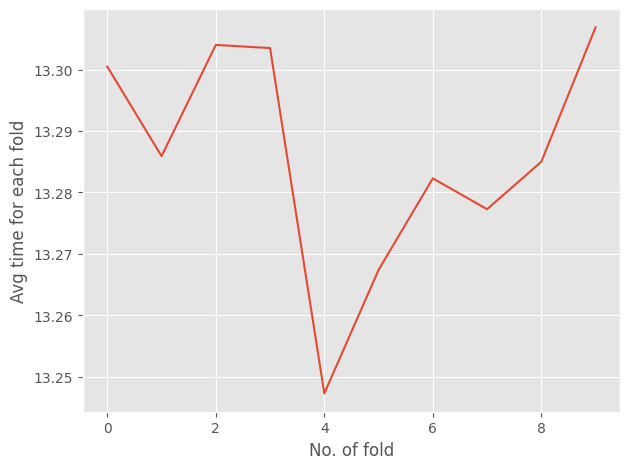

In [127]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [128]:
import gc
gc.collect()

68487

In [129]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [130]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [131]:
test_loss_enb7_n

0     1.279254
1     1.279254
2     1.279254
3     1.279254
4     1.279254
        ...   
95    1.279254
96    1.279254
97    1.279254
98    1.279254
99    1.279254
Name: 3, Length: 100, dtype: float64

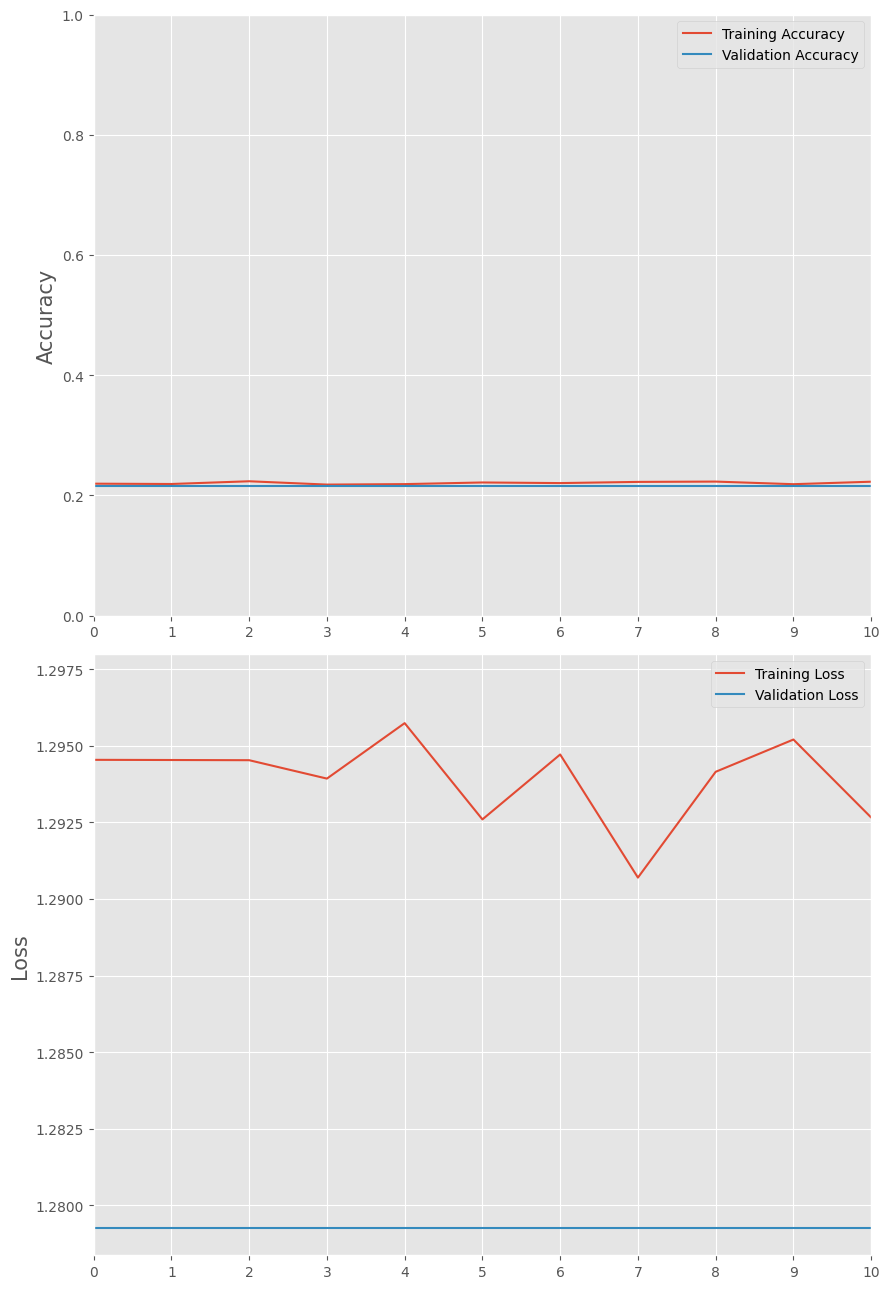

In [132]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [133]:
np.array(scores_enb7).shape

(9, 302, 4)

In [134]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [135]:
y_pred_enb7.shape

(9, 302)

In [138]:
np.array(y_test_all_enb7).shape

(10, 302)

In [136]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
acc_scores_enb7

In [ ]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [ ]:
import gc
gc.collect()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

# ResNetV2

In [14]:
import gc
gc.collect()

0

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [16]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 8s 50ms/step - loss: 42.8287 - accuracy: 0.3475 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 42.6058 - accuracy: 0.3357 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 43.1462 - accuracy: 0.3397 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 42.7190 - accuracy: 0.3418 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 42.9462 - accuracy: 0.3381 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 42.5945 - accuracy: 0.3381 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 42.9740 - accuracy: 0.3351
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 42.9484 - accuracy: 0.3348 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 42.4141 - accuracy: 0.3381 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 43.5391 - accuracy: 0.3414 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 42.7469 - accuracy: 0.3410 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 42.8168 - accuracy: 0.3373 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 43.2630 - accuracy: 0.3373
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 43.2630 - accuracy: 0.3373 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 42.9184 - accuracy: 0.3483 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 42.8815 - accuracy: 0.3414 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 43.2557 - accuracy: 0.3393 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 43.1200 - accuracy: 0.3401 - val_loss: 40.1137 - val_accuracy: 0.3529 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 40ms/step - loss: 45.4552 - accuracy: 0.2159 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 44.5932 - accuracy: 0.2159 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 44.8955 - accuracy: 0.2183
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 44.7954 - accuracy: 0.2191 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 45.2669 - accuracy: 0.2061 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 45.1101 - accuracy: 0.2056 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 44.7898 - accuracy: 0.2167 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 45.6498 - accuracy: 0.2118 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 45.1587 - accuracy: 0.2138
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 45.1587 - accuracy: 0.2138 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 40ms/step - loss: 44.5912 - accuracy: 0.2105 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 44.1629 - accuracy: 0.2216 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 44.5153 - accuracy: 0.2118 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 44.0121 - accuracy: 0.2253 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 45.4096 - accuracy: 0.1974
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 45.4155 - accuracy: 0.1971 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 45.4738 - accuracy: 0.1909 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 44.6491 - accuracy: 0.2244 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 44.4627 - accuracy: 0.2122 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 44.5339 - accuracy: 0.2167 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 44.8211 - accuracy: 0.2114
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 44.8211 - accuracy: 0.2114 - val_loss: 30.1558 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 32ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 38.6118 - accuracy: 0.1680 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/ste

Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 38.9746 - accuracy: 0.1648 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 39.3973 - accuracy: 0.1652 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 39.1898 - accuracy: 0.1827 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 39.6799 - accuracy: 0.1668 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 39.5885 - accuracy: 0.1600
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 39.5739 - accuracy: 0.1599 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 39.3817 - accuracy: 0.1627 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 38.8142 - accuracy: 0.1676 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 40ms/step - loss: 39.0019 - accuracy: 0.1778 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 40ms/step - loss: 38.6174 - accuracy: 0.1672 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 39.9102 - accuracy: 0.1604
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 39.9650 - accuracy: 0.1599 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 39.2164 - accuracy: 0.1639 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 38.7126 - accuracy: 0.1697 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 40ms/step - loss: 39.5979 - accuracy: 0.1660 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 39.8068 - accuracy: 0.1680 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 39.3563 - accuracy: 0.1676
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.13 seconds
77/77 [==============================] - 3s 41ms/step - loss: 39.3563 - accuracy: 0.1676 - val_loss: 36.0760 - val_accuracy: 0.1544 - lr: 2.

Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: 41.3923 - accuracy: 0.1513 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 40ms/step - loss: 41.0080 - accuracy: 0.1545 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 40ms/step - loss: 40.6800 - accuracy: 0.1607 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 40ms/step - loss: 41.2927 - accuracy: 0.1570 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 41.0915 - accuracy: 0.1623 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 41.2369 - accuracy: 0.1549 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 3s 40ms/step - loss: 42.0552 - accuracy: 0.1333 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 40ms/step - loss: 41.2390 - accuracy: 0.1468 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 40ms/step - loss: 40.7342 - accuracy: 0.1643 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 40ms/step - loss: 41.3974 - accuracy: 0.1537 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 41.7606 - accuracy: 0.1545 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 42.7239 - accuracy: 0.1484 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 3s 40ms/step - loss: 40.7218 - accuracy: 0.1504 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 40ms/step - loss: 40.4197 - accuracy: 0.1537 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 40ms/step - loss: 40.5830 - accuracy: 0.1590 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 40ms/step - loss: 40.7554 - accuracy: 0.1615 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 40.1501 - accuracy: 0.1664 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 40.7885 - accuracy: 0.1566 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 5.1200e-10
Epoch 71/100
76/77 [========

Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: 41.8635 - accuracy: 0.1554 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 40ms/step - loss: 40.6237 - accuracy: 0.1615 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 40ms/step - loss: 41.3264 - accuracy: 0.1643 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: 40.9260 - accuracy: 0.1619 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 41.6756 - accuracy: 0.1443 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: 41.3619 - accuracy: 0.1525 - val_loss: 37.9501 - val_accuracy: 0.1103 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 3s 41ms/step - loss: 29.8124 - accuracy: 0.1889 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 28.9420 - accuracy: 0.2114
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 28.9420 - accuracy: 0.2114 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3109 - accuracy: 0.2061 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9200 - accuracy: 0.2085 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9783 - accuracy: 0.2048 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2058 - accuracy: 0.2032 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 30.1070 - accuracy: 0.2101
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 30.1521 - accuracy: 0.2101 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 40ms/step - loss: 29.6518 - accuracy: 0.1950 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9562 - accuracy: 0.1979 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 29.9766 - accuracy: 0.2040 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 1

Epoch 77/100
77/77 [==============================] - 3s 40ms/step - loss: 29.5169 - accuracy: 0.2052 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 29.0243 - accuracy: 0.2048
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 29.0243 - accuracy: 0.2048 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2769 - accuracy: 0.2048 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 40ms/step - loss: 28.8608 - accuracy: 0.2114 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 29.9826 - accuracy: 0.2036 - val_loss: 18.9677 - val_accuracy: 0.1949 - lr: 2

Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 33.3616 - accuracy: 0.3193 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 32.9066 - accuracy: 0.3307 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 40ms/step - loss: 34.1286 - accuracy: 0.3119 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 33.3286 - accuracy: 0.3109
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 33.2986 - accuracy: 0.3107 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 40ms/step - loss: 34.1525 - accuracy: 0.3160 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 34.0300 - accuracy: 0.3177 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 34.0925 - accuracy: 0.3087 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 40ms/step - loss: 33.6906 - accuracy: 0.3066 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 36/100
75/77 [============================>.] - ETA: 0s - loss: 33.8283 - accuracy: 0.3088
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 33.8549 - accuracy: 0.3074 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 40ms/step - loss: 33.8282 - accuracy: 0.3144 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 3.

Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 34.0897 - accuracy: 0.3107 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 40ms/step - loss: 32.8235 - accuracy: 0.3222 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 33.7903 - accuracy: 0.3128 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 33.9739 - accuracy: 0.3224
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 33.9188 - accuracy: 0.3226 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 40ms/step - loss: 33.0174 - accuracy: 0.3193 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 34.3370 - accuracy: 0.3115 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 34.1300 - accuracy: 0.3197 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: 33.6088 - accuracy: 0.3099 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 33.2501 - accuracy: 0.3104
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 33.1556 - accuracy: 0.3103 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 40ms/step - loss: 33.8370 - accuracy: 0.3148 - val_loss: 27.2705 - val_accuracy: 0.3934 - lr: 8.

Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 29.5564 - accuracy: 0.3659 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 30.1897 - accuracy: 0.3577 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 29.8709 - accuracy: 0.3561 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 41ms/step - loss: 30.2298 - accuracy: 0.3406 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3733 - accuracy: 0.3610 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 29.4267 - accuracy: 0.3503
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for e

Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 29.9941 - accuracy: 0.3512 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 40ms/step - loss: 30.2283 - accuracy: 0.3561 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3704 - accuracy: 0.3606 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 40ms/step - loss: 29.6618 - accuracy: 0.3585 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 40ms/step - loss: 30.2165 - accuracy: 0.3463 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 29.4636 - accuracy: 0.3610
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for 

Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 30.0534 - accuracy: 0.3581 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3984 - accuracy: 0.3712 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3956 - accuracy: 0.3610 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3447 - accuracy: 0.3577 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 40ms/step - loss: 29.7081 - accuracy: 0.3577 - val_loss: 23.8245 - val_accuracy: 0.4007 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 30.1124 - accuracy: 0.3487
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for 

10/10 [==============================] - 1s 35ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 29.8897 - accuracy: 0.1836 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 28.8984 - accuracy: 0.1934 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 29.4375 - accuracy: 0.1827 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 28.7996 - accuracy: 0.1917 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 29.1847 - accuracy: 0.1926 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2118 - accuracy: 0.1926 - val_loss: 24.5983 - val_accuracy:

77/77 [==============================] - ETA: 0s - loss: 29.9396 - accuracy: 0.1930
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 29.9396 - accuracy: 0.1930 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3238 - accuracy: 0.1893 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3728 - accuracy: 0.1815 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9803 - accuracy: 0.1885 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 29.6107 - accuracy: 0.1848 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 28.7981 - accuracy: 0.1934
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 28.7981 - accuracy: 0.1934 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 29.3711 - accuracy: 0.1807 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2676 - accuracy: 0.1840 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 29.5319 - accuracy: 0.1840 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 29.5035 - accuracy: 0.1893 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 29.9559 - accuracy: 0.1868
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 29.9559 - accuracy: 0.1868 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 30.0468 - accuracy: 0.1840 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 29.7642 - accuracy: 0.1799 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2695 - accuracy: 0.1766 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 29.9533 - accuracy: 0.1725 - val_loss: 24.5983 - val_accuracy: 0.1801 - lr: 4.

Epoch 13/100
77/77 [==============================] - 3s 40ms/step - loss: 26.5967 - accuracy: 0.3258 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 26.7666 - accuracy: 0.3246 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 27.2666 - accuracy: 0.3104
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 27.2354 - accuracy: 0.3115 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 26.8473 - accuracy: 0.3132 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 26.2913 - accuracy: 0.3373 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 4

Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 27.2769 - accuracy: 0.3291 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 27.4863 - accuracy: 0.3095 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 26.7750 - accuracy: 0.3092
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 26.8168 - accuracy: 0.3083 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 40ms/step - loss: 26.3183 - accuracy: 0.3267 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 26.8485 - accuracy: 0.3287 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 6.

Epoch 69/100
77/77 [==============================] - 3s 40ms/step - loss: 26.9764 - accuracy: 0.3173 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 26.9853 - accuracy: 0.3177 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 71/100
75/77 [============================>.] - ETA: 0s - loss: 26.6380 - accuracy: 0.3237
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 26.5431 - accuracy: 0.3242 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 27.3213 - accuracy: 0.3262 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 26.4259 - accuracy: 0.3177 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 1

Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 27.1586 - accuracy: 0.3087 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 39ms/step - loss: 27.5282 - accuracy: 0.3050 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 26.3028 - accuracy: 0.3400
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 26.3902 - accuracy: 0.3401 - val_loss: 20.3599 - val_accuracy: 0.3199 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 34ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 28.0906 - accuracy: 0.2200 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/st

Epoch 25/100
77/77 [==============================] - 3s 40ms/step - loss: 28.3916 - accuracy: 0.2134 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 29.0084 - accuracy: 0.2281 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2105 - accuracy: 0.2208 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 28.8355 - accuracy: 0.2163 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 28.7013 - accuracy: 0.2122
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 28.7482 - accuracy: 0.2122 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 8

Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9128 - accuracy: 0.2089 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 28.2671 - accuracy: 0.2261 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 40ms/step - loss: 28.9218 - accuracy: 0.2105 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 40ms/step - loss: 28.6293 - accuracy: 0.2122 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 28.7963 - accuracy: 0.2089
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.18 seconds
77/77 [==============================] - 3s 41ms/step - loss: 28.7963 - accuracy: 0.2089 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 1

Epoch 81/100
77/77 [==============================] - 3s 40ms/step - loss: 28.7364 - accuracy: 0.2126 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 29.2338 - accuracy: 0.2028 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 40ms/step - loss: 28.8431 - accuracy: 0.2028 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 29.0580 - accuracy: 0.2020 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 29.0720 - accuracy: 0.2072
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.45 seconds
77/77 [==============================] - 5s 71ms/step - loss: 29.0844 - accuracy: 0.2065 - val_loss: 22.3216 - val_accuracy: 0.1581 - lr: 2.

In [18]:
import gc
gc.collect()

0

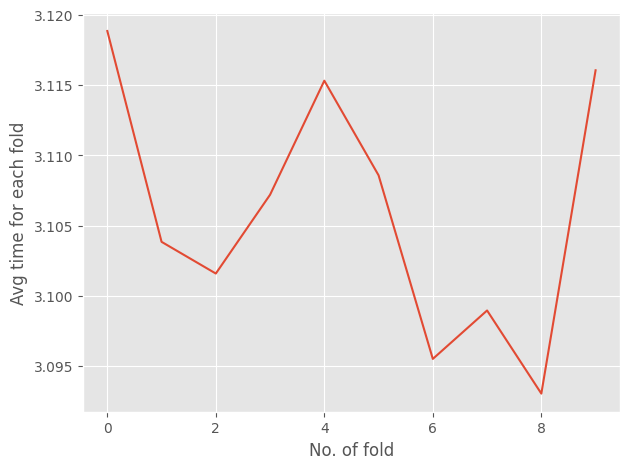

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [20]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [21]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [22]:
train_acc_rnv2_n

0     0.249346
1     0.249591
2     0.251308
3     0.248201
4     0.249428
        ...   
95    0.245339
96    0.243173
97    0.248855
98    0.251799
99    0.247547
Name: 0, Length: 100, dtype: float64

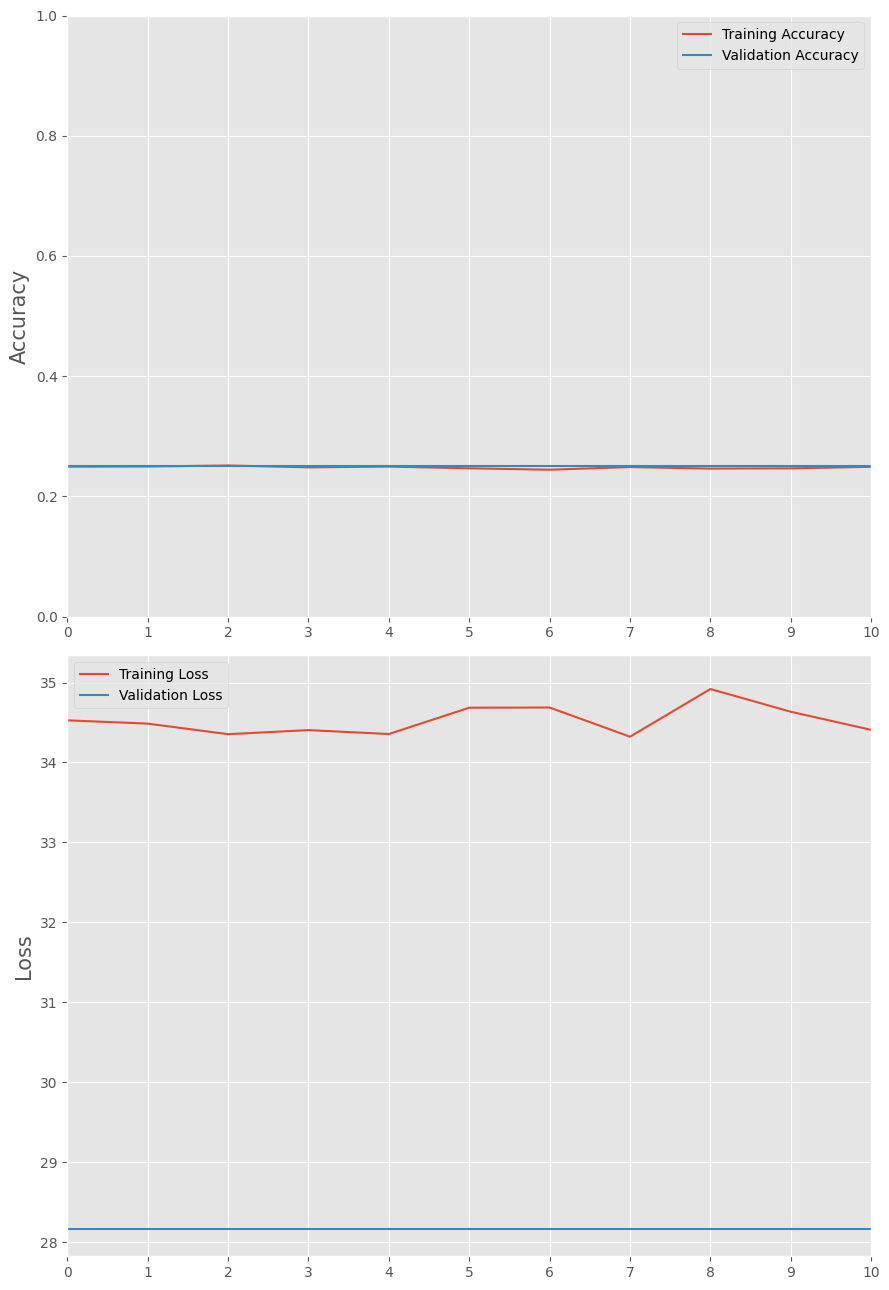

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [24]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [25]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [26]:
y_pred_rnv2.shape

(10, 302)

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [28]:
import gc
gc.collect()

3325

In [29]:
acc_scores_rnv2

[0.33774834437086093,
 0.2119205298013245,
 0.1390728476821192,
 0.1291390728476821,
 0.19205298013245034,
 0.36423841059602646,
 0.3741721854304636,
 0.1986754966887417,
 0.34105960264900664,
 0.13245033112582782]

In [30]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [31]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

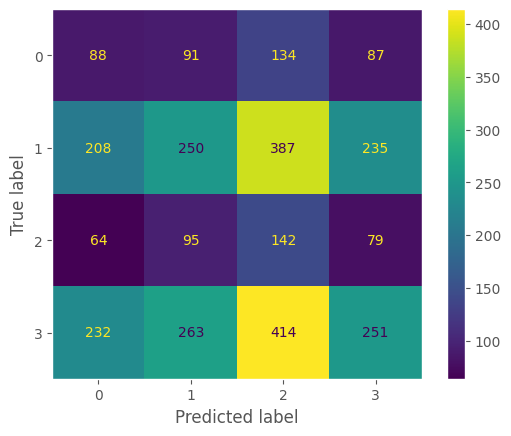

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [33]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.15      0.22      0.18       400
           1       0.36      0.23      0.28      1080
           2       0.13      0.37      0.19       380
           3       0.38      0.22      0.28      1160

    accuracy                           0.24      3020
   macro avg       0.26      0.26      0.23      3020
weighted avg       0.31      0.24      0.25      3020



# VGG16

In [34]:
import gc
gc.collect()

15

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [36]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [37]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 97ms/step - loss: 4.6734 - accuracy: 0.1819 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7074 - accuracy: 0.1746 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7259 - accuracy: 0.1742 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7059 - accuracy: 0.1742 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7106 - accuracy: 0.1742 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7157 - accuracy: 0.1656 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.74 seconds
77/77 [==============================] - 5s 62ms/step - loss: 4.7100 - accuracy: 0.1729 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 61ms/step - loss: 4.6419 - accuracy: 0.1758 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 62ms/step - loss: 4.7554 - accuracy: 0.1729 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7549 - accuracy: 0.1762 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 62ms/step - loss: 4.7114 - accuracy: 0.1672 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7585 - accuracy: 0.1746 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7419 - accuracy: 0.1599 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 61ms/step - loss: 4.8039 - accuracy: 0.1664 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7901 - accuracy: 0.1778 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 62ms/step - loss: 4.7124 - accuracy: 0.1701 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 61ms/step - loss: 4.7358 - accuracy: 0.1701 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 62ms/step - loss: 4.7015 - accuracy: 0.1783 - val_loss: 3.9666 - val_accuracy: 0.1765 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 3.8472 - accuracy: 0.3664
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.73 seconds
77/77 [==============================] - 5s 62ms/step - loss: 3.8535 - accuracy: 0.3659 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7786 - accuracy: 0.3520 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8220 - accuracy: 0.3520 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8915 - accuracy: 0.3536 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8680 - accuracy: 0.3594 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 3.8732 - accuracy: 0.3590
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.70 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.8803 - accuracy: 0.3590 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8761 - accuracy: 0.3622 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8528 - accuracy: 0.3590 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7879 - accuracy: 0.3508 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 5s 61ms/step - loss: 3.8873 - accuracy: 0.3561 - val_loss: 3.3774 - val_accuracy: 0.3860 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 5s 61ms/step - loss: 2.7625 - accuracy: 0.3594 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7149 - accuracy: 0.3569 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.7258 - accuracy: 0.3622
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.72 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.7258 - accuracy: 0.3622 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7652 - accuracy: 0.3451 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7265 - accuracy: 0.3659 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 5s 61ms/step - loss: 2.7514 - accuracy: 0.3455 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7856 - accuracy: 0.3430 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 2.7925 - accuracy: 0.3495
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.69 seconds
77/77 [==============================] - 5s 61ms/step - loss: 2.7935 - accuracy: 0.3491 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7159 - accuracy: 0.3561 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7777 - accuracy: 0.3369 - val_loss: 2.0617 - val_accuracy: 0.3971 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 61ms/step - loss: 3.7583 - accuracy: 0.3250 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7901 - accuracy: 0.3250 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 5s 62ms/step - loss: 3.7328 - accuracy: 0.3254 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 61ms/step - loss: 3.6722 - accuracy: 0.3209 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 3.7710 - accuracy: 0.3228
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.69 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.7680 - accuracy: 0.3230 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 5s 61ms/step - loss: 3.7932 - accuracy: 0.3197 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7465 - accuracy: 0.3197 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7431 - accuracy: 0.3283 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 61ms/step - loss: 3.7552 - accuracy: 0.3291 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 3.7512 - accuracy: 0.3322
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.71 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.7617 - accuracy: 0.3312 - val_loss: 3.4496 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 61ms/step - loss: 2.4806 - accuracy: 0.3128 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 5s 62ms/step - loss: 2.5014 - accuracy: 0.3250 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 61ms/step - loss: 2.5429 - accuracy: 0.3148 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 61ms/step - loss: 2.5417 - accuracy: 0.3181 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 61ms/step - loss: 2.5277 - accuracy: 0.3213 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 61ms/step - loss: 2.5091 - accuracy: 0.3173 - val_loss: 1.9983 - val_accuracy: 0.3125 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 5s 61ms/step - loss: 3.3766 - accuracy: 0.3581 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 3.3952 - accuracy: 0.3643
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.68 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.3924 - accuracy: 0.3639 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 61ms/step - loss: 3.3877 - accuracy: 0.3684 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 5s 62ms/step - loss: 3.3666 - accuracy: 0.3712 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 5s 61ms/step - loss: 3.3732 - accuracy: 0.3610 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 5s 61ms/step - loss: 3.4197 - accuracy: 0.3630 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 3.4182 - accuracy: 0.3594
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.71 seconds
77/77 [==============================] - 5s 61ms/step - loss: 3.4194 - accuracy: 0.3590 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 5s 61ms/step - loss: 3.4564 - accuracy: 0.3516 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 5s 61ms/step - loss: 3.4618 - accuracy: 0.3545 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 5s 61ms/step - loss: 3.3445 - accuracy: 0.3651 - val_loss: 3.0381 - val_accuracy: 0.4154 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 5s 61ms/step - loss: 6.0999 - accuracy: 0.1329 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 61ms/step - loss: 6.0150 - accuracy: 0.1321 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 5s 61ms/step - loss: 6.0447 - accuracy: 0.1312 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 6.0825 - accuracy: 0.1312
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 4.72 seconds
77/77 [==============================] - 5s 61ms/step - loss: 6.0709 - accuracy: 0.1321 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 5s 61ms/step - loss: 6.0533 - accuracy: 0.1284 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 5s 61ms/step - loss: 6.1133 - accuracy: 0.1300 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 5s 62ms/step - loss: 6.0258 - accuracy: 0.1321 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 5s 61ms/step - loss: 6.0737 - accuracy: 0.1296 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 6.0875 - accuracy: 0.1316
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 4.75 seconds
77/77 [==============================] - 5s 62ms/step - loss: 6.0801 - accuracy: 0.1333 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 5s 61ms/step - loss: 6.1165 - accuracy: 0.1321 - val_loss: 6.1778 - val_accuracy: 0.1103 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7283 - accuracy: 0.3230 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 61ms/step - loss: 2.6843 - accuracy: 0.3168 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 61ms/step - loss: 2.6927 - accuracy: 0.3193 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7576 - accuracy: 0.3005 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7360 - accuracy: 0.3034 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 2.6890 - accuracy: 0.2993
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 4.72 seconds
77/77 [=========

77/77 [==============================] - 5s 61ms/step - loss: 2.7339 - accuracy: 0.2903 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 5s 61ms/step - loss: 2.6929 - accuracy: 0.3136 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 5s 61ms/step - loss: 2.6609 - accuracy: 0.3054 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7348 - accuracy: 0.3013 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 5s 61ms/step - loss: 2.6476 - accuracy: 0.3062 - val_loss: 2.0691 - val_accuracy: 0.3676 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 2.7050 - accuracy: 0.3088
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 4.71 seconds
77/7

Time taken for epoch 15: 4.70 seconds
77/77 [==============================] - 5s 61ms/step - loss: 5.9367 - accuracy: 0.1578 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9572 - accuracy: 0.1664 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 62ms/step - loss: 5.8869 - accuracy: 0.1635 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 5s 62ms/step - loss: 5.9442 - accuracy: 0.1599 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 61ms/step - loss: 6.0114 - accuracy: 0.1545 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 5s 62ms/step - loss: 5.9055 - accuracy: 0.1717 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9279 - accuracy: 0.1558 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 61ms/step - loss: 5.8151 - accuracy: 0.1619 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9271 - accuracy: 0.1652 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9195 - accuracy: 0.1586 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9770 - accuracy: 0.1554 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 5s 61ms/step - loss: 5.9468 - accuracy: 0.1697 - val_loss: 5.0716 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

10/10 [==============================] - 1s 52ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 63ms/step - loss: 8.5828 - accuracy: 0.1325 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 61ms/step - loss: 8.5267 - accuracy: 0.1316 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4847 - accuracy: 0.1337 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4699 - accuracy: 0.1353 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4551 - accuracy: 0.1329 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4038 - accuracy: 0.1345 - val_loss: 8.7797 - val_accuracy: 0.1397 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 8.5913 - accuracy: 0.1353
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.71 seconds
77/77 [==============================] - 5s 61ms/step - loss: 8.5905 - accuracy: 0.1361 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 5s 61ms/step - loss: 8.5440 - accuracy: 0.1337 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 5s 61ms/step - loss: 8.5107 - accuracy: 0.1333 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 5s 61ms/step - loss: 8.5150 - accuracy: 0.1333 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4924 - accuracy: 0.1296 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 8.5014 - accuracy: 0.1320
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.69 seconds
77/77 [==============================] - 5s 61ms/step - loss: 8.4856 - accuracy: 0.1325 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 62ms/step - loss: 8.5973 - accuracy: 0.1316 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4774 - accuracy: 0.1316 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 61ms/step - loss: 8.5015 - accuracy: 0.1329 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 5s 61ms/step - loss: 8.4905 - accuracy: 0.1312 - val_loss: 8.7797 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 90/100
77

In [38]:
import gc
gc.collect()

0

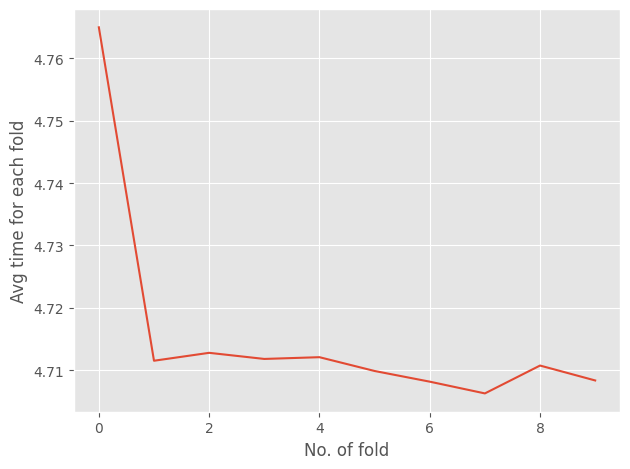

In [39]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [40]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [41]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

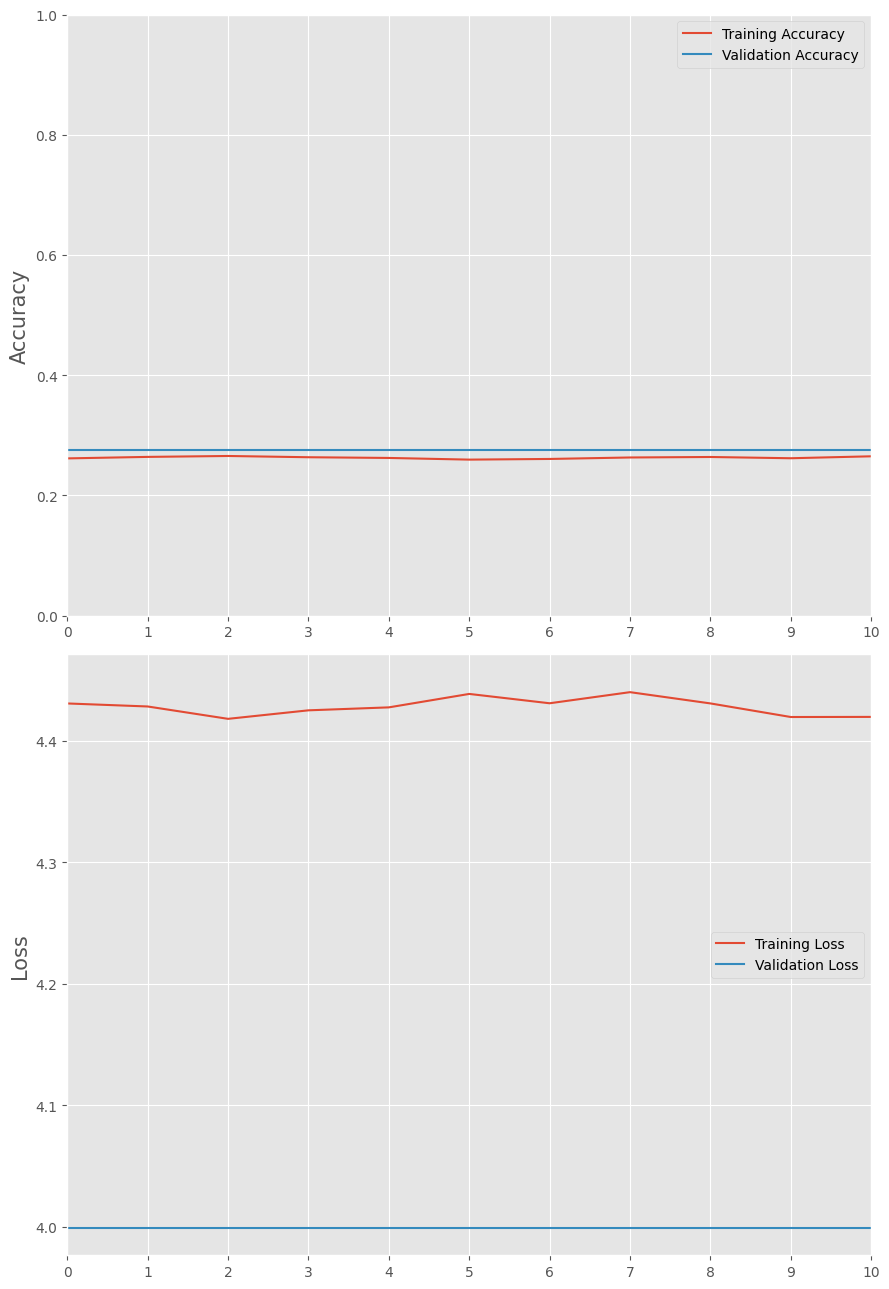

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [43]:
np.array(scores_vgg16).shape

(10, 302, 4)

In [44]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [45]:
y_pred_vgg16.shape

(10, 302)

In [46]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [47]:
acc_scores_vgg16

[0.15562913907284767,
 0.3973509933774834,
 0.39403973509933776,
 0.3576158940397351,
 0.32781456953642385,
 0.39403973509933776,
 0.12582781456953643,
 0.347682119205298,
 0.16225165562913907,
 0.13245033112582782]

In [48]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [49]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

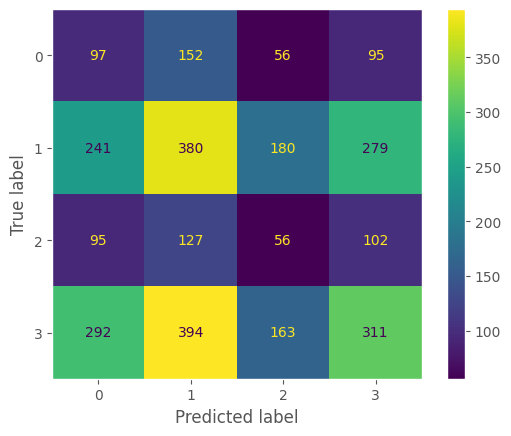

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [51]:
import gc
gc.collect()

30263

In [52]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.24      0.17       400
           1       0.36      0.35      0.36      1080
           2       0.12      0.15      0.13       380
           3       0.40      0.27      0.32      1160

    accuracy                           0.28      3020
   macro avg       0.25      0.25      0.25      3020
weighted avg       0.31      0.28      0.29      3020



# VGG19

In [53]:
import gc
gc.collect()

0

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [55]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [56]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 74ms/step - loss: 3.1827 - accuracy: 0.1844 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1931 - accuracy: 0.1901 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1449 - accuracy: 0.1950 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 71ms/step - loss: 3.1378 - accuracy: 0.1971 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1446 - accuracy: 0.1893 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1688 - accuracy: 0.1860 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 5.51 seconds
77/77 [==============================] - 6s 72ms/step - loss: 3.1247 - accuracy: 0.1860 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1600 - accuracy: 0.1815 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1893 - accuracy: 0.1832 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1367 - accuracy: 0.1934 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1158 - accuracy: 0.1913 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1682 - accuracy: 0.2003 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1018 - accuracy: 0.1852 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 5s 72ms/step - loss: 3.1731 - accuracy: 0.1877 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1526 - accuracy: 0.1917 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1848 - accuracy: 0.1901 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1864 - accuracy: 0.1901 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1228 - accuracy: 0.1860 - val_loss: 3.0315 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 5.9400 - accuracy: 0.1365
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.52 seconds
77/77 [==============================] - 6s 72ms/step - loss: 5.9311 - accuracy: 0.1374 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 71ms/step - loss: 5.9362 - accuracy: 0.1398 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 6s 72ms/step - loss: 5.9235 - accuracy: 0.1345 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 6s 72ms/step - loss: 5.9247 - accuracy: 0.1406 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 5s 71ms/step - loss: 5.9324 - accuracy: 0.1341 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 6.0120 - accuracy: 0.1369
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.47 seconds
77/77 [==============================] - 5s 71ms/step - loss: 6.0128 - accuracy: 0.1365 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 71ms/step - loss: 6.0222 - accuracy: 0.1382 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 6s 72ms/step - loss: 5.9886 - accuracy: 0.1296 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 5s 71ms/step - loss: 6.0035 - accuracy: 0.1345 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 6s 72ms/step - loss: 6.0126 - accuracy: 0.1398 - val_loss: 5.4734 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 6s 72ms/step - loss: 3.0862 - accuracy: 0.2020 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1480 - accuracy: 0.1909 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 3.1309 - accuracy: 0.1904
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.49 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.1403 - accuracy: 0.1893 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1114 - accuracy: 0.1934 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1250 - accuracy: 0.2003 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 6s 72ms/step - loss: 3.1478 - accuracy: 0.1979 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 5s 71ms/step - loss: 3.1827 - accuracy: 0.1795 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 3.1572 - accuracy: 0.1961
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.49 seconds
77/77 [==============================] - 5s 71ms/step - loss: 3.1621 - accuracy: 0.1954 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1426 - accuracy: 0.1868 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 6s 72ms/step - loss: 3.1483 - accuracy: 0.1954 - val_loss: 2.8397 - val_accuracy: 0.1838 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 5s 71ms/step - loss: 5.1368 - accuracy: 0.1423 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 6s 72ms/step - loss: 5.1594 - accuracy: 0.1365 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 6s 72ms/step - loss: 5.1609 - accuracy: 0.1390 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 72ms/step - loss: 5.1730 - accuracy: 0.1455 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 5.2149 - accuracy: 0.1365
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.53 seconds
77/77 [==============================] - 6s 72ms/step - loss: 5.2149 - accuracy: 0.1365 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 6s 72ms/step - loss: 5.1800 - accuracy: 0.1341 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 6s 72ms/step - loss: 5.1893 - accuracy: 0.1455 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 5s 71ms/step - loss: 5.1827 - accuracy: 0.1304 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 6s 72ms/step - loss: 5.1747 - accuracy: 0.1431 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 5.0948 - accuracy: 0.1493
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.51 seconds
77/77 [==============================] - 6s 72ms/step - loss: 5.1004 - accuracy: 0.1496 - val_loss: 4.5044 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 5s 71ms/step - loss: 2.3185 - accuracy: 0.3062 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3302 - accuracy: 0.3062 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3197 - accuracy: 0.3128 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3001 - accuracy: 0.3128 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 71ms/step - loss: 2.2852 - accuracy: 0.3148 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 71ms/step - loss: 2.3402 - accuracy: 0.2956 - val_loss: 1.9676 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
times_vgg19

[[5.9468443393707275,
  5.5407514572143555,
  5.533232688903809,
  5.48663330078125,
  5.540770530700684,
  5.545769453048706,
  5.480020999908447,
  5.5318334102630615,
  5.504725933074951,
  5.4975266456604,
  5.548718690872192,
  5.501246929168701,
  5.522848844528198,
  5.535588502883911,
  5.487422227859497,
  5.520109415054321,
  5.5337231159210205,
  5.496009826660156,
  5.561127662658691,
  5.54558539390564,
  5.506248712539673,
  5.552353620529175,
  5.545004844665527,
  5.52223539352417,
  5.5394814014434814,
  5.529205799102783,
  5.509084224700928,
  5.526964902877808,
  5.50752592086792,
  5.5017523765563965,
  5.532281398773193,
  5.524648427963257,
  5.50034499168396,
  5.532379388809204,
  5.523083209991455,
  5.5297486782073975,
  5.520086050033569,
  5.49888801574707,
  5.5208213329315186,
  5.528125286102295,
  5.5248870849609375,
  5.539178371429443,
  5.529465913772583,
  5.488616943359375,
  5.530671119689941,
  5.548028945922852,
  5.499175071716309,
  5.52516412

In [76]:
import gc
gc.collect()

12217

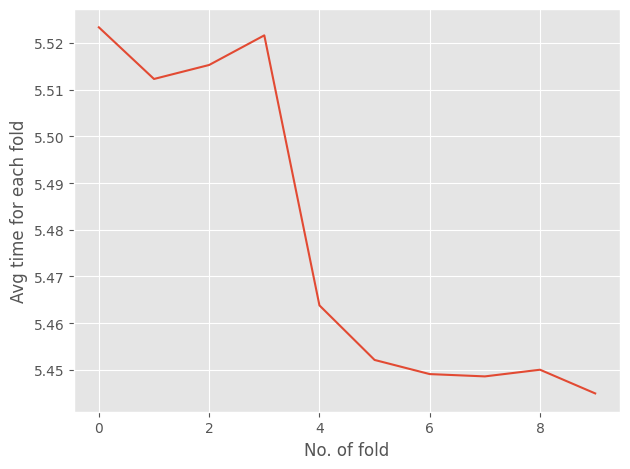

In [77]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [78]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [79]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

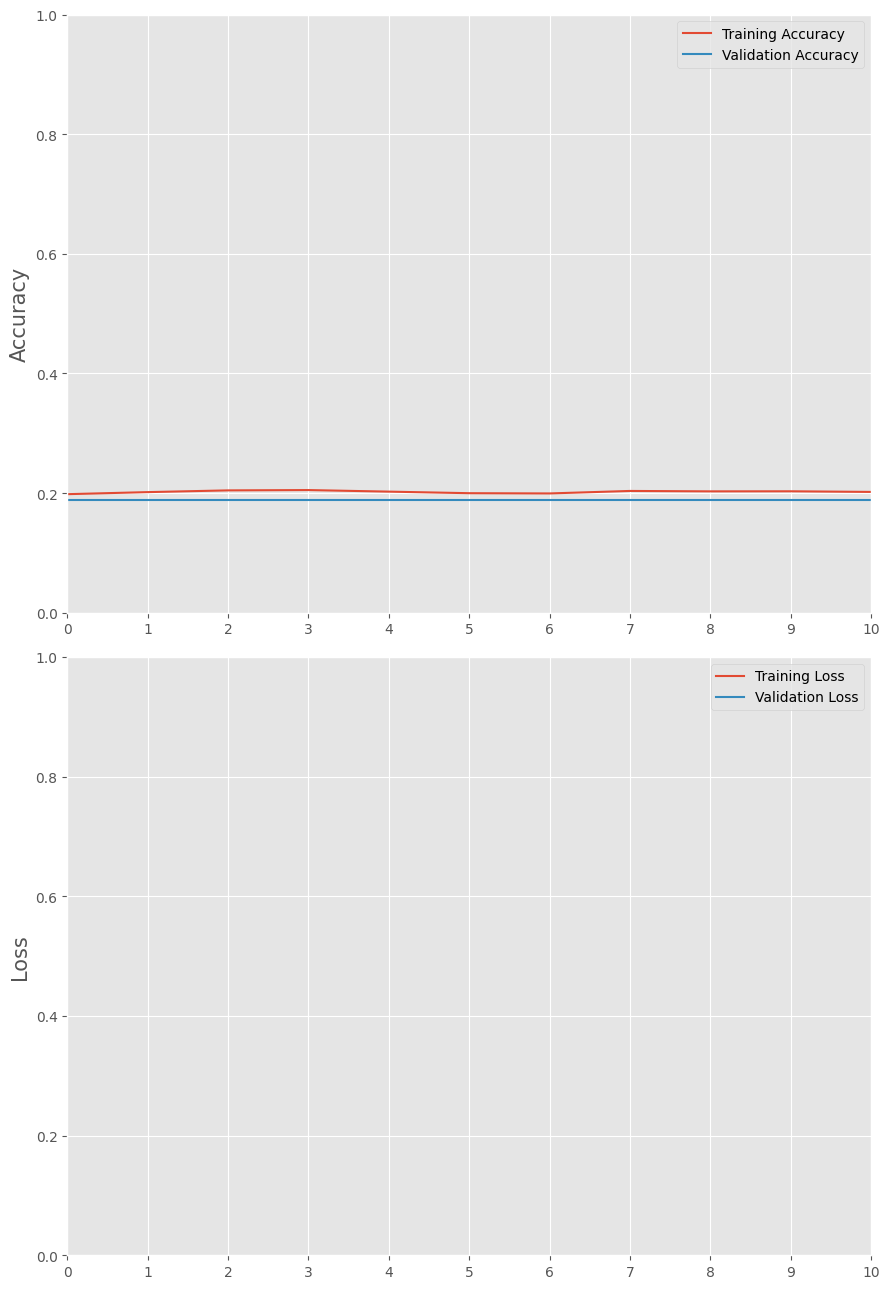

In [80]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [81]:
np.array(scores_vgg19).shape

(10, 302, 4)

In [82]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [83]:
y_pred_vgg19.shape

(10, 302)

In [84]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [85]:
acc_scores_vgg19

[0.18874172185430463,
 0.1423841059602649,
 0.17218543046357615,
 0.11920529801324503,
 0.31456953642384106,
 0.2052980132450331,
 0.1291390728476821,
 0.3841059602649007,
 0.1390728476821192,
 0.13245033112582782]

In [86]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [87]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [88]:
import gc
gc.collect()

23570

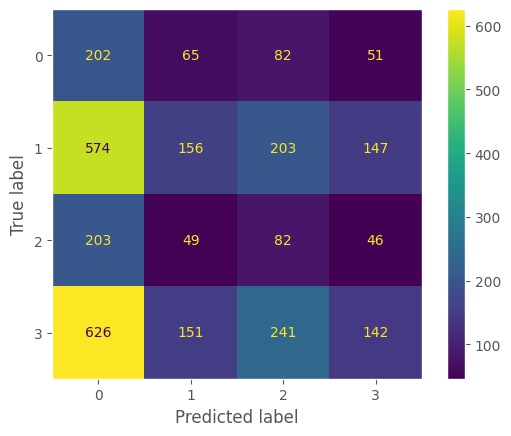

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [90]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.51      0.20       400
           1       0.37      0.14      0.21      1080
           2       0.13      0.22      0.17       380
           3       0.37      0.12      0.18      1160

    accuracy                           0.19      3020
   macro avg       0.25      0.25      0.19      3020
weighted avg       0.31      0.19      0.19      3020



#  Performance Metrics

## accuracy_score Metrics

In [91]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

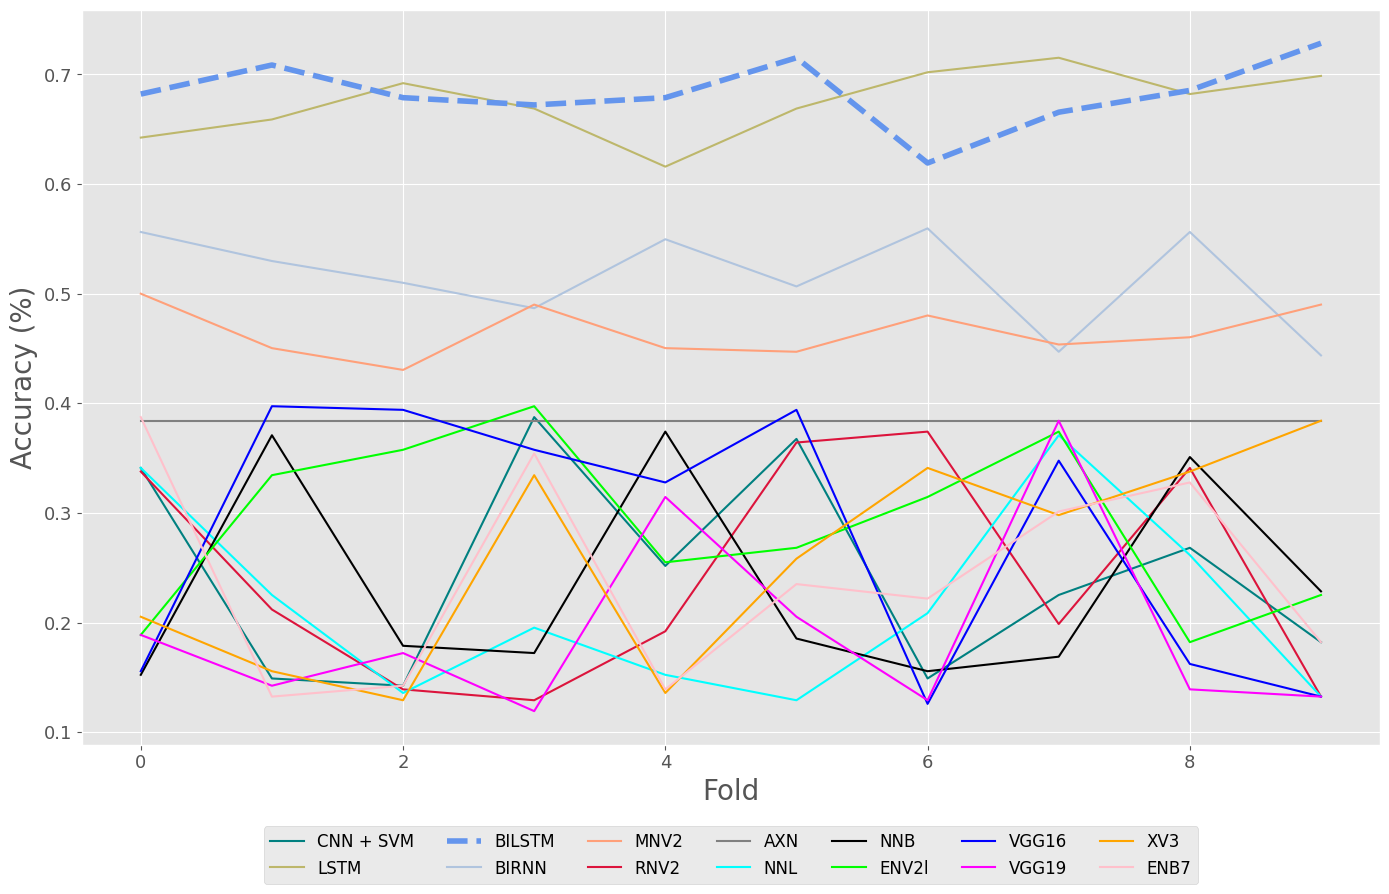

In [92]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [7]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [14]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

array([5.52334471, 5.51228329, 5.51527924, 5.52162254, 5.46380982,
       5.45212798, 5.44909869, 5.44860661, 5.4500345 , 5.44496224])

NameError: name 'y' is not defined

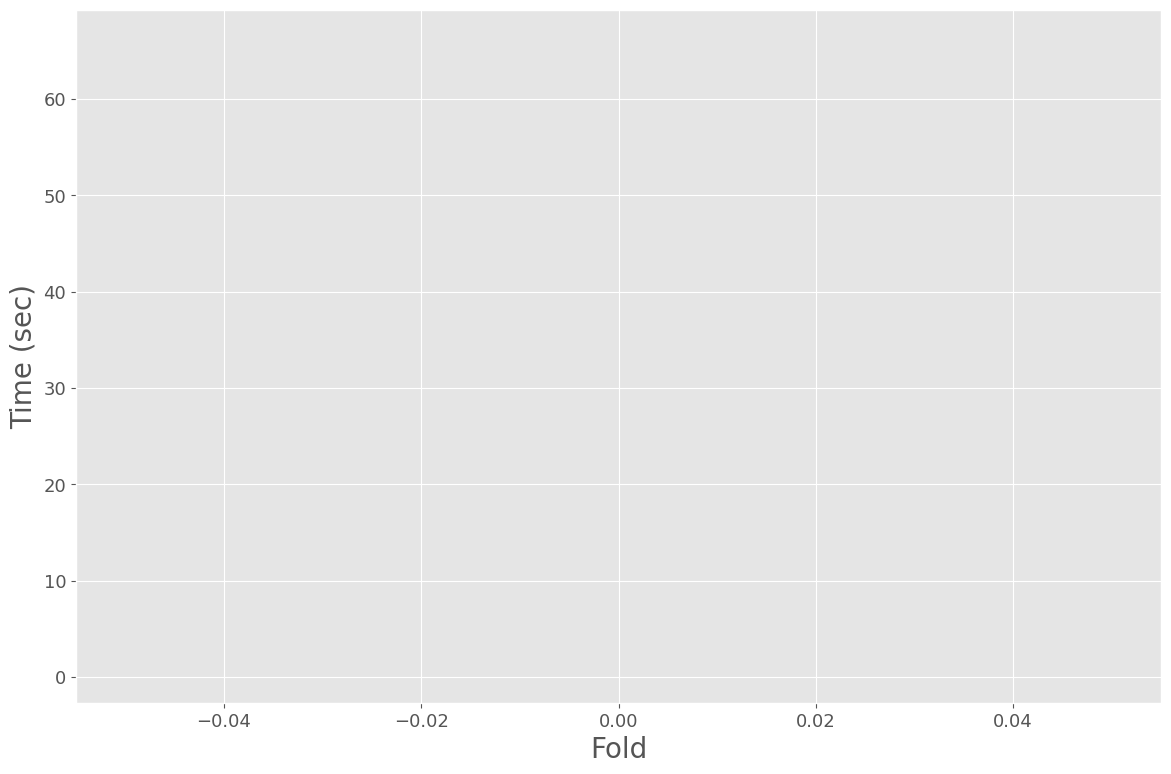

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


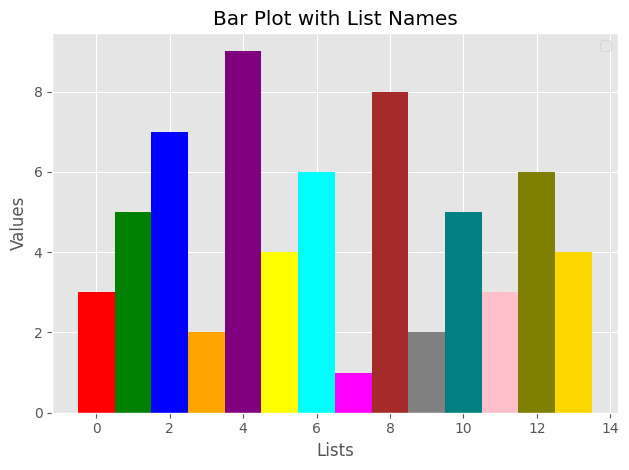

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [96]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

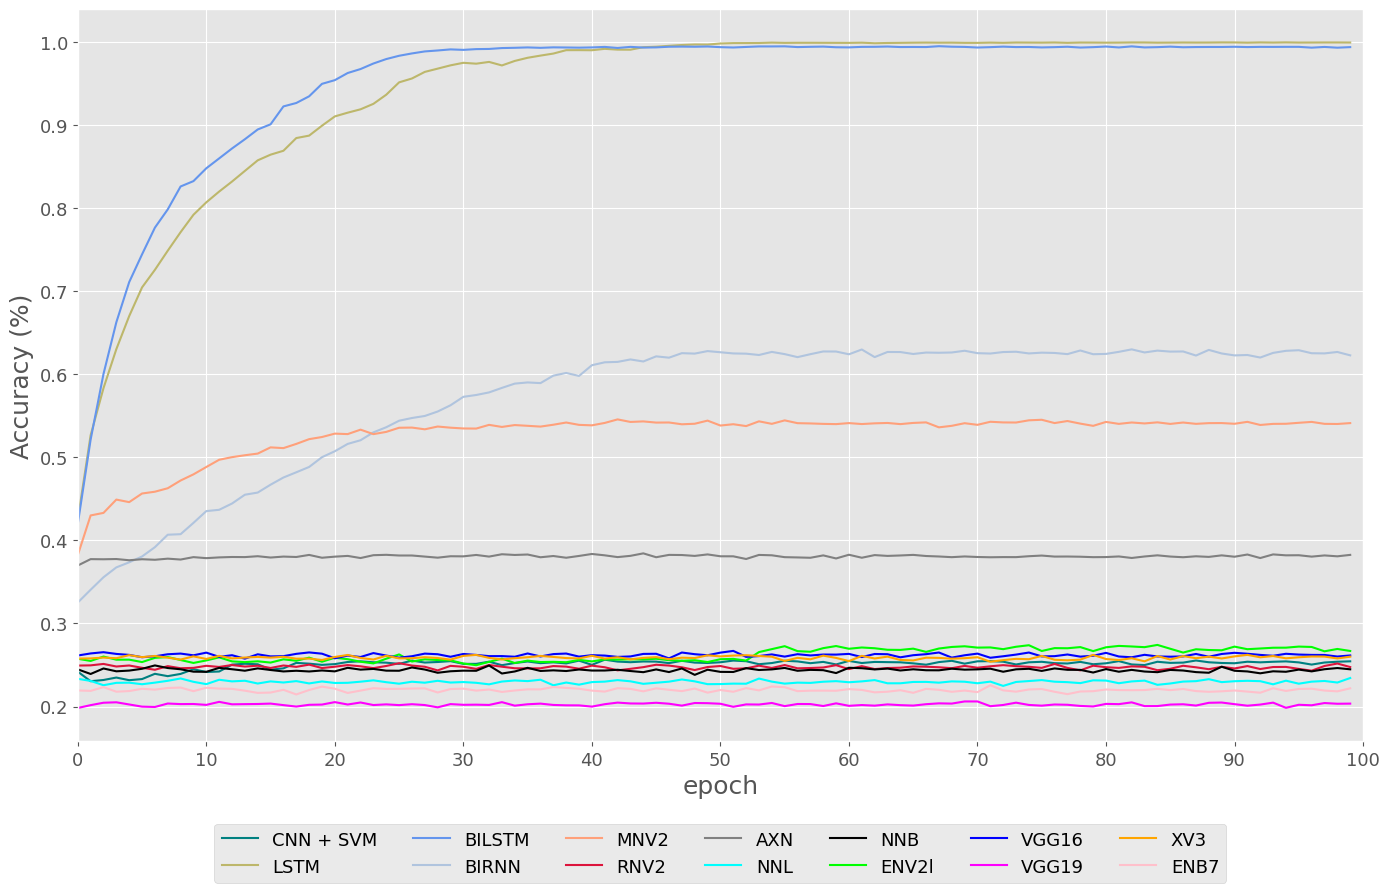

In [97]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

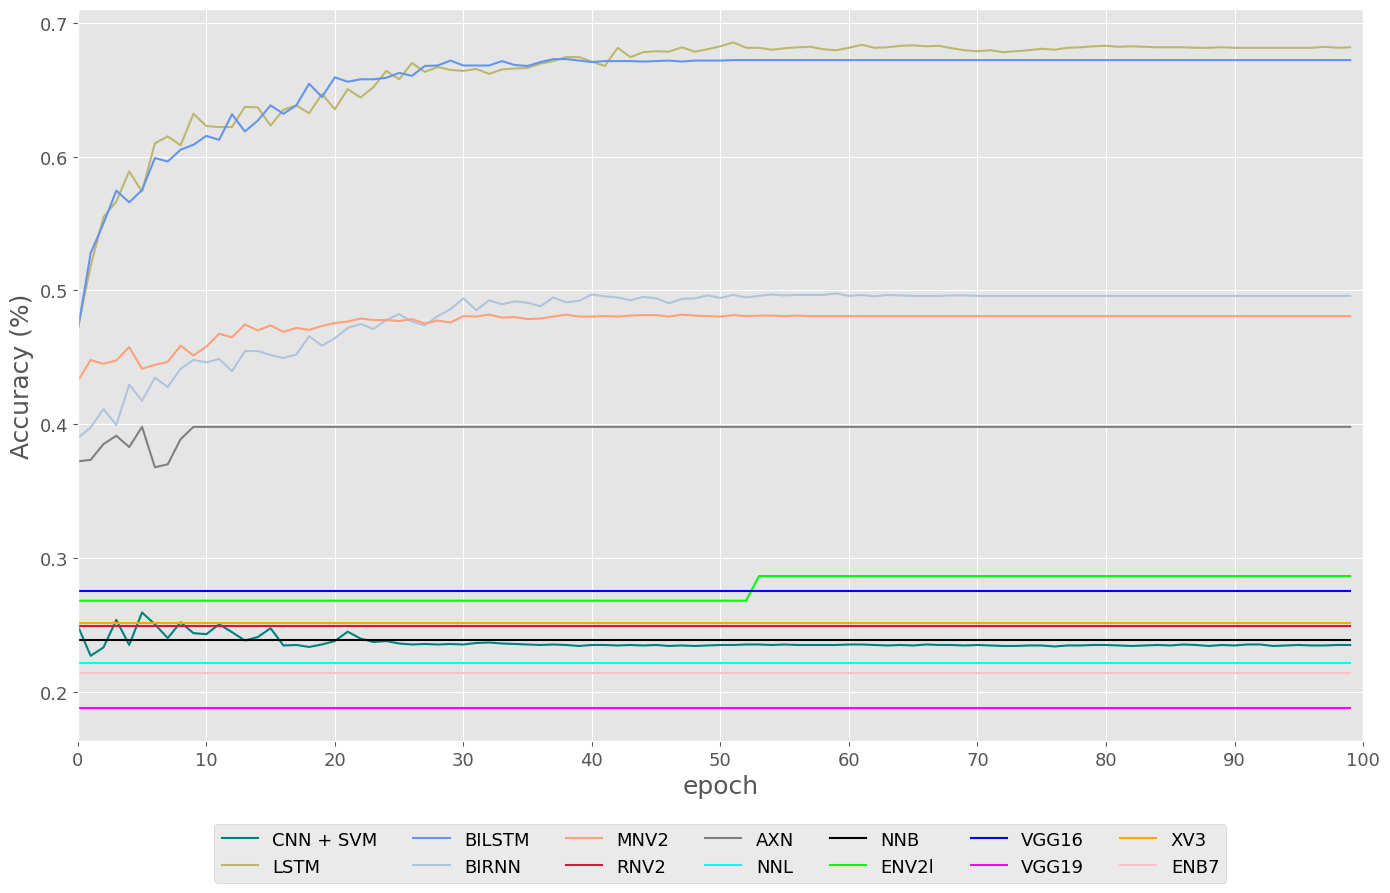

In [98]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

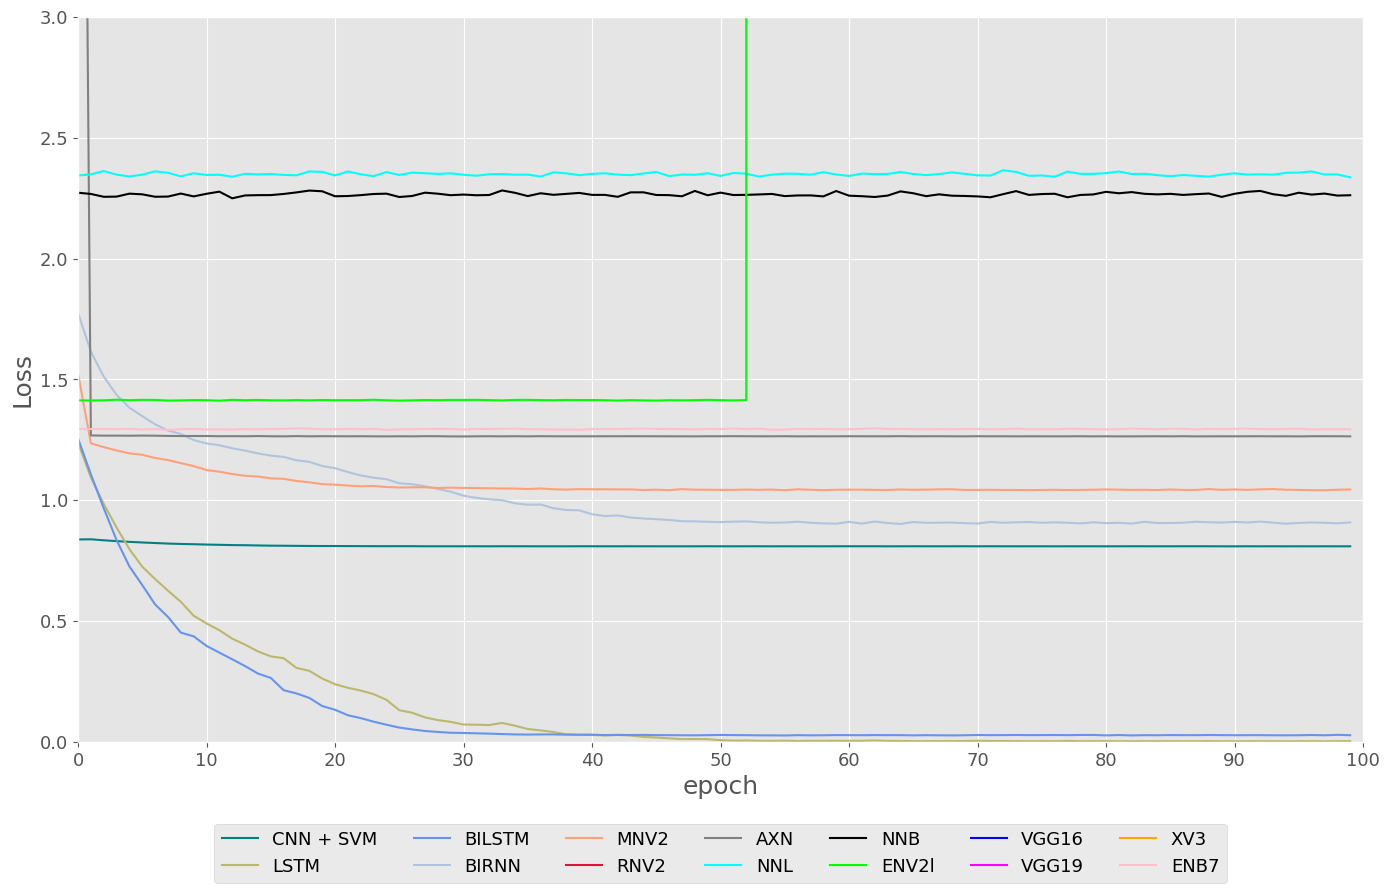

In [99]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

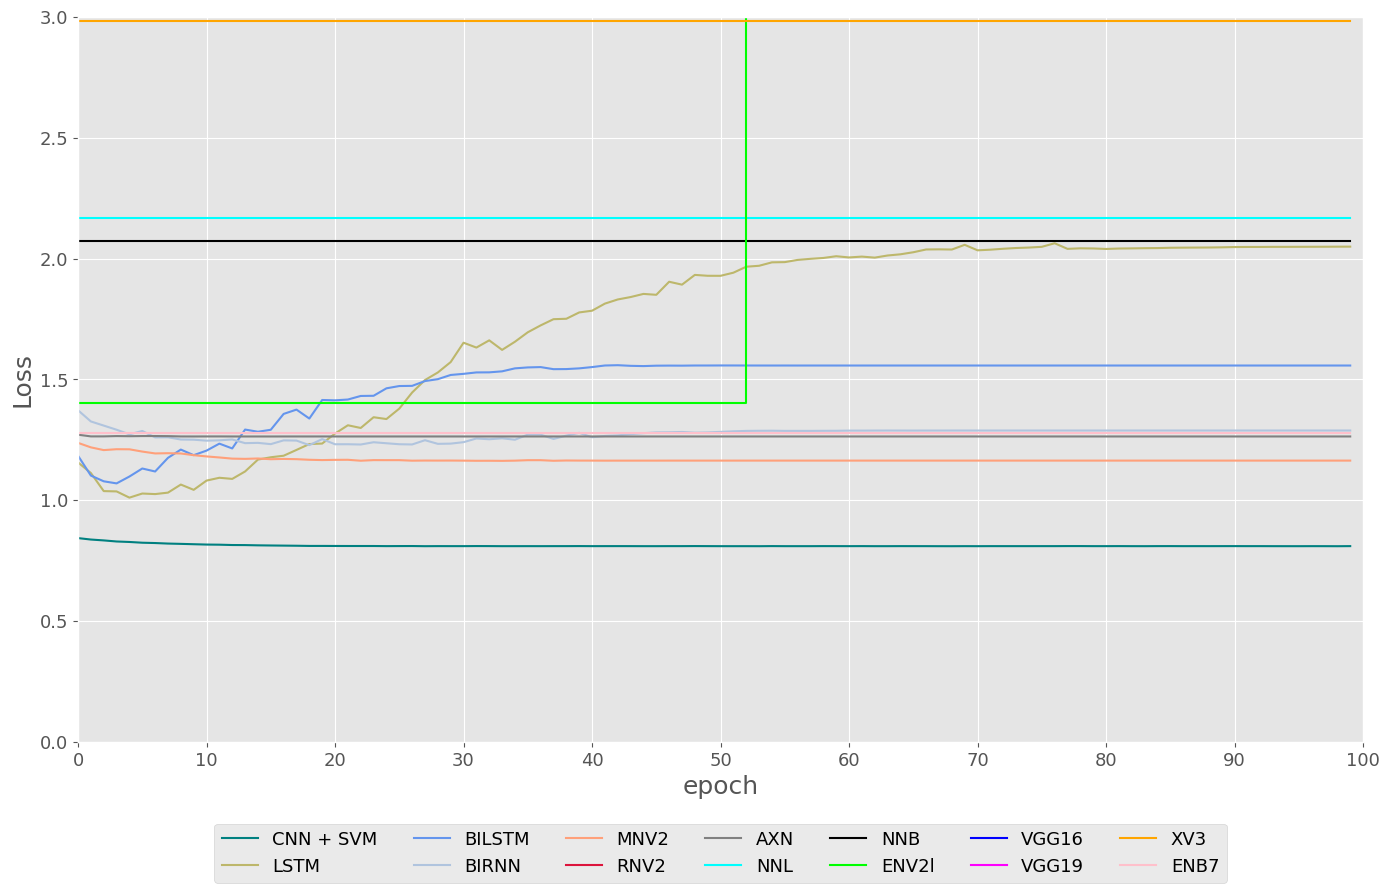

In [100]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()